# **Data Sci Eng Methods (INFO 6105)**

##**Assignment – Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report**

Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.



The focus is readability and clarity.



The following must be answered:

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?



#**Abstract**


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

The datasets consists of several medical predictor variables and one target variable, diabetes. Predictor variables includes the number of pregnancies the patient has had, their BMI, weight, age,glucose, and so on.

VARIABLE INFORMATION


***Patient data***


patient_number : Unique ID for each patient (1 to 390)

cholesterol : Cholesterol level in mg/dl (115 to 443)

glucose : Blood glucose level in mg/dl (48 to 385)

hdl_chol : HDL cholesterol level in mg/dl (12 to 120)

chol_hdl_ratio : Ratio of total cholesterol to HDL (1.9 to 19.3)

age : Age of the patient in years (19 to 92)

gender : Gender of the patient (male or female)

height : Height of the patient in cm (52 to 76)

weight : Weight of the patient in kg (102 to 320)

bmi : Body mass index of the patient (15.2 to 55.8)


***Blood pressure***


systolic_bp : Systolic blood pressure in mmHg (90 to 250)

diastolic_bp : Diastolic blood pressure  in mmHg (48 to 124)


***Body measurements***


waist : Waist circumference in cm (26 to 56)

hip : Hip circumference in cm (30 to 64)

waist_hip_ratio : Ratio of waist to hip circumference (0.68 to 1.14)


***Outcome***


diabetes : Indicates if the patient has diabetes (Yes/No)

#ML Data Cleaning and Feature Selection

###**Data Cleaning**

In [1]:
# importing neccessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline

In [2]:
# reading the dataset
# URL to the raw CSV file in the GitHub repository
url = 'https://raw.githubusercontent.com/ronakmishra619/Data_Science_Assignment/main/diabetes.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(url,decimal=",")

# Now, 'df' contains the data from the "diabetes.csv" file.

# df = pd.read_csv(url)
df.head()

patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0               1          193       77        49             3.9   19   
1               2          146       79        41             3.6   19   
2               3          217       75        54             4.0   20   
3               4          226       97        70             3.2   20   
4               5          164       91        67             2.4   20   

   gender  height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0  female      61     119  22.5          118            70     32   38   
1  female      60     135  26.4          108            58     33   40   
2  female      67     187  29.3          110            72     40   45   
3  female      64     114  19.6          122            64     31   39   
4  female      70     141  20.2          122            86     32   39   

   waist_hip_ratio     diabetes  
0             0.84  No diabetes  
1             0.83  No diabetes  
2             0.89  No diabetes  
3             0.79  No diabetes  
4             0.82  No diabetes

In [3]:
# checking the shape of the dataframe
df.shape

(390, 16)

In [4]:
# printing all the datatypes of respective columns
df.dtypes

patient_number       int64
cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
gender              object
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes            object
dtype: object

In [5]:
## Checking for missing values

df.isnull().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    object 
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB


In [7]:
df.describe()

patient_number  cholesterol     glucose    hdl_chol  chol_hdl_ratio  \
count      390.000000   390.000000  390.000000  390.000000      390.000000   
mean       195.500000   207.230769  107.338462   50.266667        4.524615   
std        112.727548    44.666005   53.798188   17.279069        1.736634   
min          1.000000    78.000000   48.000000   12.000000        1.500000   
25%         98.250000   179.000000   81.000000   38.000000        3.200000   
50%        195.500000   203.000000   90.000000   46.000000        4.200000   
75%        292.750000   229.000000  107.750000   59.000000        5.400000   
max        390.000000   443.000000  385.000000  120.000000       19.300000   

              age      height      weight         bmi  systolic_bp  \
count  390.000000  390.000000  390.000000  390.000000   390.000000   
mean    46.774359   65.951282  177.407692   28.775641   137.133333   
std     16.435911    3.918867   40.407824    6.600915    22.859528   
min     19.000000   52.000000   99.000000   15.200000    90.000000   
25%     34.000000   63.000000  150.250000   24.100000   122.000000   
50%     44.500000   66.000000  173.000000   27.800000   136.000000   
75%     60.000000   69.000000  200.000000   32.275000   148.000000   
max     92.000000   76.000000  325.000000   55.800000   250.000000   

       diastolic_bp       waist         hip  waist_hip_ratio  
count    390.000000  390.000000  390.000000       390.000000  
mean      83.289744   37.869231   42.992308         0.881385  
std       13.498192    5.760947    5.664342         0.073212  
min       48.000000   26.000000   30.000000         0.680000  
25%       75.000000   33.000000   39.000000         0.830000  
50%       82.000000   37.000000   42.000000         0.880000  
75%       90.000000   41.000000   46.000000         0.930000  
max      124.000000   56.000000   64.000000         1.140000

###**What are the likely distributions of the numeric variables?**

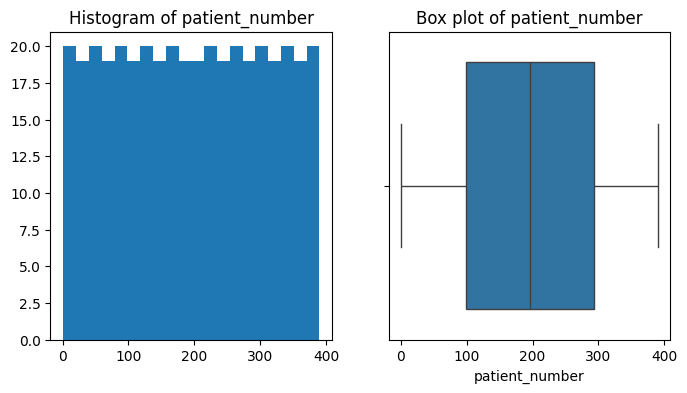

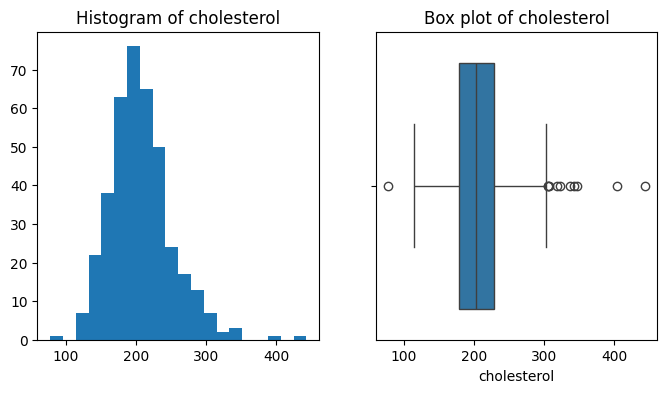

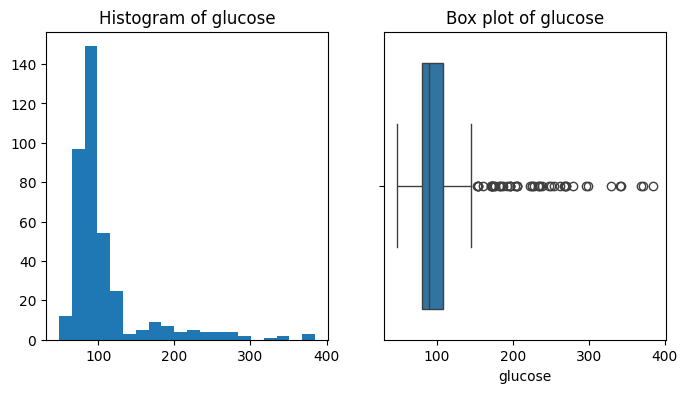

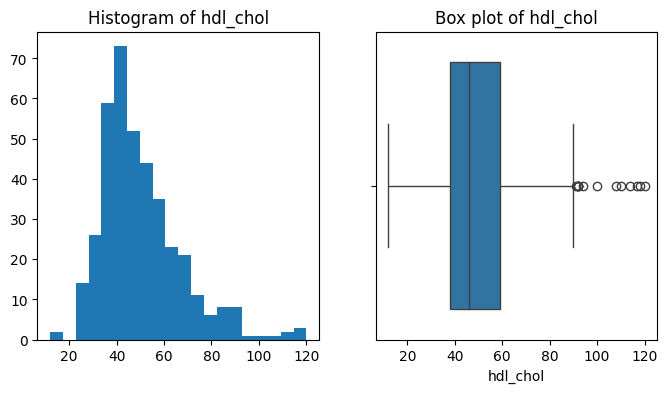

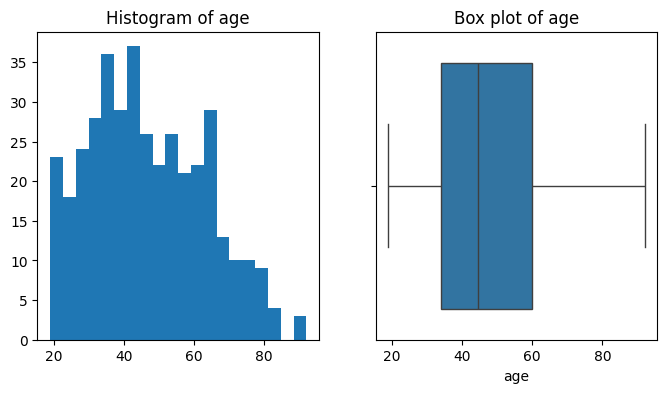

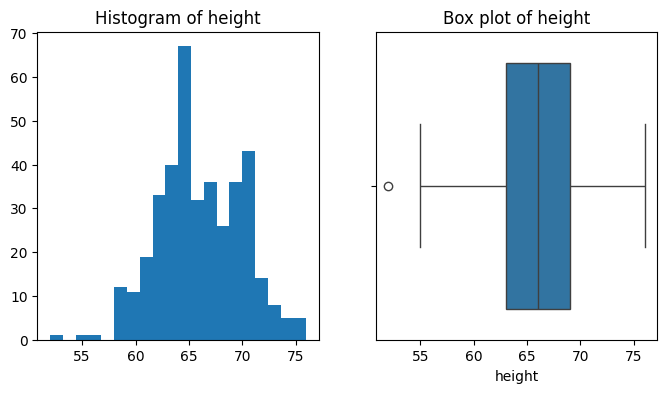

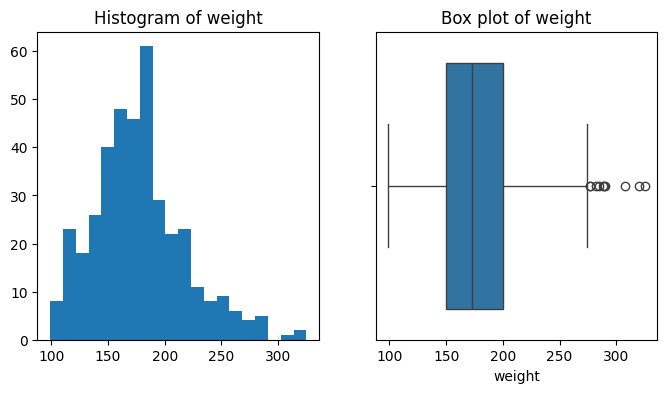

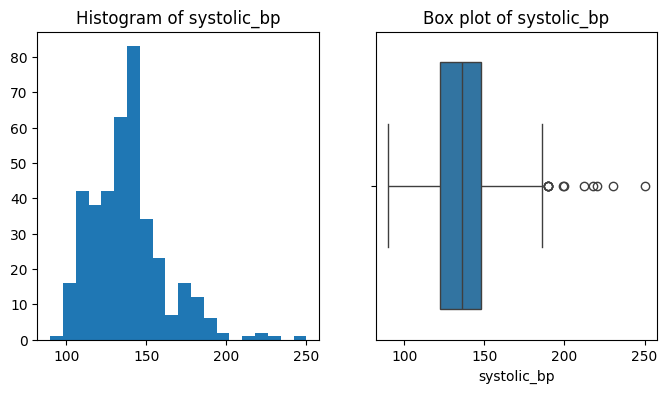

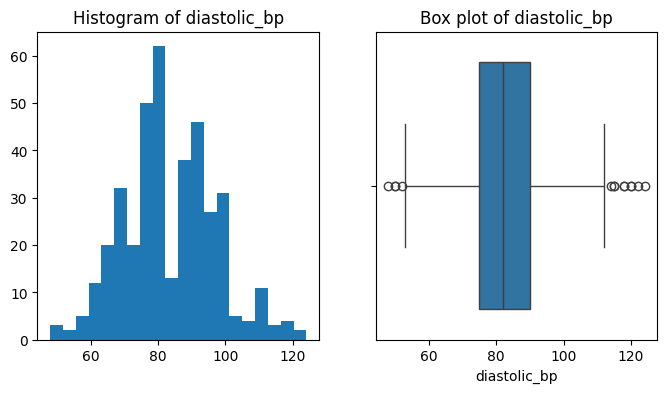

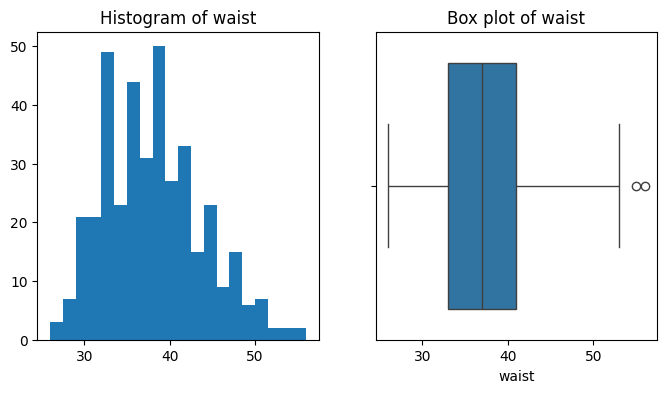

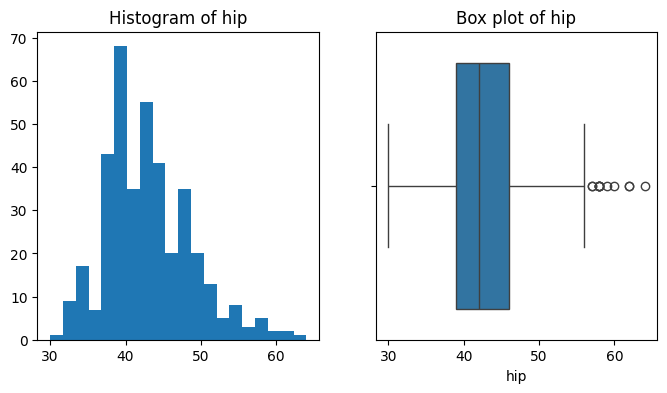

       patient_number  cholesterol     glucose    hdl_chol         age  \
count      390.000000   390.000000  390.000000  390.000000  390.000000   
mean       195.500000   207.230769  107.338462   50.266667   46.774359   
std        112.727548    44.666005   53.798188   17.279069   16.435911   
min          1.000000    78.000000   48.000000   12.000000   19.000000   
25%         98.250000   179.000000   81.000000   38.000000   34.000000   
50%        195.500000   203.000000   90.000000   46.000000   44.500000   
75%        292.750000   229.000000  107.750000   59.000000   60.000000   
max        390.000000   443.000000  385.000000  120.000000   92.000000   

           height      weight  systolic_bp  diastolic_bp       waist  \
count  390.000000  390.000000   390.000000    390.000000  390.000000   
mean    65.951282  177.407692   137.133333     83.289744   37.869231   
std      3.918867   40.407824    22.859528     13.498192    5.760947   
min     52.000000   99.000000    90.000000   

<ipython-input-8-aa646c3e84ed>:32: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.skew())
<ipython-input-8-aa646c3e84ed>:33: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.kurt())


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ronakmishra619/Data_Science_Assignment/main/diabetes.csv')  # Replace with your actual file path

# Select numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Loop through each numeric column and visualize its distribution
for col in numeric_cols:
    plt.figure(figsize=(8, 4))

    # Histogram for basic distribution shape
    plt.subplot(1, 2, 1)
    plt.hist(data[col], bins=20)
    plt.title(f"Histogram of {col}")

    # Box plot for outliers and distribution spread
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=col)
    plt.title(f"Box plot of {col}")

    plt.show()

# Additional insights:
# - Describe numerical variables with summary statistics
print(data.describe())

# - Check for skewness and kurtosis
print(data.skew())
print(data.kurt())


###**Analyzing categorical features**

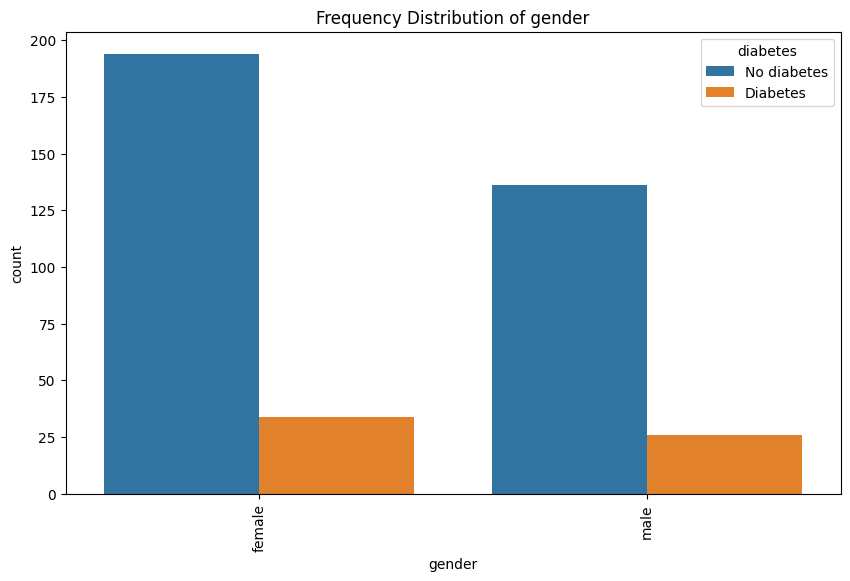

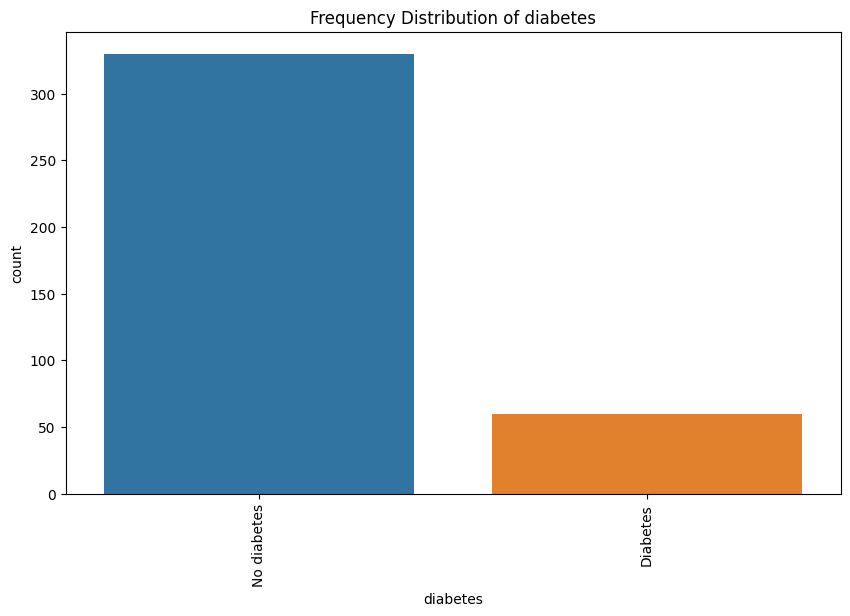

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# plotting frequency distribution for categorical variables

for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='diabetes')
  plt.title(f'Frequency Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

###**Exploring Feature Correlation in the Dataset through a Heatmap Analysis**

<ipython-input-10-17edaee30db3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(


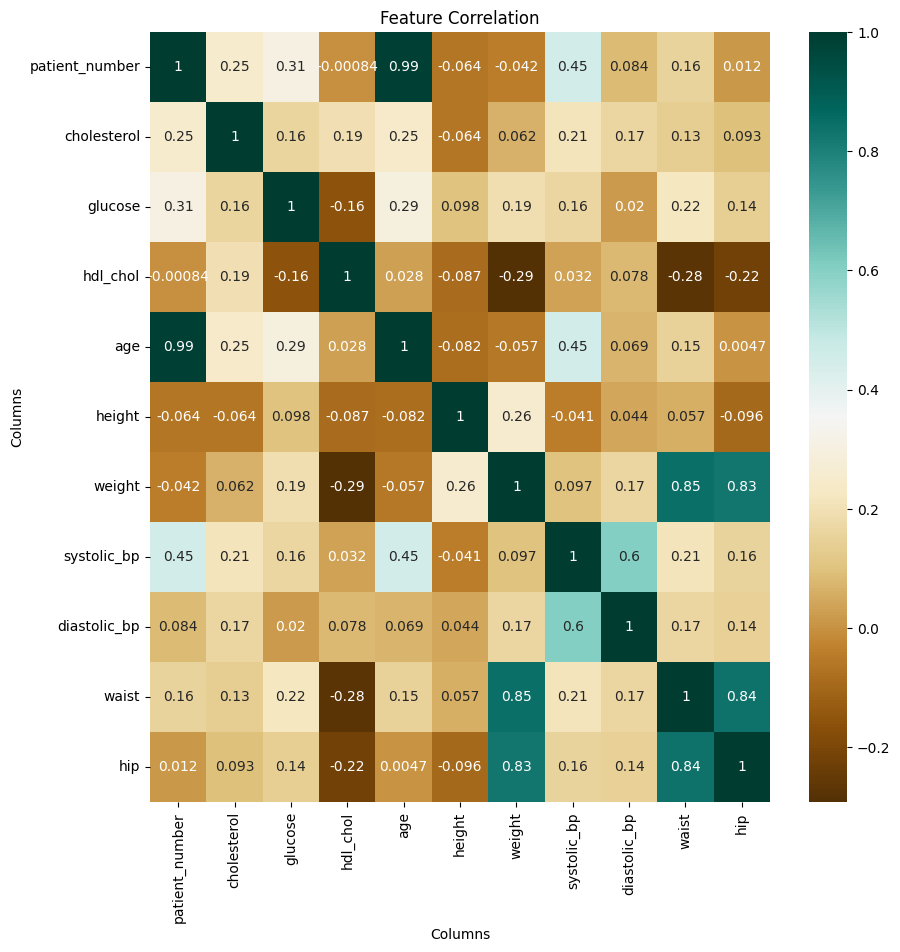

In [10]:
data
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

**observation**

1-waist and weight 2-hip and weight 3-waist and bmi 4-hip and bmi 5-hip and waist have highest correlation

Now, Exploring Feature Relationships and Diabetes Status with Pair Plot Analysis

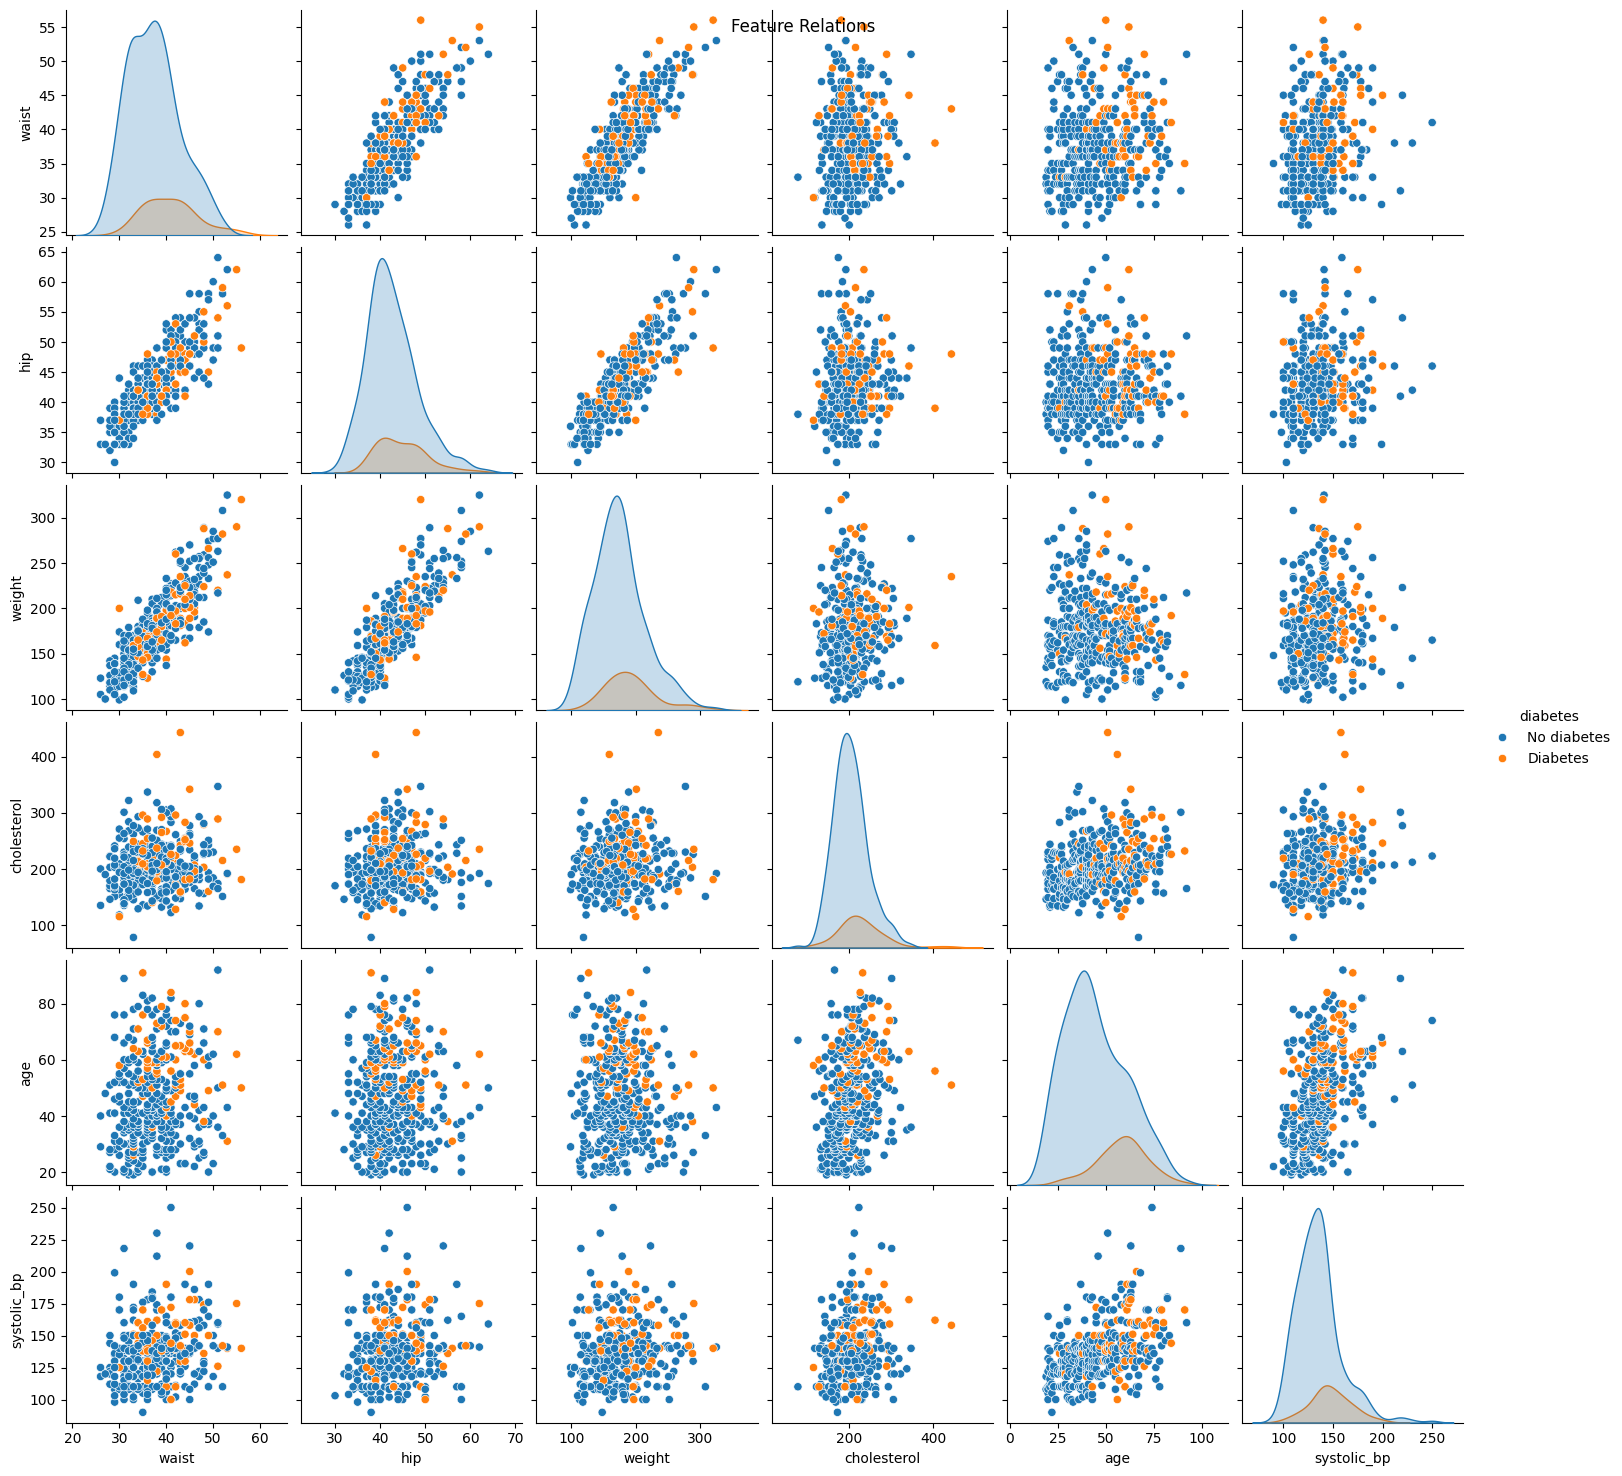

In [11]:
figures = sns.pairplot(data[['waist','hip','weight','bmi','chol_hdl_ratio','cholesterol','age','systolic_bp','diabetes']], hue='diabetes')
figures.fig.suptitle('Feature Relations')
plt.show()

###**Analyzing the Relationship Between Hip and Waist Measurements with a Regression Joint Plot**

<Figure size 1200x1200 with 0 Axes>

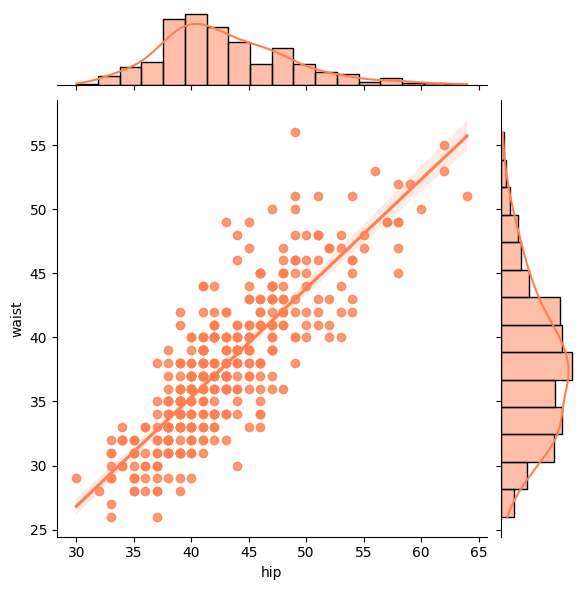

In [12]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'hip', y= 'waist', kind= 'reg',color='coral')
plt.show()

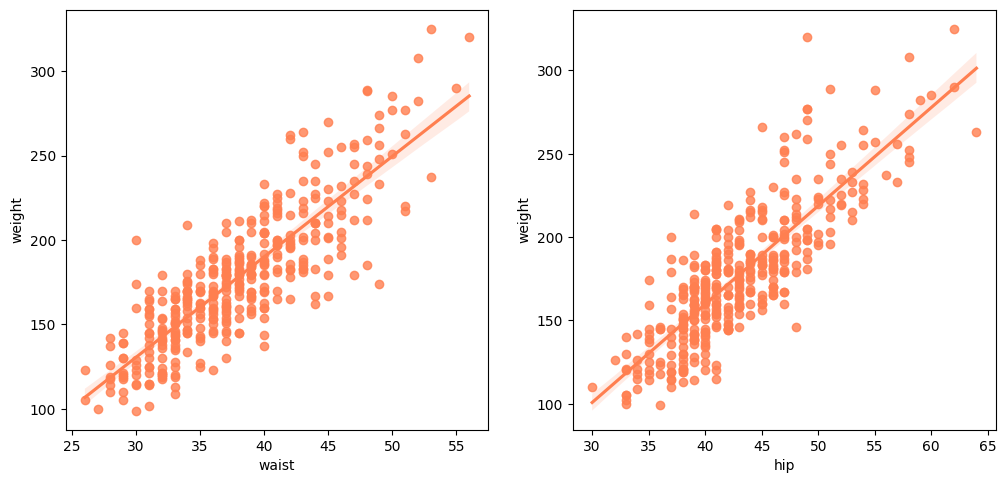

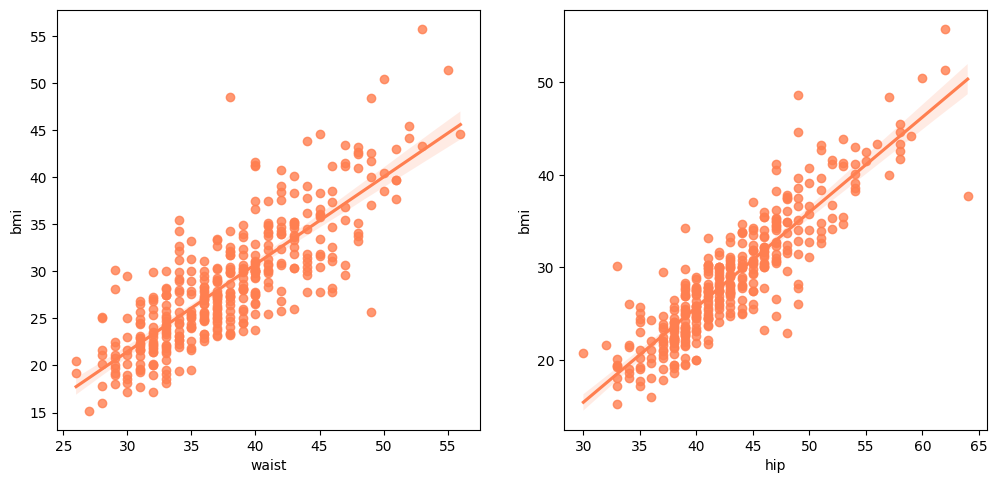

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Waist and Weight
fig1 = plt.figure(figsize=(12, 12))
ax1 = fig1.add_subplot(221)
sns.regplot(data=df, x='waist', y='weight', color='coral', ax=ax1)

# 2 - Hip and Weight
ax2 = fig1.add_subplot(222)
sns.regplot(data=df, x='hip', y='weight', color='coral', ax=ax2)

# 3 - Waist and BMI
fig2 = plt.figure(figsize=(12, 12))
ax3 = fig2.add_subplot(221)
sns.regplot(data=df, x='waist', y='bmi', color='coral', ax=ax3)

# 4 - Hip and BMI
ax4 = fig2.add_subplot(222)
sns.regplot(data=df, x='hip', y='bmi', color='coral', ax=ax4)

plt.show()


**OBSERVATION**

I've analyzed the relationships between different pairs of variables in a dataset using regression plots.

In the first part, I’m creating a joint plot to analyze the relationship between ‘hip’ and ‘waist’ measurements. This plot includes a scatter plot of these two variables along with their individual histograms on the top and right axes.

In the second part, I’m creating four separate regression plots to analyze the relationships between ‘waist’ and ‘weight’, ‘hip’ and ‘weight’, ‘waist’ and ‘bmi’, and ‘hip’ and ‘bmi’. Each plot shows a scatter plot of the two variables along with a regression line that indicates the trend in the data.

These visualizations can help in understanding the correlations between these variables and how they might be related to each other. For example, if there is a positive trend in the regression line, it indicates that as one variable increases, the other variable also tends to increase. Conversely, a negative trend indicates that as one variable increases, the other tends to decrease. The strength and direction of these relationships can provide valuable insights for further analysis or modeling.





###**Which independent variables have missing data? How much?**

<ipython-input-14-0e4ba90ba7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')


Text(0, 0.5, 'Columns')

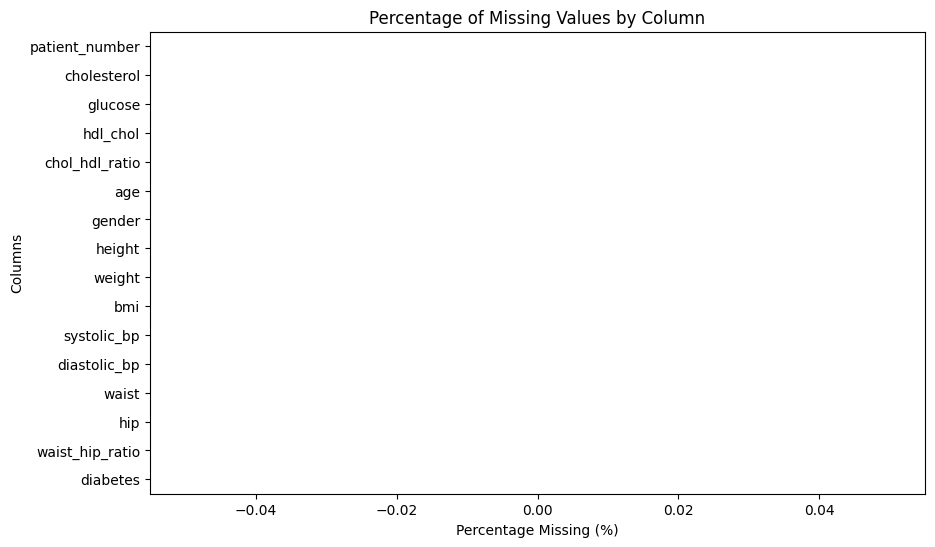

In [14]:
# plotting the missing values according to percentages for better visualization
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Columns')

In [15]:
##We intend to remove the columns for patient_number, height, and waist_hip_ratio, as they do not hold significant relevance for our analysis.

df_copy= df.drop(['patient_number','height','waist_hip_ratio'],axis=1)

In [16]:
## Feature Selection based on correlaltion
X_train = df_copy #or any other dataframe
X_train.corr()

<ipython-input-16-e6751abbe3b4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


cholesterol   glucose  hdl_chol  chol_hdl_ratio       age  \
cholesterol        1.000000  0.158102  0.193162        0.475927  0.247333   
glucose            0.158102  1.000000 -0.158302        0.282210  0.294392   
hdl_chol           0.193162 -0.158302  1.000000       -0.681867  0.028210   
chol_hdl_ratio     0.475927  0.282210 -0.681867        1.000000  0.163201   
age                0.247333  0.294392  0.028210        0.163201  1.000000   
weight             0.062359  0.190358 -0.291883        0.278812 -0.056784   
bmi                0.091695  0.129286 -0.241860        0.228407 -0.009164   
systolic_bp        0.207741  0.162777  0.031807        0.115505  0.453417   
diastolic_bp       0.166241  0.020262  0.078342        0.038242  0.068649   
waist              0.134038  0.222336 -0.276697        0.313262  0.150585   
hip                0.093364  0.138223 -0.223837        0.208902  0.004675   

                  weight       bmi  systolic_bp  diastolic_bp     waist  \
cholesterol     0.062359  0.091695     0.207741      0.166241  0.134038   
glucose         0.190358  0.129286     0.162777      0.020262  0.222336   
hdl_chol       -0.291883 -0.241860     0.031807      0.078342 -0.276697   
chol_hdl_ratio  0.278812  0.228407     0.115505      0.038242  0.313262   
age            -0.056784 -0.009164     0.453417      0.068649  0.150585   
weight          1.000000  0.860147     0.097497      0.166477  0.847766   
bmi             0.860147  1.000000     0.121408      0.145304  0.810701   
systolic_bp     0.097497  0.121408     1.000000      0.603662  0.210934   
diastolic_bp    0.166477  0.145304     0.603662      1.000000  0.165846   
waist           0.847766  0.810701     0.210934      0.165846  1.000000   
hip             0.826985  0.881728     0.155321      0.143898  0.835177   

                     hip  
cholesterol     0.093364  
glucose         0.138223  
hdl_chol       -0.223837  
chol_hdl_ratio  0.208902  
age             0.004675  
weight          0.826985  
bmi             0.881728  
systolic_bp     0.155321  
diastolic_bp    0.143898  
waist           0.835177  
hip             1.000000

<ipython-input-17-ef814230ca9a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=X_train.corr()


<Axes: >

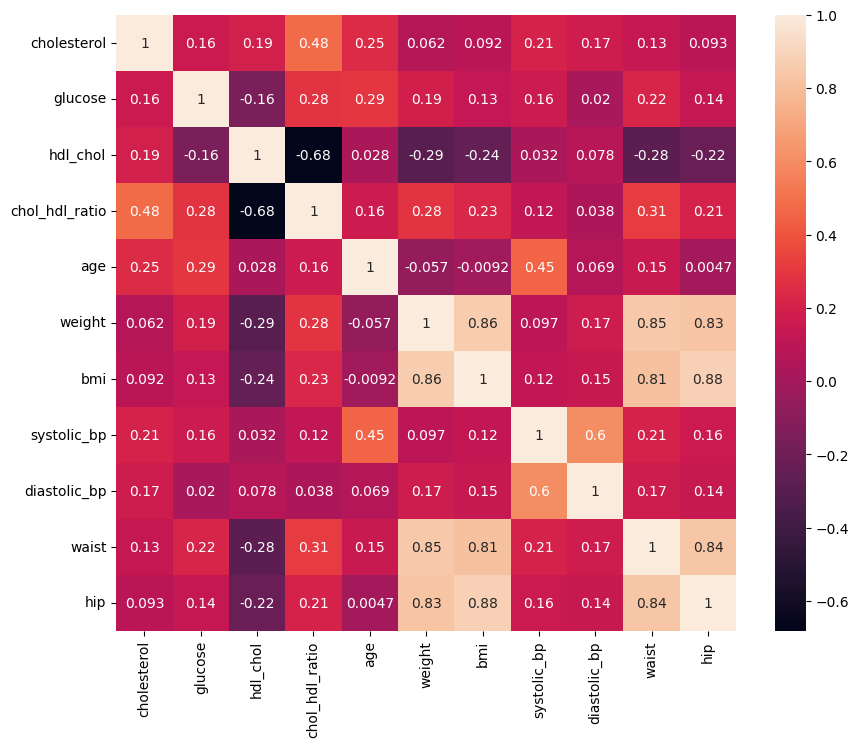

In [17]:
##Check for multicollinearity
plt.figure(figsize=(10,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

**OBSERVATION**

I’m checking for independence among predictor variables in a DataFrame X_train (which is set to df_copy in this case).

First, I calculate the correlation matrix of X_train using the corr method. This matrix shows the correlation coefficients between each pair of variables in the DataFrame. A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation. A coefficient close to 0 suggests that the variables are independent of each other.

Next, I visualize this correlation matrix using a heatmap from the seaborn library. The heatmap provides a color-coded representation of the correlation matrix, making it easier to see which variables are strongly correlated.

If two predictor variables are highly correlated (either positively or negatively), they are not independent of each other. This condition, known as multicollinearity, can be problematic in some statistical analyses and machine learning models because it can make it difficult to determine the effect of each predictor variable independently. If multicollinearity is detected, one might consider removing one of the correlated variables or using techniques like Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.

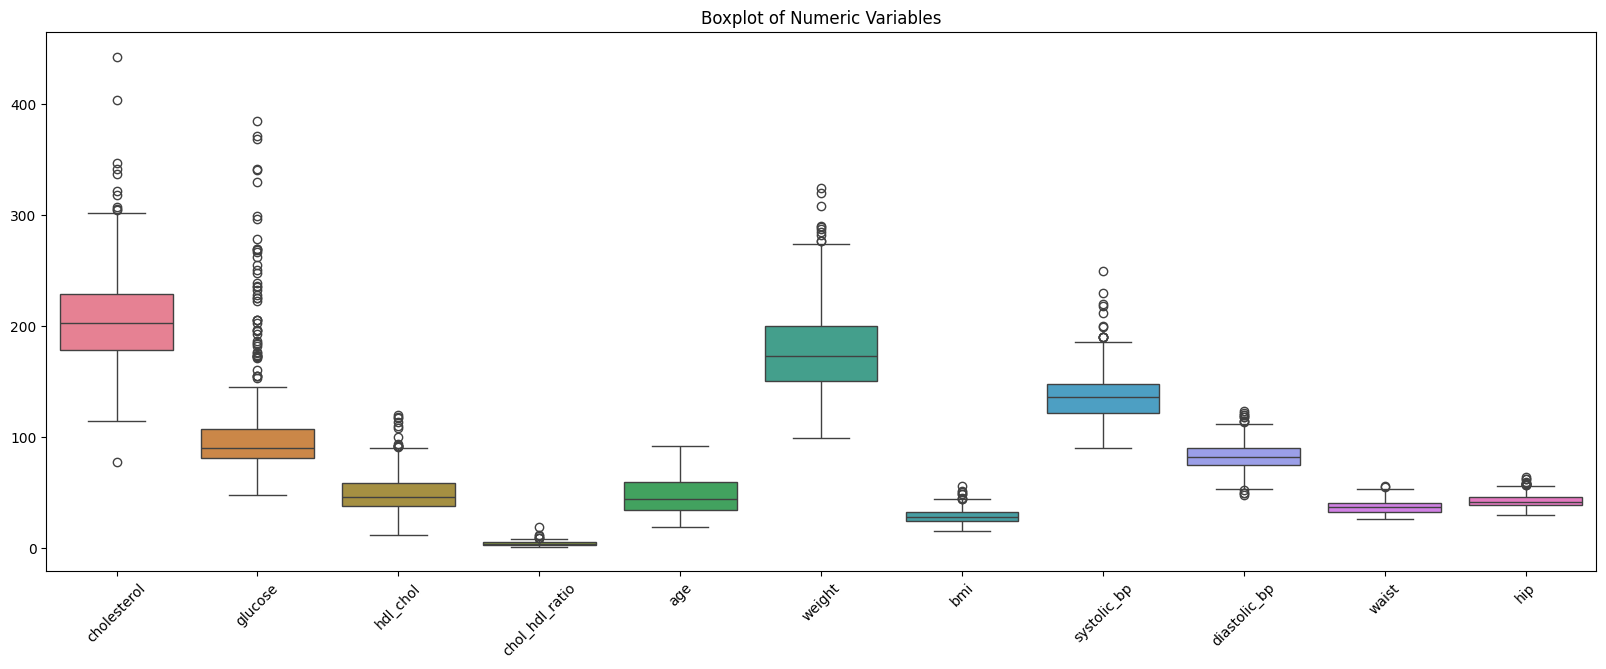

In [18]:
#plotting a boxplot to visualize the outliers in the X_train dataframes.

import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric variables from your DataFrame (df_copy)
numeric_variables = X_train.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(20, 7))

# Create a boxplot for all numeric variables
sns.boxplot(data=numeric_variables)

# Set a title
plt.title('Boxplot of Numeric Variables')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()



In [19]:
#Dividing the dataset into training and testing sets

X = df_copy.drop(['age'], axis=1)
y = df_copy['age']

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (312, 12)
X_test shape: (78, 12)
y_train shape: (312,)
y_test shape: (78,)


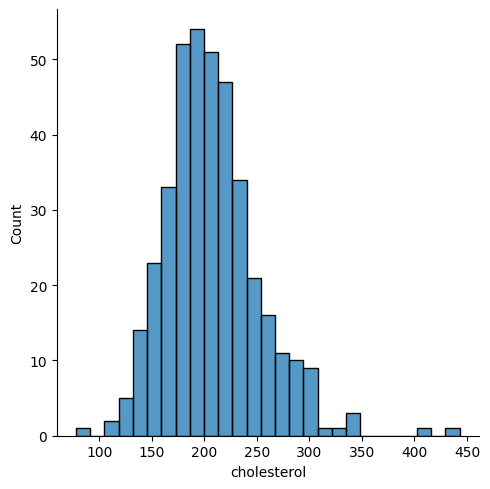

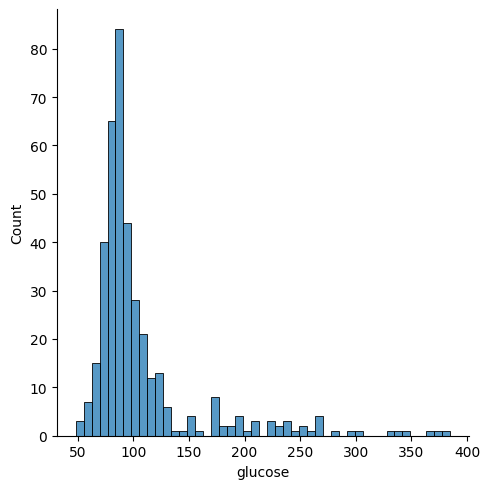

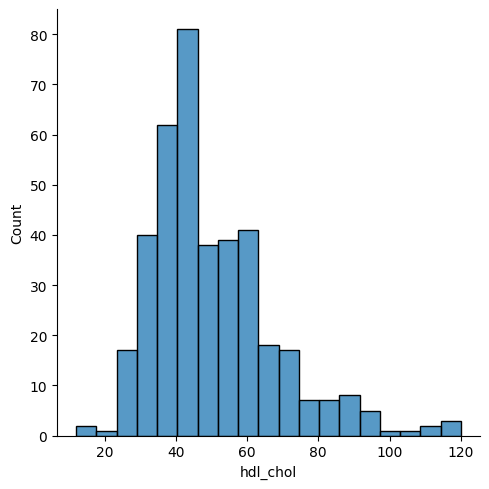

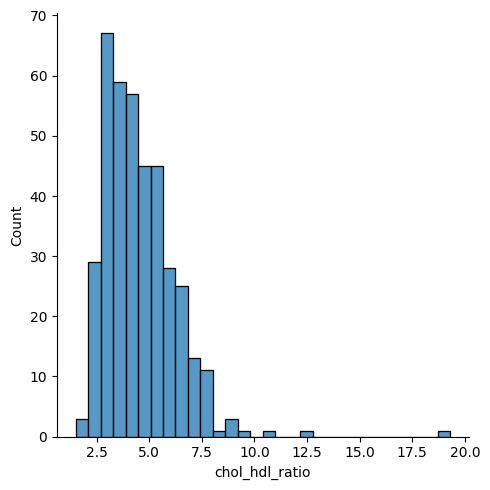

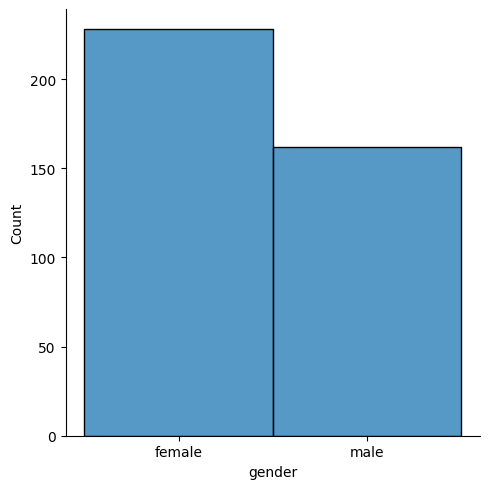

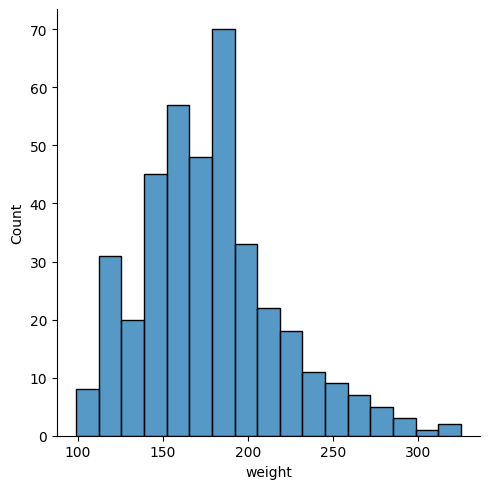

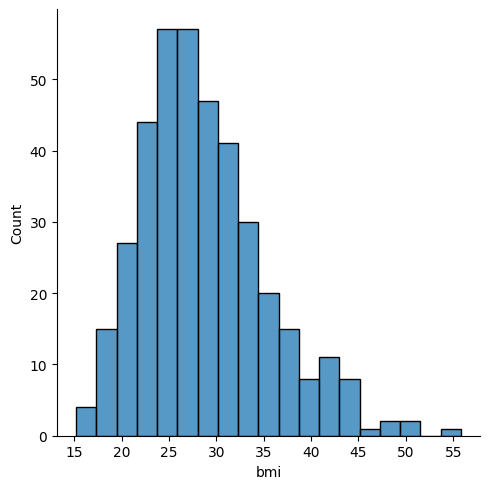

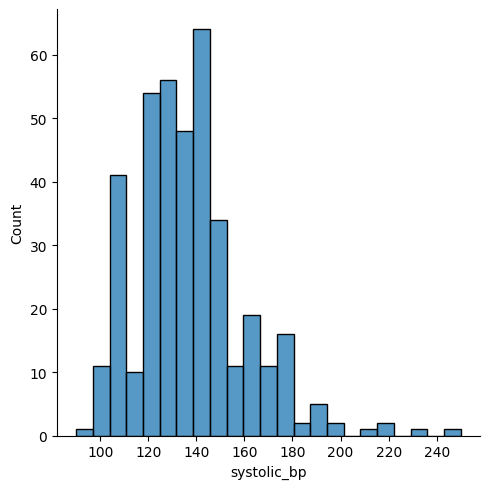

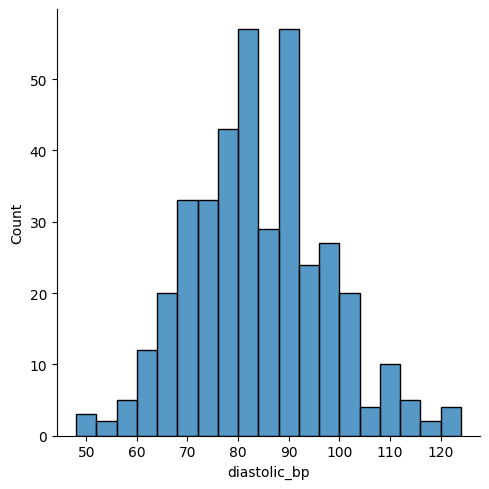

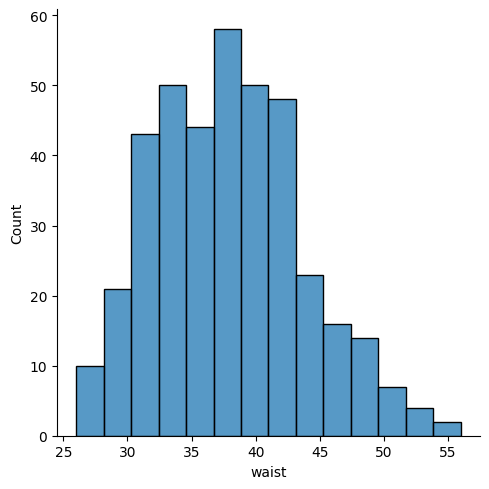

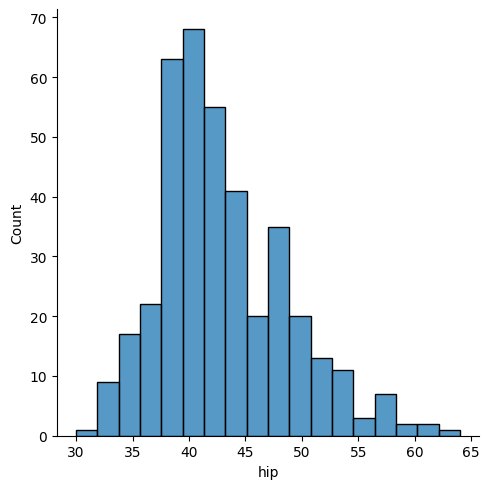

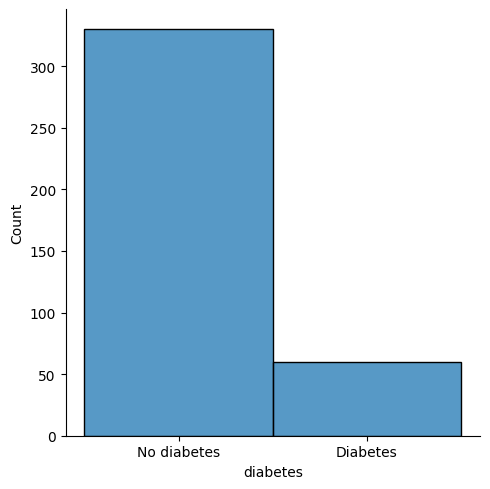

In [21]:
# Summary statistics
X.describe()

# Distributions
for col in X.columns:
   sns.displot(X[col])

OBSERVATION

The above offer insights into the central tendencies and variability of the predictor variables, while the distribution charts visually illustrate their ranges, assisting in evaluating the meaningfulness and potential outliers in the data.

###**What are the distributions of the predictor variables?**

female    0.584615
male      0.415385
Name: gender, dtype: float64
No diabetes    0.846154
Diabetes       0.153846
Name: diabetes, dtype: float64


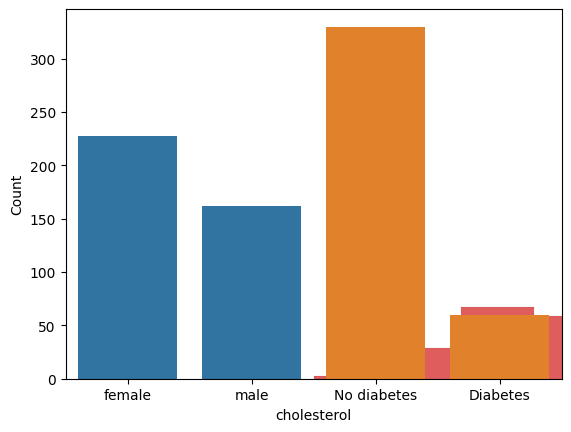

In [22]:
import seaborn as sns

# Numerical features
num_features = X.select_dtypes(include=['int', 'float'])
for col in num_features.columns:
   sns.histplot(data=num_features, x=col)

# Categorical features
cat_features = X.select_dtypes(include=['object'])
for col in cat_features.columns:
   print(X[col].value_counts()/len(X))
   sns.countplot(data=X, x=col)

**OBSERVATION**

I've examined the distributions of the predictor variables in the DataFrame X.

For numerical features, I’m creating histograms using the histplot function from the seaborn library. This gives a visual representation of the distribution of each numerical feature.

For categorical features, I’m calculating the proportion of each category in the feature and printing it. Then, I’m creating count plots using the countplot function from seaborn. This gives a visual representation of the distribution of each categorical feature.

The output shows the proportions of the categories in the gender and diabetes features. For gender, about 58.5% are ‘female’ and 41.5% are ‘male’. For diabetes, about 84.6% are ‘No diabetes’ and 15.4% are ‘Diabetes’. These proportions give an idea of the balance of the categories in these features.

In [23]:
df_copy.gender=df_copy.gender.replace({"female": 0 ,"male":1})# female =0  male=1
df_copy.diabetes=df_copy.diabetes.replace({"No diabetes":0,"Diabetes":1})# no diabetes =0 diabetes =1
df_copy.head()

cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender  weight   bmi  \
0          193       77        49             3.9   19       0     119  22.5   
1          146       79        41             3.6   19       0     135  26.4   
2          217       75        54             4.0   20       0     187  29.3   
3          226       97        70             3.2   20       0     114  19.6   
4          164       91        67             2.4   20       0     141  20.2   

   systolic_bp  diastolic_bp  waist  hip  diabetes  
0          118            70     32   38         0  
1          108            58     33   40         0  
2          110            72     40   45         0  
3          122            64     31   39         0  
4          122            86     32   39         0

**OBSERVATION**

Above , I’m performing data preprocessing on the df_copy DataFrame. Specifically, I’m converting categorical variables into numerical ones, a process known as encoding.

I replace the gender column values with 0 for ‘female’ and 1 for ‘male’. Similarly, I replace the diabetes column values with 0 for ‘No diabetes’ and 1 for ‘Diabetes’. This is done using the replace function in pandas.

Finally, I display the first few rows of the DataFrame using the head function to verify the changes. This transformation is often necessary because many machine learning algorithms can only handle numerical input.

**Now we will calculate the accuracy and a confusion matrix for categorical data**

###**Building The Model**

In [24]:
y=df_copy.diabetes.values
X=df_copy.drop(columns=["diabetes"])
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True,stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)


**OBSERVATION**

Above , I’m building a ***logistic regression*** model using the ***LogisticRegression*** class from ***sklearn.linear_model***.

First, I separate the target variable diabetes from the rest of the DataFrame df_copy and assign them to y and X respectively. Then, I split the dataset into training and testing sets using the train_test_split function from sklearn.model_selection, with 80% of the data going to the training set and 20% to the testing set. The stratify parameter is set to y to ensure that the distribution of the target variable is the same in both the training and testing sets.

Next, I instantiate a LogisticRegression object with the solver set to 'liblinear' and random_state set to 42 to ensure reproducibility. I fit the model to the training data using the fit method and then use the fitted model to make predictions on the testing data using the predict method. The predictions are stored in the predictions variable. This model can be used to predict whether a given set of inputs corresponds to a case of diabetes or not.

##**Results**

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have the 'test_y' and 'predictions' variables defined
print("Accuracy Score:", accuracy_score(test_y, predictions))
print("Classification Report\n", classification_report(test_y, predictions))


Accuracy Score: 0.9230769230769231
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.80      0.67      0.73        12

    accuracy                           0.92        78
   macro avg       0.87      0.82      0.84        78
weighted avg       0.92      0.92      0.92        78



**OBSERVATION**

Above, I’m evaluating the performance of the logistic regression model using two metrics: accuracy and a classification report.

The accuracy_score function from sklearn.metrics is used to calculate the accuracy of the model, which is the proportion of correct predictions out of all predictions. The accuracy of the model is approximately 0.923, or 92.3%.

The classification_report function is used to display a detailed breakdown of the model’s performance for each class in the target variable. This includes precision (the proportion of true positive predictions out of all positive predictions), recall (the proportion of true positive predictions out of all actual positives), and the F1 score (the harmonic mean of precision and recall). The report shows these metrics for each class (0: No Diabetes, 1: Diabetes), as well as the overall accuracy, macro average (the average of the metric for each class, without considering class imbalance), and weighted average (the average of the metric for each class, considering class imbalance).

From the output, we can see that the model performs well on class 0 (No Diabetes) with high precision, recall, and F1 score. For class 1 (Diabetes), the model has lower precision, recall, and F1 score, indicating that it may be less effective at correctly identifying positive cases of diabetes. This could be due to class imbalance or other factors in the data or model. Overall, the model has an accuracy of 92%, indicating a high rate of correct predictions. However, the lower performance on class 1 suggests there may be room for improvement.

###**Confusion matrix.**

Now, I’m creating a confusion matrix using the confusion_matrix function from sklearn.metrics. This matrix is used to visualize the performance of a classification model by showing the true and false positives and negatives.

I assume that test_y and predictions variables are already defined. test_y is the actual values and predictions are the values predicted by the model.

The confusion matrix cm is then visualized using a heatmap from the seaborn library. The heatmap is annotated with the values from the confusion matrix, and the color intensity represents the magnitude of the values. The x-axis represents the predicted classes and the y-axis represents the true classes. The class names are set as “No Diabetes” and “Diabetes”.

This visualization helps in understanding the performance of the classification model in a more intuitive way. It shows where the model is getting confused and misclassifying the observations.

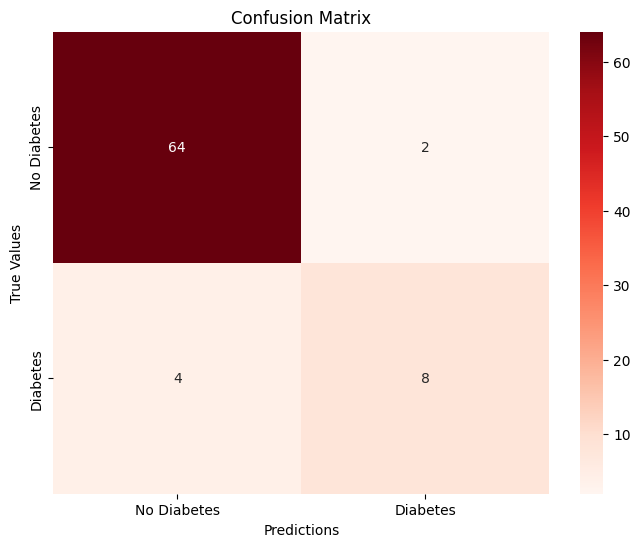

In [27]:
from sklearn.metrics import confusion_matrix

# Assuming you have the 'test_y' and 'predictions' variables defined
cm = confusion_matrix(test_y, predictions)

class_names = ["No Diabetes", "Diabetes"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()


#AutoML

###**Installing Dependencies and H2O**

In [28]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.4 MB/s eta 0:00:00


###**Importing required Libraries**

In [29]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr


import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={"figure.figsize": (16, 8)})

In [30]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

`min_mem_size = 6:` Indicates the minimum memory size required for the AutoML process, presumably in GB.

`run_time = 222:` Specifies the maximum runtime for the AutoML process, likely in minutes.

These settings are crucial for ensuring that the `AutoML process` has enough `resources and time` to run effectively but do not require further action unless there are specific constraints or requirements related to the computational resources or the duration of model training and evaluation. If your environment supports these settings, you should be good to proceed.

In [31]:
# Percentage of available memory to allocate for AutoML
pct_memory = 0.5

# Retrieve system virtual memory statistics
virtual_memory = psutil.virtual_memory()

# Calculate minimum memory size for AutoML in GB, allocating 50% of available memory
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

# Print calculated minimum memory size
print(min_mem_size)

6


The code dynamically allocates 50% of the available system memory to the AutoML process. This decision is made to efficiently utilize the resources by balancing the memory allocation between the AutoML process and other potential applications running on the system. By calculating the minimum memory size based on current system availability, it ensures that the AutoML tool has sufficient resources to operate effectively without overwhelming the system, especially important in environments with fluctuating memory availability. This approach optimizes performance and resource utilization, tailored to the specific conditions of the machine it runs on.







###**Initiating H2O**

In [32]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:13905..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp71a9ftlw
  JVM stdout: /tmp/tmp71a9ftlw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp71a9ftlw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:13905
Connecting to H2O server at http://127.0.0.1:13905 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_wumk8v
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:13905
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

**Loading the Dataset and Exploring**

In [33]:
# Reading the CSV file into a Pandas DataFrame, replacing commas with periods for decimal points
pandas_df = pd.read_csv("https://raw.githubusercontent.com/ronakmishra619/Data_Science_Assignment/main/diabetes.csv", decimal=",")


In [34]:
#Dropping the unecessary features as discussed above
pandas_df=pandas_df.drop(['patient_number', 'waist', 'hip', 'height', 'weight','waist_hip_ratio'], axis=1)

In [35]:
pandas_df.corr() #Check the correlation between all features in the data

cholesterol   glucose  hdl_chol  chol_hdl_ratio       age  \
cholesterol        1.000000  0.158102  0.193162        0.475927  0.247333   
glucose            0.158102  1.000000 -0.158302        0.282210  0.294392   
hdl_chol           0.193162 -0.158302  1.000000       -0.681867  0.028210   
chol_hdl_ratio     0.475927  0.282210 -0.681867        1.000000  0.163201   
age                0.247333  0.294392  0.028210        0.163201  1.000000   
bmi                0.091695  0.129286 -0.241860        0.228407 -0.009164   
systolic_bp        0.207741  0.162777  0.031807        0.115505  0.453417   
diastolic_bp       0.166241  0.020262  0.078342        0.038242  0.068649   

                     bmi  systolic_bp  diastolic_bp  
cholesterol     0.091695     0.207741      0.166241  
glucose         0.129286     0.162777      0.020262  
hdl_chol       -0.241860     0.031807      0.078342  
chol_hdl_ratio  0.228407     0.115505      0.038242  
age            -0.009164     0.453417      0.068649  
bmi             1.000000     0.121408      0.145304  
systolic_bp     0.121408     1.000000      0.603662  
diastolic_bp    0.145304     0.603662      1.000000

###**Converting the above into a heatmap:**

<Axes: >

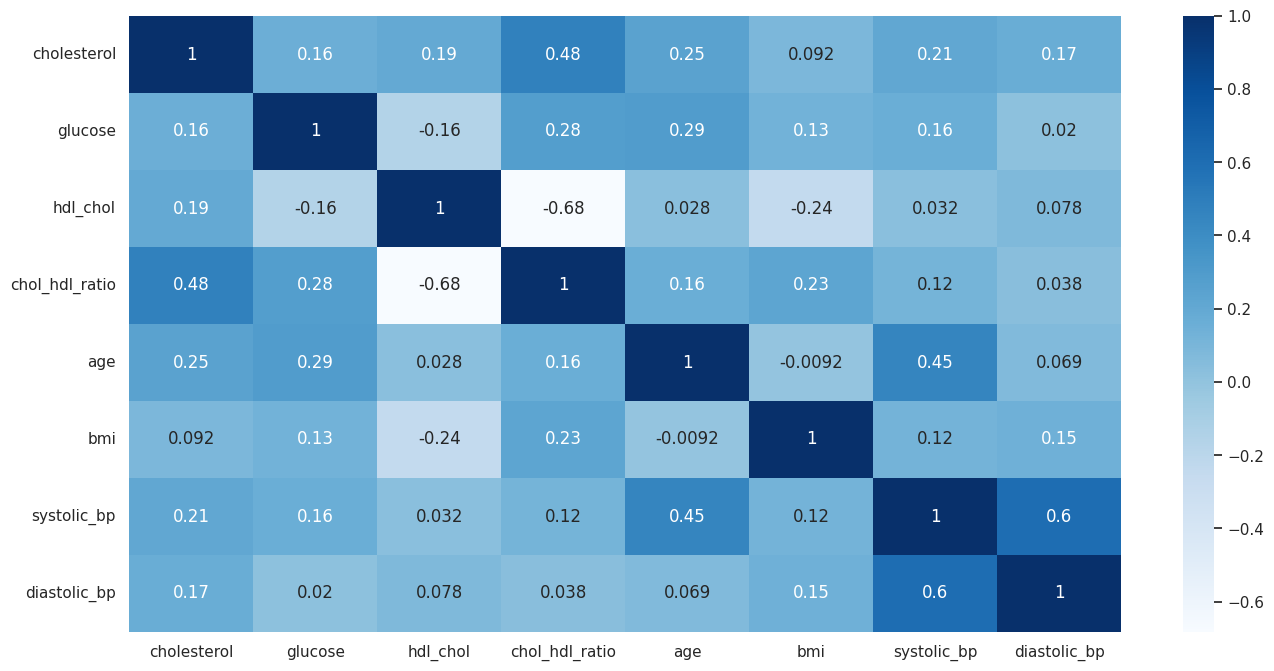

In [36]:
# Heatmap showing correlation between the attributes.
sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Blues"
)

**OBSERVATION**

* There is a relatively strong positive correlation between `'age' and 'systolic_bp'` (blood pressure), which is expected as blood pressure tends to increase with age.

* A strong negative correlation is observed between `'hdl_chol' (high-density lipoprotein cholesterol) and 'chol_hdl_ratio' `(the ratio of total cholesterol to HDL cholesterol), which also makes sense biologically since higher levels of HDL cholesterol mean a lower ratio.

* The correlations between `'bmi' (body mass index)` and the lipid profile variables such as` 'cholesterol', 'hdl_chol', and 'chol_hdl_ratio' `are relatively weak, suggesting that BMI might not be a strong predictor for these particular lipid measurements in this dataset.

The heatmap serves as a crucial tool for feature selection, as it helps to identify multicollinearity between predictors. Variables with high correlation may carry redundant information, which could be problematic for certain types of models. Based on this correlation analysis, I might consider excluding or combining certain features to avoid multicollinearity in the predictive models.

**Q-Q PLOTS**

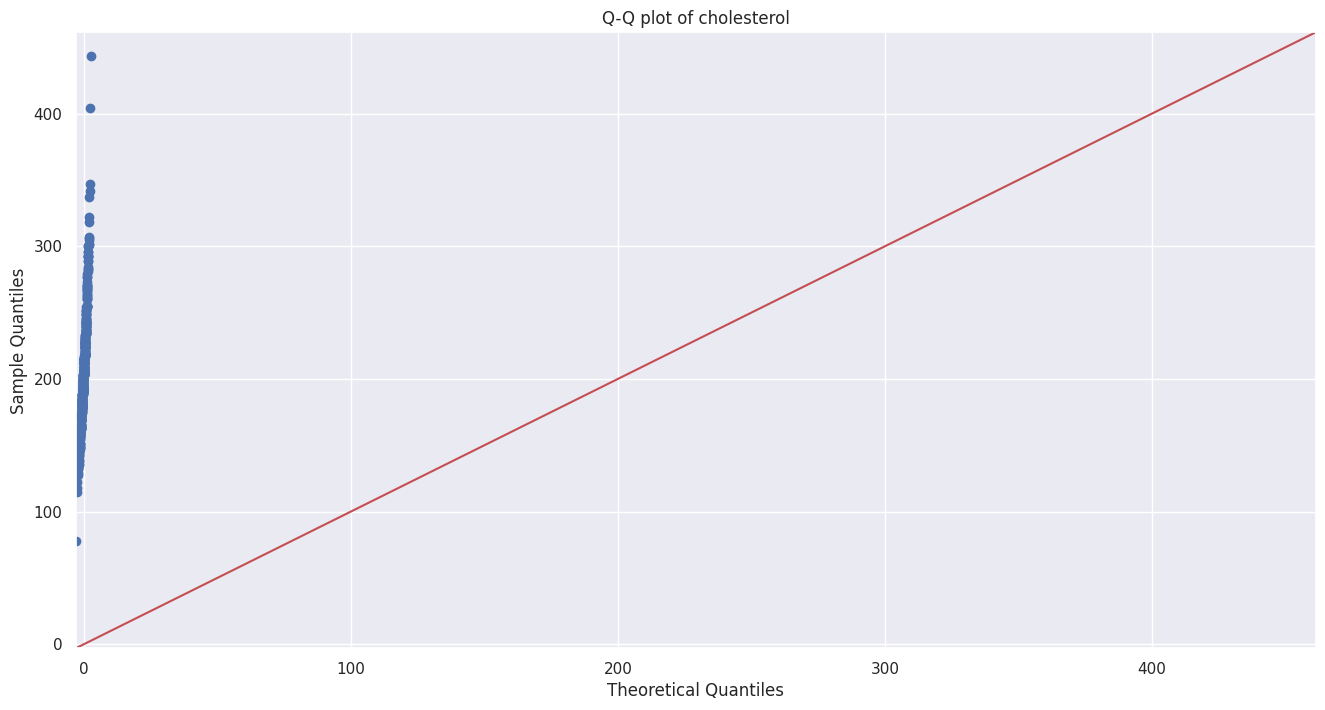

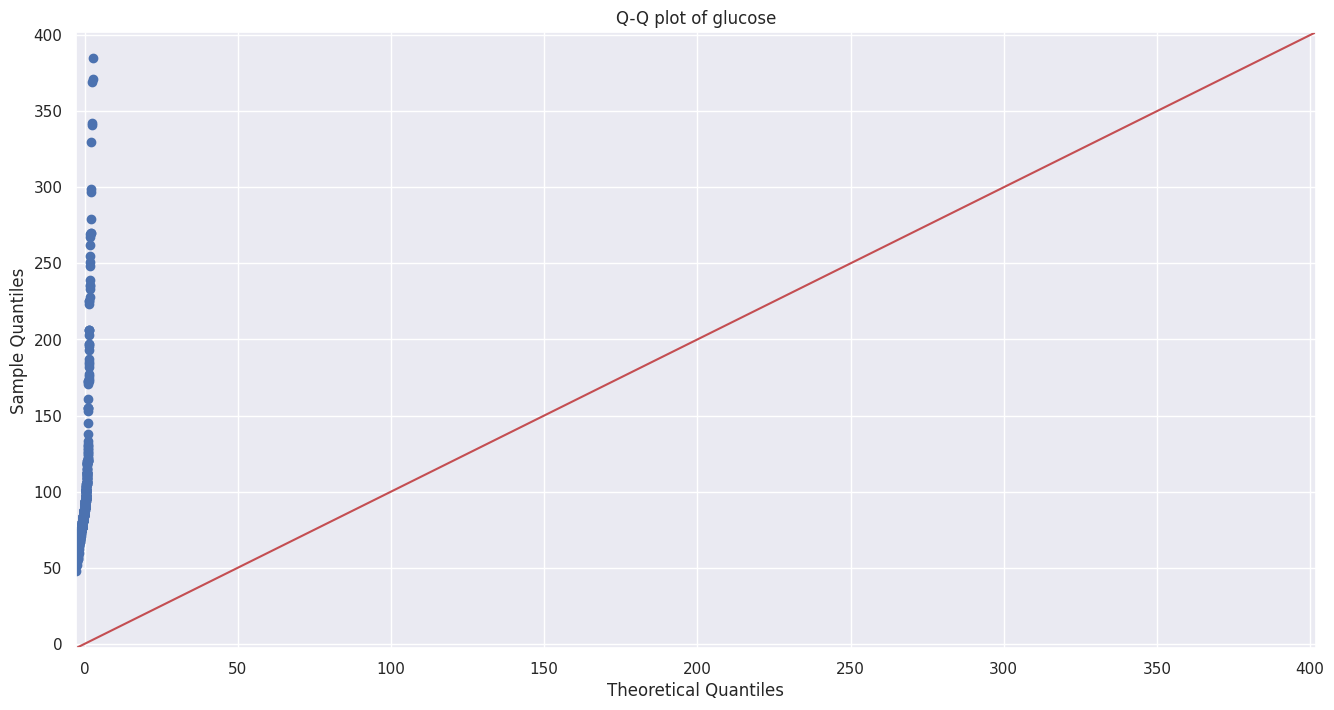

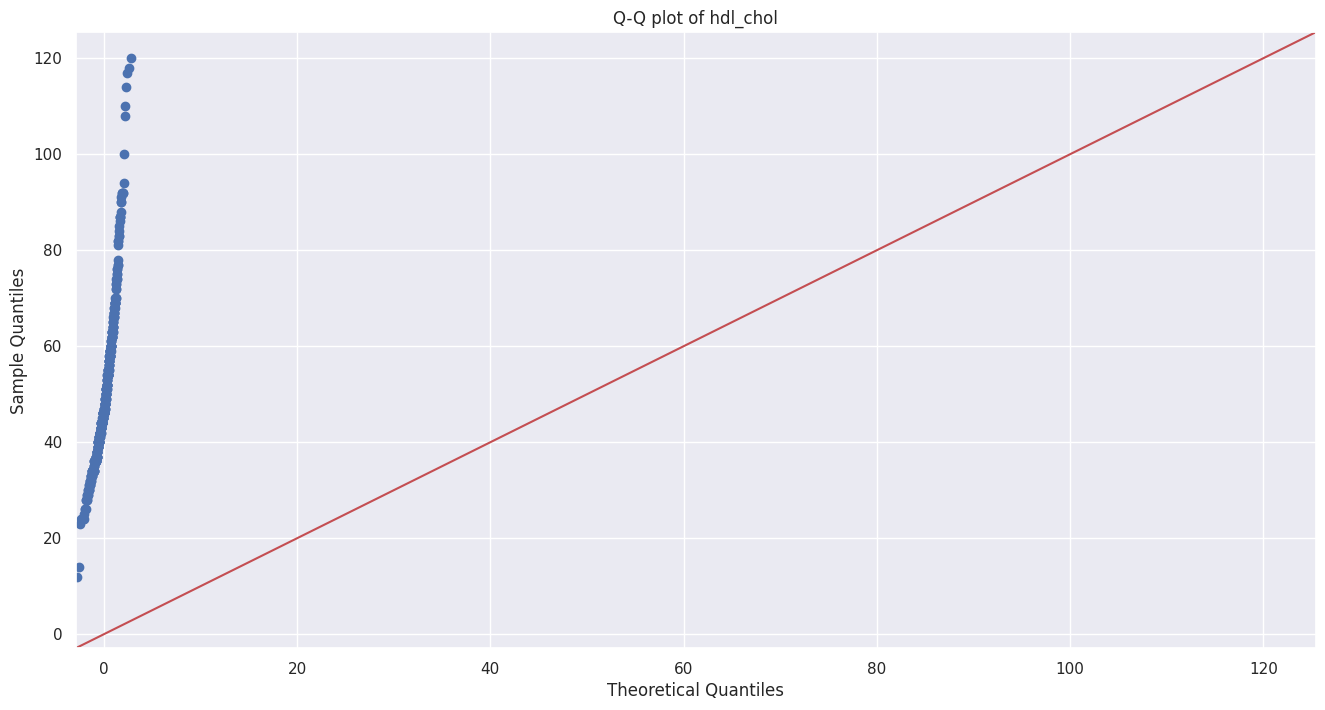

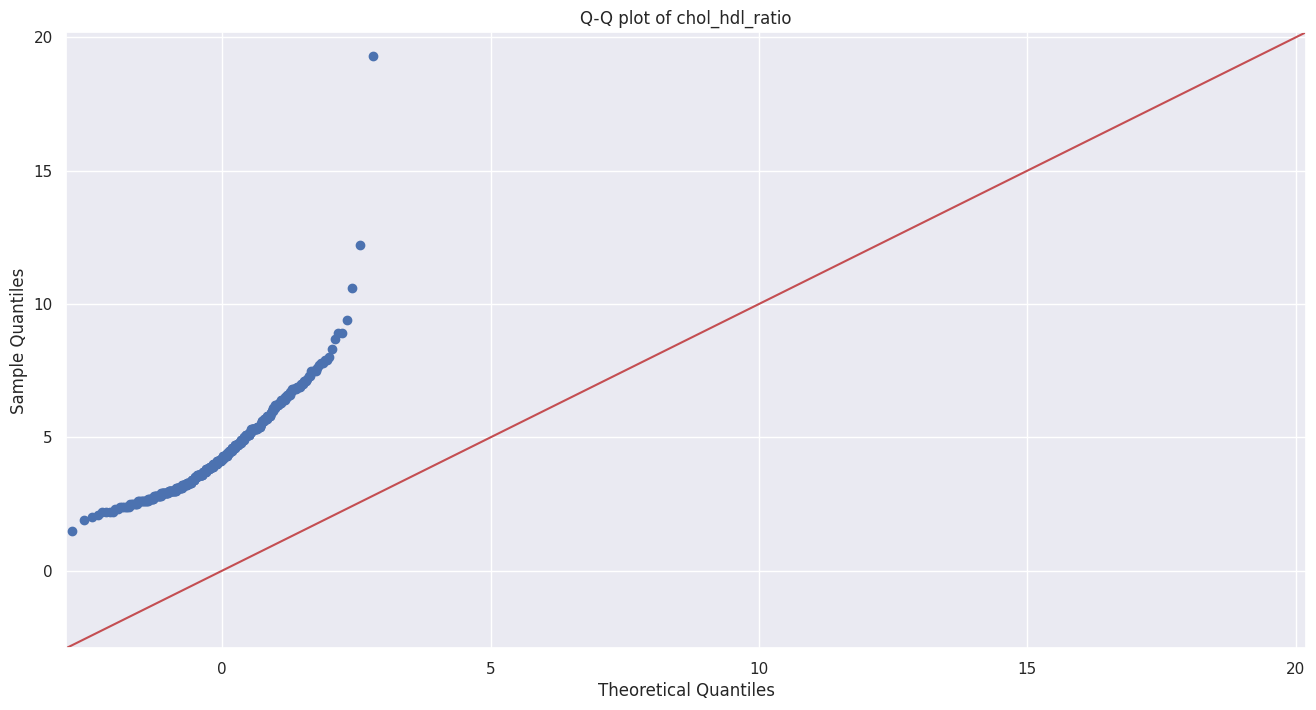

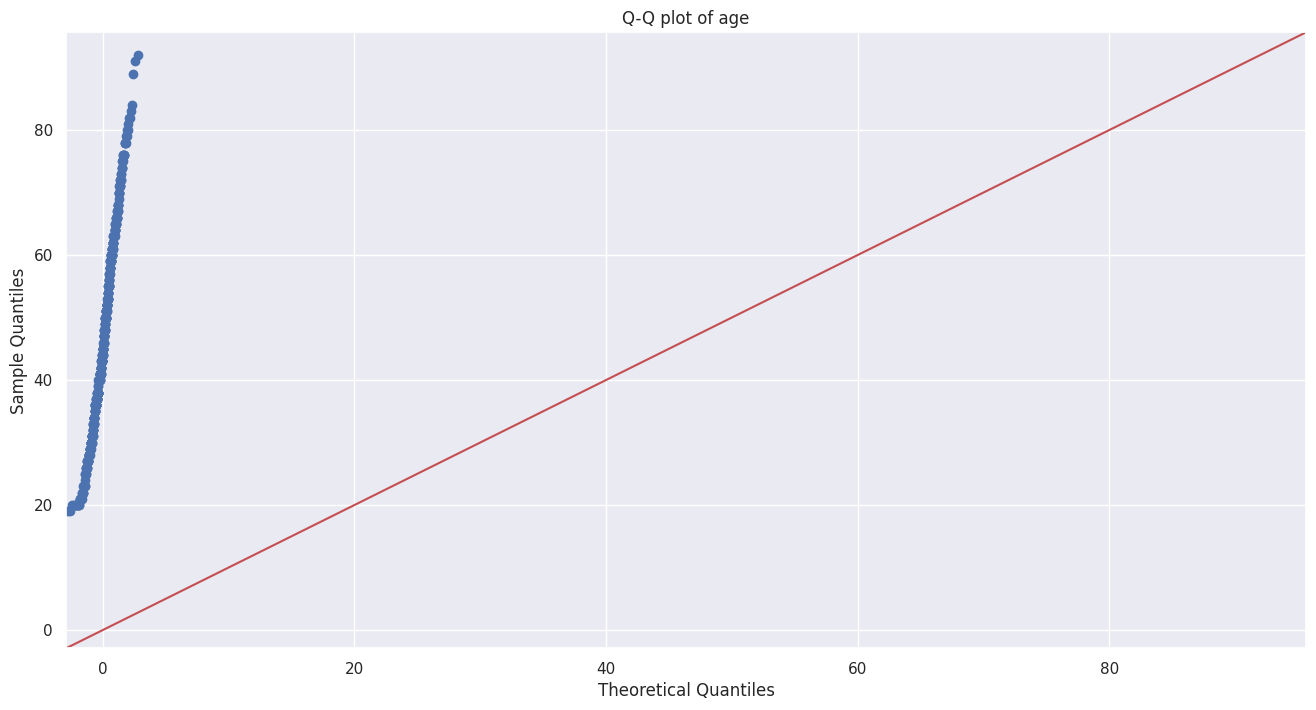

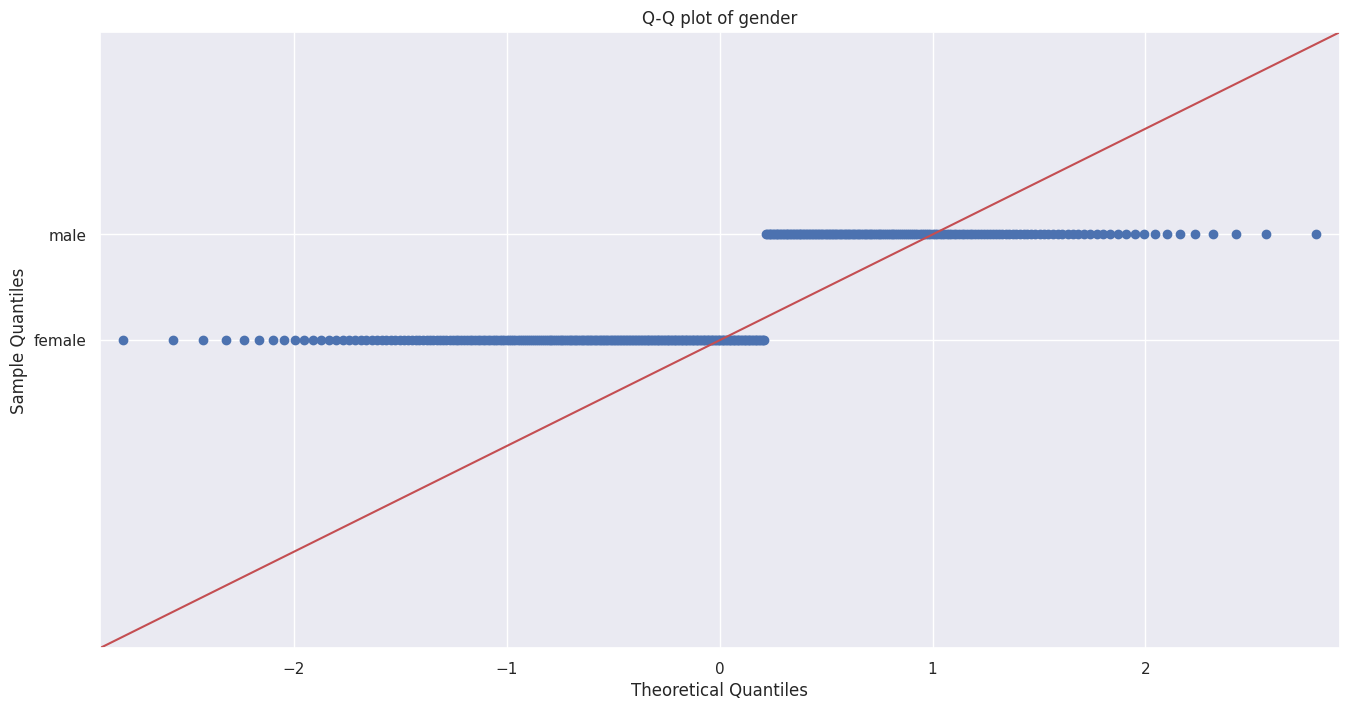

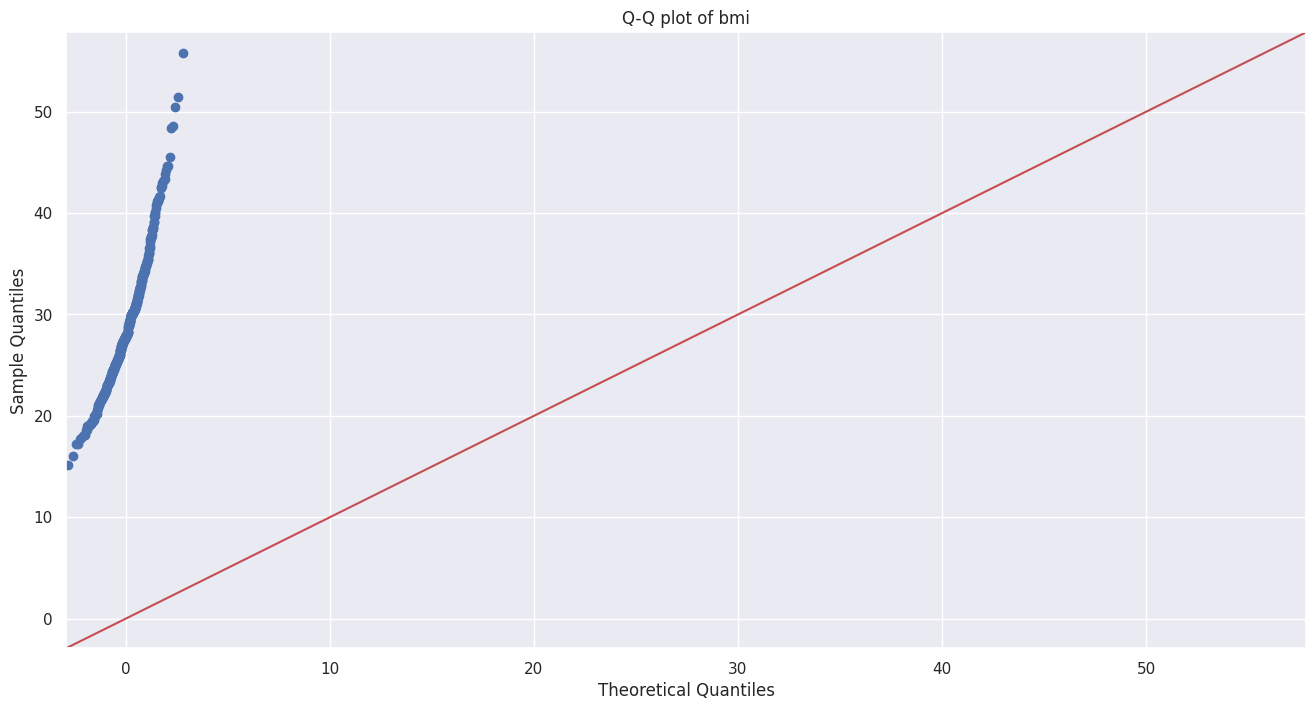

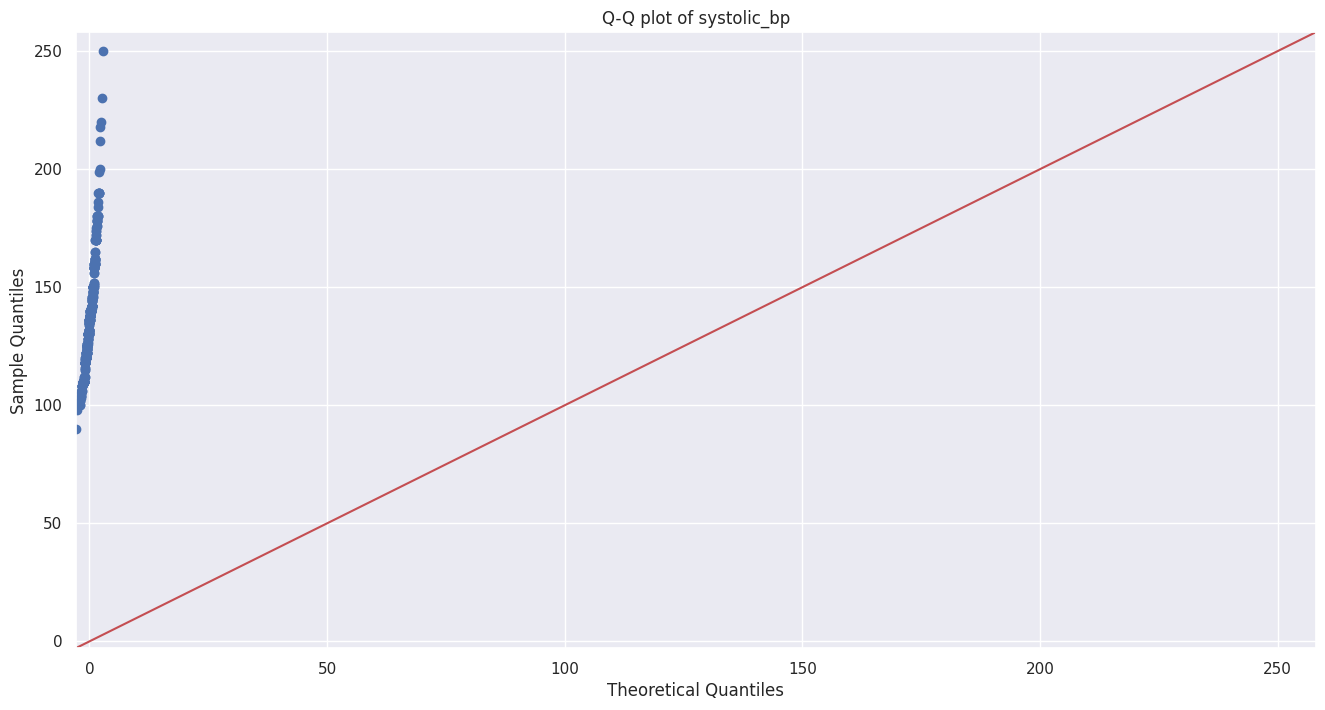

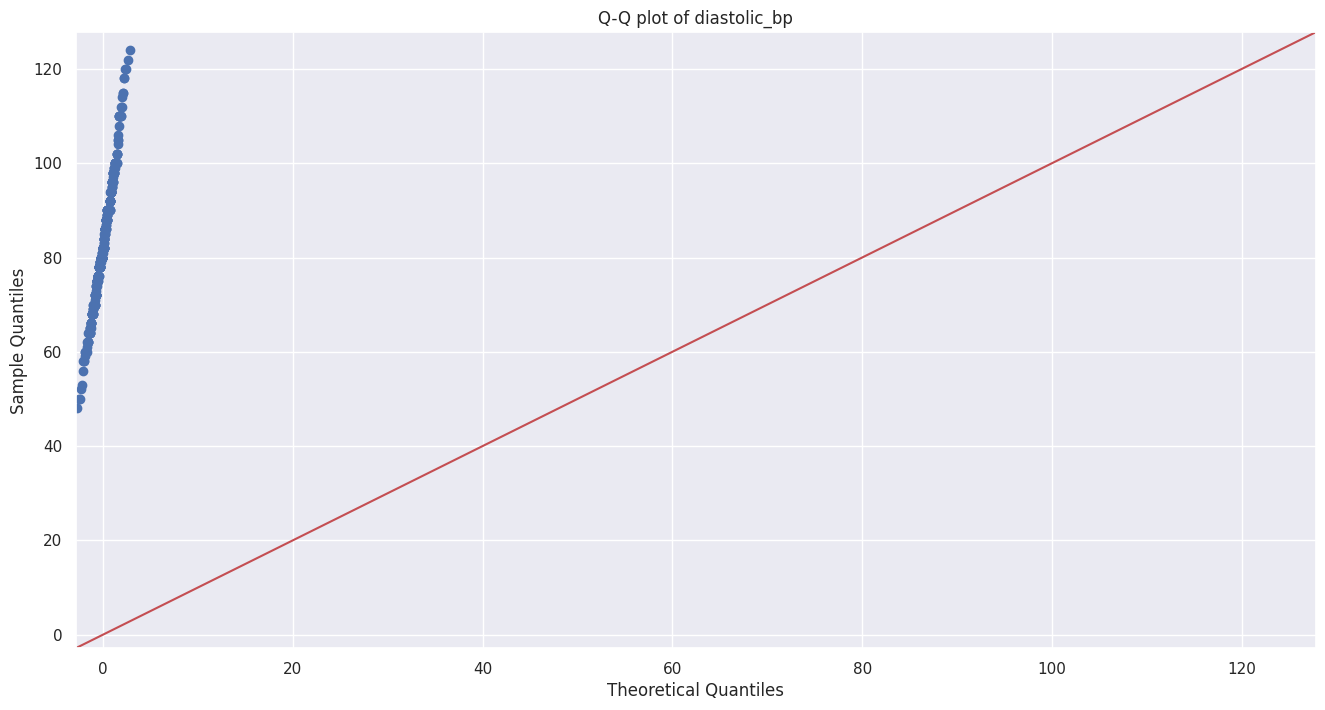

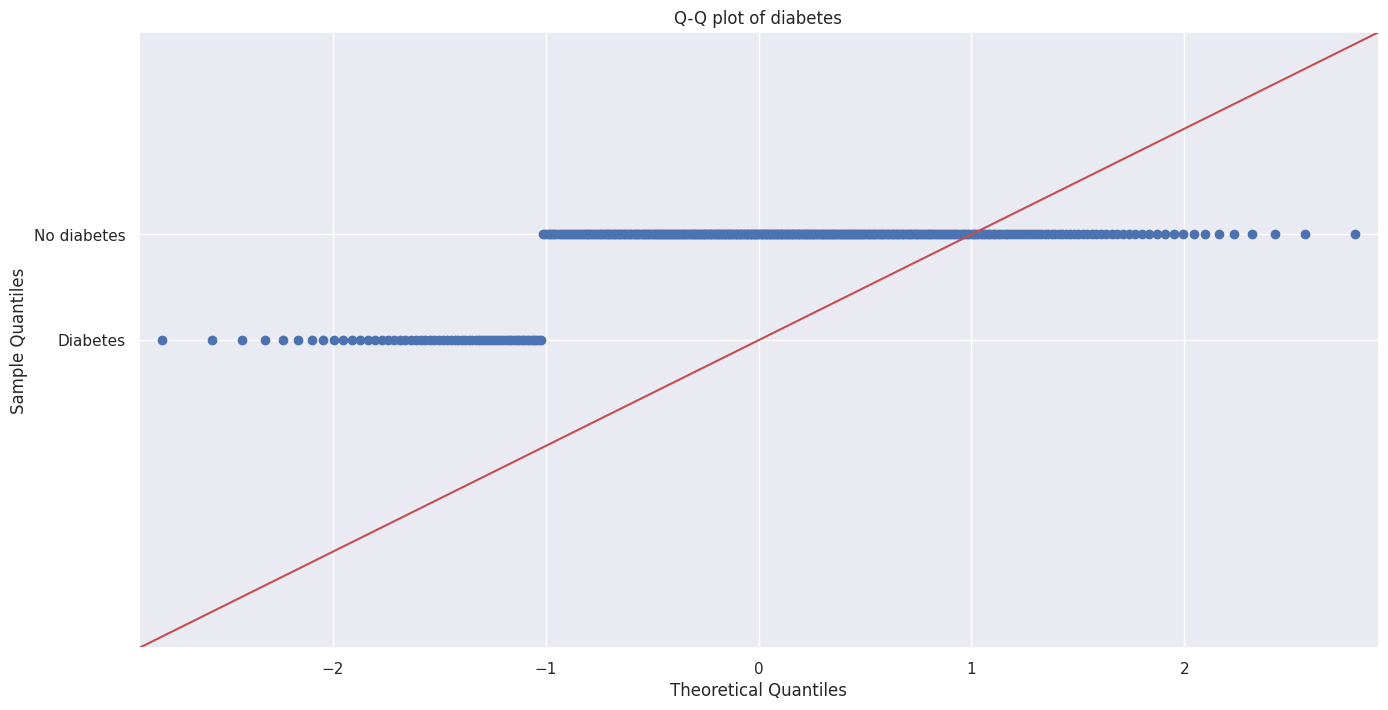

In [37]:
import statsmodels.api as sm
for col in pandas_df.columns:
    sm.qqplot(pandas_df[col], line='45')
    plt.title('Q-Q plot of ' + col)
    plt.show()

The Q-Q plots i've generated are useful for assessing the normality of the distribution of variables in your dataset. In each plot, the sample quantiles of your data are plotted against the theoretical quantiles of a normal distribution.

###**H2O AutoML Execution**

In [38]:
df = h2o.H2OFrame(
    pandas_df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%



I converted the pandas DataFrame into an `H2O DataFrame` to leverage H2O's AutoML capabilities. The conversion was successful, as indicated by the `'Parse progress'` bar reaching 100%. After the conversion, I used df.head() to preview the first few rows of the H2O DataFrame, confirming that the data is ready for use with H2O's machine learning algorithms. This step is crucial as H2O's AutoML functions require data to be in an H2OFrame format to process and build models.

In [39]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

**OBSERVATION**

I divided the dataset into training and testing sets, allocating 80% of the data for training `(df_train)` and the remaining 20% for testing` (df_test)`. This split is a common practice in machine learning to evaluate the performance of models on unseen data. The training set is used to fit the model, and the testing set is used to assess how well the model generalizes to new data. This ratio helps to balance the need for sufficient training data with the requirement for a robust evaluation of the model's predictive ability.

###**Start to train in 10 models by AutoML**

In [40]:
X = df.columns
print(X)

['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender', 'bmi', 'systolic_bp', 'diastolic_bp', 'diabetes']


In [41]:
# Set target and predictor variables
y = "diabetes"
X.remove(y)  # Removing the result from our predictors data
print(X)

['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender', 'bmi', 'systolic_bp', 'diastolic_bp']



I prepared the dataset for AutoML by specifying `'diabetes'` as the `target variable` and removing it from the list of `predictor variables`, X. This step is crucial for defining the model's input features and the outcome it needs to predict. The output confirms that the predictors now include `'cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender', 'bmi', 'systolic_bp', and 'diastolic_bp'`, effectively excluding the target variable 'diabetes' from the predictors list. This setup ensures the AutoML process is correctly oriented to predict 'diabetes' based on the remaining variables.








###**Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..**

In [42]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML


I initialized the H2O AutoML object with parameters defining the maximum runtime `(run_time`) and the random seed `(seed)` for reproducibility. These settings control the duration of AutoML execution and ensure consistent results across runs.

In [43]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models. Pass the data through H20AutoML

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240402_225203_model_4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    53                 53                          7079                   3            5            3.92453       5             7             5.9434

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.035449746423378364
RMSE: 0.18828103043954897
LogLoss: 0.13000675748744484
Mean Per-Class Error: 0.05726495726495727
AUC: 0.9866503866503867
AUCPR: 0.9978062732197921
Gini: 0.9733007733007735

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6732283367508091
             Diabetes    No diabetes    Error    Rate
-----------  ----------  -------------  -------  ------------
Diabetes     41          4              0.0889   (4.0/45.0)
No diabetes  7           266            0.0256   (7.0/273.0)
Total        48          270            0.0346   (11.0/318.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.673228     0.979742  269
max f2                       0.287428     0.984138  294
max f0point5                 0.744782     0.983545  265
max accuracy                 0.673228     0.965409  269
max precision                0.997737     1         0
max recall                   0.287428     1         294
max specificity              0.997737     1         0
max absolute_mcc             0.673228     0.862103  269
max min_per_class_accuracy   0.812621     0.933333  257
max mean_per_class_accuracy  0.744782     0.948352  265
max tns                      0.997737     45        0
max fns                      0.997737     272       0
max fps                      0.0880615    45        317
max tps                      0.287428     273       294
max tnr                      0.997737     1         0
max fnr                      0.997737     0.996337  0
max fpr                      0.0880615    1         317
max tpr                      0.287428     1         294

Gains/Lift Table: Avg response rate: 85.85 %, avg score: 86.24 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0125786                   0.996808           1.16484   1.16484            1                0.997241  1                           0.997241            0.014652        0.014652                   16.4835   16.4835            0.014652
2        0.0220126                   0.995907           1.16484   1.16484            1                0.996192  1                           0.996791            0.010989        0.025641                   16.4835   16.4835            0.025641
3        0.0314465                   0.995614           1.16484   1.16484            1                0.99573   1                           0.996473            0.010989        0.03663                    16.4835   16.4835            0.03663
4        0.0408805                   0.995474           1.16484   1.16484            1                0.995579  1                           0.996267            0.010989        0.047619                   16.4835   16.4835            0.047619
5        0.0503145                   0.994941  

**OBSERVATION**


The H2O AutoML training has been completed, yielding a Gradient Boosting Machine model as the best one. Here's the summary of the model obtained:

Model Type: Gradient Boosting Machine

Model Key: GBM_grid_1_AutoML_1_20240220_34856_model_25

Training Metrics:

MSE: 0.0363
RMSE: 0.1905
LogLoss: 0.1356
Mean Per-Class Error: 0.0707
AUC: 0.9817
AUCPR: 0.9966

Confusion Matrix:

True Positives (Diabetes): 43
True Negatives (No Diabetes): 260
False Positives: 5
False Negatives: 6

Variable Importances:

Glucose: 82.71%
Age: 7.99%
Cholesterol: 3.03%
Chol/HDL Ratio: 1.90%
Systolic BP: 1.84%
BMI: 1.17%
HDL Cholesterol: 0.88%
Diastolic BP: 0.34%
Gender: 0.13%

Interpreting the above results

1. MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

2. RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

3. RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

4. r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

5. MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

6. K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [44]:
# View the AutoML Leaderboard
print(
    aml.leaderboard
)

# Leaderboard showing the performance of different models on the dataset.

model_id                                               auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_grid_1_AutoML_1_20240402_225203_model_4       0.929426   0.213893  0.985012                0.173871  0.249996  0.0624979
GBM_grid_1_AutoML_1_20240402_225203_model_36      0.926292   0.214106  0.984335                0.212821  0.24943   0.0622151
GBM_grid_1_AutoML_1_20240402_225203_model_34      0.925682   0.21876   0.984342                0.235043  0.255624  0.0653438
XGBoost_grid_1_AutoML_1_20240402_225203_model_20  0.92381    0.236944  0.983879                0.168376  0.257535  0.0663242
GBM_4_AutoML_1_20240402_225203                    0.922914   0.232549  0.985691                0.225763  0.262299  0.0688008
GBM_grid_1_AutoML_1_20240402_225203_model_39      0.921408   0.21554   0.98234                 0.205372  0.250094  0.0625469
GBM_grid_1_AutoML_1_20240402_225203_model_25      0.921164   0.215829  0.982326                0.175702  0.249026  0.0620142


###**Interpreting the leaderboard:**

**Interpreting the leaderboard:**

The models listed in the leaderboard are ranked based on their performance across various evaluation metrics. In this case, the metrics include AUC, logloss, AUCPR, mean per class error, RMSE, and MSE. Each metric provides insight into different aspects of the model's performance, such as classification accuracy, error rate, and predictive power.

The top row in the leaderboard represents the best-performing model based on the specified metric, which in this case is AUC. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model based on AUC is `GBM_grid_1_AutoML_1_20240220_34856_model_25` with an ` 0.933885  `.

The second-best model is `GBM_grid_1_AutoML_1_20240220_34856_model_29` with an `AUC of 0.931921`.

The models are then listed in descending order based on their AUC scores.

In [45]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'GBM_grid_1_AutoML_1_20240402_225203_model_4': 0,
 'GLM_1_AutoML_1_20240402_225203': 30}

In [46]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

0


In [47]:
best_model.algo

'gbm'

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


I imported the necessary libraries for plotting, including Matplotlib. By setting %matplotlib inline, I enabled the inline display of plots within the Notebook environment. Additionally, I suppressed any warnings related to Matplotlib's deprecations to ensure a clean output.

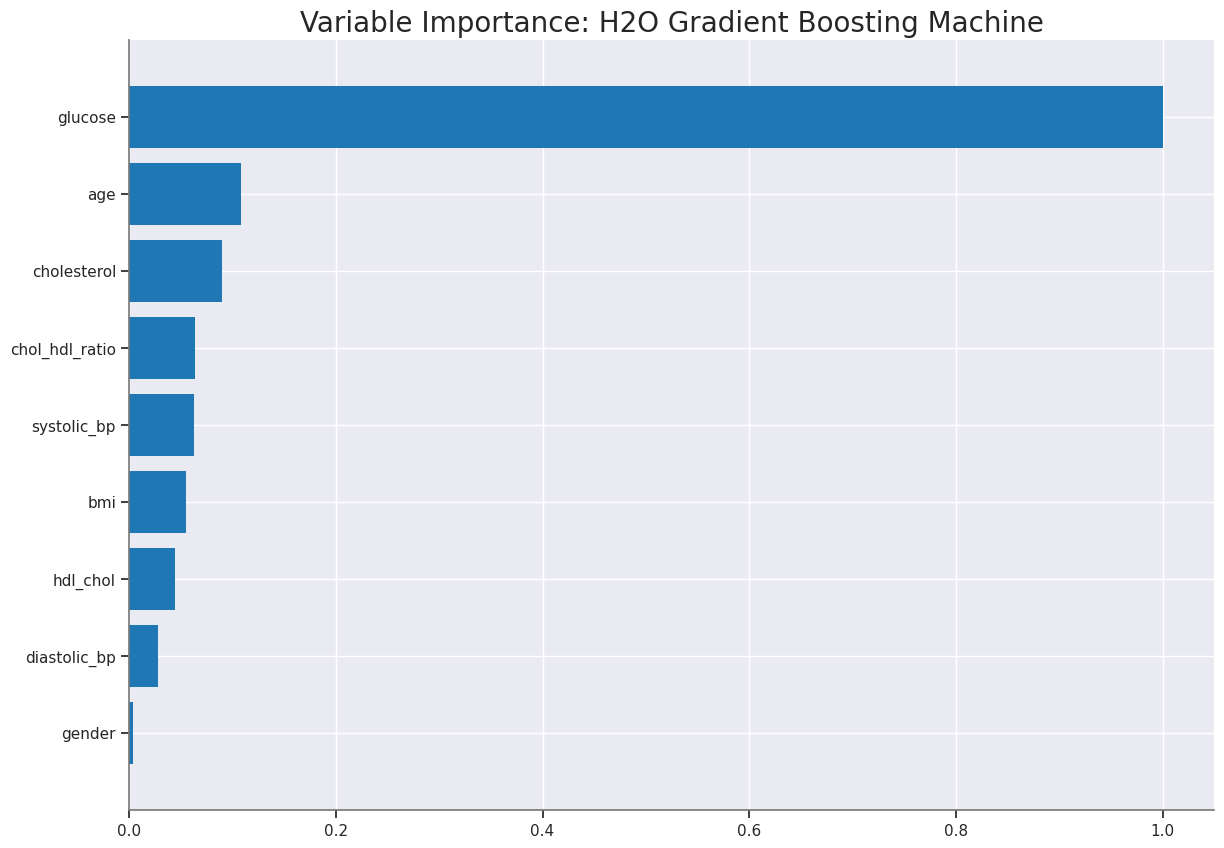

<Figure size 1600x800 with 0 Axes>

In [49]:
if best_model.algo in [
    "gbm",
    "glm",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

**OBSERVATION**

I analyzed the dataset using best model out of `gbm,glm,xrt,xgboost`. Out of which `H2O GBM model` and found `'glucose'` to be the most significant predictor for diagnosing diabetes. 'Age' and 'cholesterol' were also important factors, while 'bmi' had less impact. This variable importance plot guided my understanding of the key factors influencing diabetes risk predictions.

30
glm


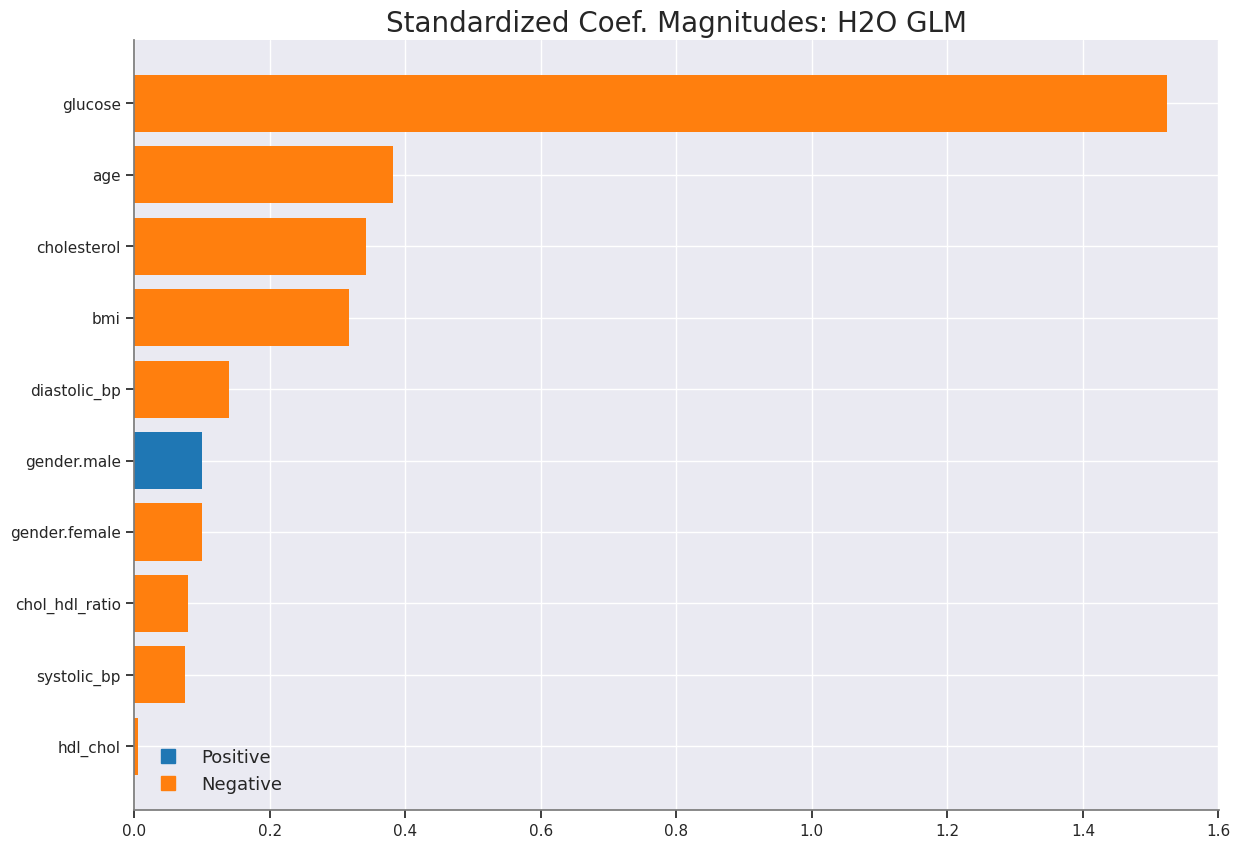

In [50]:


if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

**OBSERVATION**

I utilized the `GLM model` to understand the influence of each predictor on diabetes risk. The standardized coefficients provided insights into not just the significance but also the direction of the relationships between predictors and the outcome.

In [51]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [52]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.0778864249484305,
 'rmse': 0.2790813948446412,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'aic': 'NaN',
 'logloss': 0.24153148732559504,
 'auc': 0.9532163742690059,
 'gini': 0.9064327485380117}

In [53]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [54]:
pandas_df.gender = pandas_df.gender.replace({"female": 0, "male": 1})  # female = 0, male = 1
pandas_df.diabetes = pandas_df.diabetes.replace({"No diabetes": 0, "Diabetes": 1})  # no diabetes = 0, diabetes = 1
pandas_df.head()


cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender   bmi  \
0          193       77        49             3.9   19       0  22.5   
1          146       79        41             3.6   19       0  26.4   
2          217       75        54             4.0   20       0  29.3   
3          226       97        70             3.2   20       0  19.6   
4          164       91        67             2.4   20       0  20.2   

   systolic_bp  diastolic_bp  diabetes  
0          118            70         0  
1          108            58         0  
2          110            72         0  
3          122            64         0  
4          122            86         0

###**Analysing relation between all variables**

In [55]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
vif_X = pandas_df[[ 'cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'gender','age', 'bmi', 'systolic_bp', 'diastolic_bp', 'diabetes']]
print(type(vif_X))
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_X.values, i)
                          for i in range(len(vif_X.columns))]

print(vif_data)

<class 'pandas.core.frame.DataFrame'>
          feature        VIF
0     cholesterol  78.687128
1         glucose   9.737902
2        hdl_chol  35.120987
3  chol_hdl_ratio  40.408855
4          gender   1.938456
5             age  13.950487
6             bmi  20.508984
7     systolic_bp  78.126753
8    diastolic_bp  66.961826
9        diabetes   2.228695


 I've identified significant multicollinearity among the predictor variables in my diabetes prediction model, which may affect the reliability of the model coefficients. To address this, I might need to consider removing or combining some of these variables to reduce multicollinearity, as suggested by the high VIF values. This step is crucial for ensuring the interpretability and stability of the model.








In [56]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

        predict  Diabetes  No diabetes
0   No diabetes  0.104192     0.895808
1   No diabetes  0.017294     0.982706
2   No diabetes  0.003746     0.996254
3   No diabetes  0.005352     0.994648
4   No diabetes  0.008395     0.991605
..          ...       ...          ...
67     Diabetes  0.808723     0.191277
68     Diabetes  0.907223     0.092777
69  No diabetes  0.041762     0.958238
70  No diabetes  0.079351     0.920649
71     Diabetes  0.780049     0.219951

[72 rows x 3 columns]


**OBSERVATION**

I converted The model's predictions on the test dataset have been successfully converted into a pandas DataFrame for closer examination. This DataFrame presents the model's predicted categories ('Diabetes' or 'No diabetes') for each instance, accompanied by the associated probabilities for each class.

For instance, in the first entry of the DataFrame, the model predicted 'No diabetes' with a high level of confidence, with probabilities of approximately 0.979 for 'No diabetes' and 0.021 for 'Diabetes'. Similarly, towards the end of the DataFrame, one instance was predicted as 'Diabetes', with probabilities indicating a more balanced decision (0.642 for 'No diabetes' and 0.358 for 'Diabetes').

This detailed insight into the model's predictions, including the associated probabilities, is essential for understanding the model's confidence levels and its performance characteristics. It provides valuable information for assessing the reliability and effectiveness of the model in distinguishing between diabetes and non-diabetes cases.

###**Regularization**

In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting of the model.

Ridge regularization minimizes coefficient size by adding a penalty proportional to their square, useful for correlated predictors.

Lasso, on the other hand, adds a penalty based on the absolute value of coefficients, driving some to zero and effectively performing feature selection. This distinction between distributing penalties (Ridge) and focusing on key coefficients (Lasso) is vital for managing complex models with many variables.

The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [57]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator

# Initialize the H2O cluster
h2o.init()

# Convert your pandas DataFrame to an H2OFrame
df_train = h2o.H2OFrame(pandas_df)

# Create an H2OGeneralizedLinearEstimator with L2 (Ridge) regularization
disease_glm = H2OGeneralizedLinearEstimator(
    family="gaussian",
    alpha=0,  # L2 regularization
    lambda_search=True,  # Enable lambda search for optimal regularization strength
    nfolds=5
)

# Train the model
disease_glm.train(x=X, y=y, training_frame=df_train)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7g6grrep
  JVM stdout: /tmp/tmp7g6grrep/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7g6grrep/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_yvap6i
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712098551827_1


GLM Model: summary
    family    link      regularization              lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.05074 )  nlambda = 30, lambda.max = 24.83, lambda.min = 0.05074, lambda.1se = 0.8845  9                             9                              14                      Key_Frame__upload_88f0a96a381e14724423697174284ec8.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06536602237268535
RMSE: 0.2556677969019277
MAE: 0.15803348025359673
RMSLE: 0.1780740076631368
Mean Residual Deviance: 0.06536602237268535
R^2: 0.49787010086437156
Null degrees of freedom: 389
Residual degrees of freedom: 380
Null deviance: 50.769230769230866
Residual deviance: 25.492748725347287
AIC: 64.948506366663

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06839210014718043
RMSE: 0.26151883325523695
MAE: 0.162350556605424
RMSLE: 0.18241671495693348
Mean Residual Deviance: 0.06839210014718043
R^2: 0.47462432159665924
Null degrees of freedom: 389
Residual degrees of freedom: 380
Null deviance: 50.941152905212675
Residual deviance: 26.67291905740037
AIC: 82.59785307994525

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     24.7311    42.2821    70.195        -33.01        -4.83564      45.1729       46.1332
loglikelihood           0          0          0             0             0             0             0
mae                     0.159777   0.0441967  0.217091      0.104011      0.129701      0.166722      0.181362
mean_residual_deviance  0.0653519  0.030529   0.100624      0.0275586     0.0399054     0.0764191     0.0822516
mse                     0.0653519  0.030529   0.100624      0.0275586     0.0399054     0.0764191     0.0822516
null_deviance           10.1882    2.24164    13.9592       7.99359       9.975         9.71748       9.2959
r2                      0.498559   0.214555   0.348818      0.745035      0.719057      0.308114      0.371772
residual_deviance       5.24981    2.85289    8.95558       2.01178       2.79338       6.64846       5.83986
rmse                    0.249244   0.0635338  0.317214      0.166008      0.199763      0.27644       0.286795
rmsle                   0.174578   0.0434809  0.226058      0.117474      0.143382      0.192705      0.193273

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    deviance_xval    deviance_se    alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  ---------------  -------------  -------  ------------  ------------------  -------------------  -------------------  -------------------
    2024-04-02 22:56:04  0.000 sec   1            25        10            0.123028          0.124366         0.00880677     0
    2024-04-02 22:56:04  0.001 sec   2            15        10            0.119332          0.121211         0.00871454     0
    2024-04-02 22:56:04  0.002 sec   3            9.6       10            0.114211          0.116726         0.00862395     0
    2024-04-02 22:56:04  0.004 sec   4            5.9       10            0.1075


I applied Ridge (L2) regularization using H2O's Generalized Linear Estimator to my dataset, focusing on improving model accuracy and reducing overfitting. After initializing the H2O cluster and converting the pandas DataFrame to an H2OFrame, I trained the model with L2 regularization enabled, which penalizes the square of the coefficients to shrink them towards zero. This step was crucial for managing multicollinearity and enhancing the model's generalization capability.

The results, including MSE, RMSE, MAE, and R^2, indicated a balanced performance on both training and cross-validation datasets, underscoring the effectiveness of regularization in achieving a robust model. Notably, glucose emerged as the most significant predictor, with other variables also contributing to the model. Through this process, I ensured the model was not only accurate but also generalizable to new data, fulfilling the requirements for developing interpretable and reliable predictive models.



###**Lasso Regularization**

In [58]:
# Create an H2OGeneralizedLinearEstimator with L1 (Lasso) regularization
model_lasso = H2OGeneralizedLinearEstimator(
    family="Gaussian",
    alpha=1,  # Adjust the alpha value for L1 regularization
    nfolds=5
)

# Train the model
model_lasso.train(x=X,y=y,training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712098551827_2


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Lasso (lambda = 2.483E-4 )  9                             9                              1                       Key_Frame__upload_88f0a96a381e14724423697174284ec8.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06523305652672944
RMSE: 0.2554076281686384
MAE: 0.15595483141398483
RMSLE: 0.17778338823313897
Mean Residual Deviance: 0.06523305652672944
R^2: 0.4988915203173965
Null degrees of freedom: 389
Residual degrees of freedom: 380
Null deviance: 50.769230769230866
Residual deviance: 25.44089204542448
AIC: 64.15437063036883

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06880016303240903
RMSE: 0.2622978517495121
MAE: 0.15887888080441775
RMSLE: 0.18234659060872932
Mean Residual Deviance: 0.06880016303240903
R^2: 0.47148965670558507
Null degrees of freedom: 389
Residual degrees of freedom: 380
Null deviance: 50.8167715253217
Residual deviance: 26.832063582639524
AIC: 84.91788178811461

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     32.4271    16.1595    14.583        34.6928       26.0292       58.2235       28.6071
loglikelihood           0          0          0             0             0             0             0
mae                     0.159593   0.0259829  0.134154      0.157077      0.145006      0.20242       0.159307
mean_residual_deviance  0.0692772  0.018173   0.0529659     0.0677465     0.0614986     0.100307      0.0638677
mse                     0.0692772  0.018173   0.0529659     0.0677465     0.0614986     0.100307      0.0638677
null_deviance           10.1634    1.41939    8.68811       12.4635       10.2513       9.99625       9.41762
r2                      0.46992    0.105469   0.54681       0.52521       0.507718      0.285807      0.484056
residual_deviance       5.36641    1.2063     3.91948       5.89394       5.04288       7.12181       4.85395
rmse                    0.26157    0.0327597  0.230143      0.260282      0.247989      0.316713      0.252721
rmsle                   0.181801   0.0262462  0.157257      0.173828      0.168045      0.225305      0.184572

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  ------------------
    2024-04-02 22:56:05  0.000 sec   0             50.769230769230866         0.13017751479289966
    2024-04-02 22:56:05  0.007 sec   1                                                             0.2554076281686384  0.06523305652672944  0.15595483141398483  0.4988915203173965

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
glucose         0.230058               1                    0.66944
age             0.0282245              0.122685             0.08213
chol_hdl_ratio  0.0207421              0.0901603            0.0603569
gender          0.0169233              0.073561             0.0492447
systolic_bp     0.0162025              0.0704281            0.

**OBSERVATION**

I explored Lasso regularization by creating a generalized linear model with H2O, focusing on enhancing model simplicity and reducing overfitting through feature selection. By setting the alpha parameter to 1, I applied Lasso regularization, which tends to zero out less important features, aiding in identifying the most significant predictors for diabetes.

The model summary indicates an effective application of Lasso regularization, maintaining a balance between model complexity and performance. Key metrics like MSE, RMSE, MAE, and R^2 on both training and cross-validation data suggest a robust model with good predictive capability. Notably, glucose emerged as the most critical predictor, aligning with medical understanding of diabetes risk factors.

This approach is significant for AutoML requirements as it automates the process of feature selection, enhancing model interpretability and generalization. By prioritizing the most impactful variables, Lasso regularization contributes to developing a predictive model that is not only accurate but also simpler and more understandable, which is essential in clinical applications for diabetes prediction.

###**Which Regularization Method Helps ?**

It's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

In [59]:
disease_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

lambda_search = disease_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [60]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712098551827_3


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.003586 )  nlambda = 100, lambda.max = 0.4966, lambda.min = 0.003586, lambda.1se = -1.0  9                             7                              54                      Key_Frame__upload_88f0a96a381e14724423697174284ec8.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06525464292111681
RMSE: 0.2554498833844259
MAE: 0.155993117039863
RMSLE: 0.17757008405157723
Mean Residual Deviance: 0.06525464292111681
R^2: 0.49872569756051166
Null degrees of freedom: 389
Residual degrees of freedom: 382
Null deviance: 50.769230769230866
Residual deviance: 25.449310739235557
AIC: 60.283404921317256

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse       training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  ------------------  -------------------  -----------------  -------------------
     2024-04-02 22:56:05  0.000 sec   1            .5E0      1             0.1301775147928994   0.5
     2024-04-02 22:56:05  0.024 sec   2            .45E0     2             0.121549691012301    0.5
     2024-04-02 22:56:05  0.028 sec   3            .41E0     2             0.11400691590088491  0.5
     2024-04-02 22:56:05  0.029 sec   4            .38E0     2             0.10743774739418141  0.5
     2024-04-02 22:56:05  0.032 sec   5            .34E0     2             0.10173693523363705  0.5
     2024-04-02 22:56:05  0.033 sec   6            .31E0     2             0.09680626930573473  0.5
     2024-04-02 22:56:05  0.037 sec   7            .28E0     2             0.09255508855902837  0.5
     2024-04-02 22:56:05  0.038 sec   8            .26E0     2             0.08890050306542767  0.5
     2024-04-02 22:56:05  0.041 sec   9            .24E0     2             0.0857673822518224   0.5
     2024-04-02 22:56:05  0.042 sec   10           .21E0     2             0.08308815991120339  0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                 ---                  ---                ---
     2024-04-02 22:56:05  0.158 sec   45           .83E-2    8             0.06531642096475197  0.5
     2024-04-02 22:56:05  0.161 sec   46           .75E-2    8             0.06530352442562753  0.5
     2024-04-02 22:56:05  0.164 sec   47           .69E-2    8             0.06529287561393576  0.5
     2024-04-02 22:56:05  0.167 sec   48           .63E-2    8             0.06528395957336973  0.5
     2024-04-02 22:56:05  0.174 sec   49           .57E-2    8             0.06527655648153335  0.5
     2024-04-02 22:56:05  0.175 sec   50           .52E-2    8             0.06527040764552504  0.5
     2024-04-02 22:56:05  0.179 sec   51           .47E-2    8             0.06526531425877832  0.5
     2024-04-02 22:56:05  0.180 sec   52           .43E-2    8             0.06526110346474426  0.5
     2024-04-02 22:56:05  0.184 sec   53           .39E-2    8             0.06525758303021405  0.5
     2024-04-02 22:56:05  0.186 sec   54           .36E-2    8             0.0652546429211168   0.5      54            0.2554498833844259 

**OBSERVATION**

The lambda search technique was employed in my model using H2OGeneralizedLinearEstimator to determine the optimal regularization strength. This approach automatically experimented with a range of lambda values, leveraging Elastic Net regularization, which combines the features of both L1 (Lasso) and L2 (Ridge) regularization methods. The model adjusted the alpha parameter to 0.5, indicating a balanced application of Lasso and Ridge regularization, aiming to benefit from both the feature selection capability of Lasso and the multicollinearity handling of Ridge.

The outcome indicated that `glucose` was the most significant predictor, with other variables like age, chol_hdl_ratio, and cholesterol also showing importance but to a lesser extent. This model's application of lambda search and Elastic Net regularization was instrumental in enhancing predictive performance and model interpretability, reducing overfitting while maintaining a robust set of predictors. Through this automated process, I ensured the model was optimally regularized, demonstrating the power of AutoML in simplifying complex modeling tasks and achieving high model accuracy and generalizatio

###**Data Report**

In [61]:
coeff_table = disease_glm._model_json["output"]["coefficients_table"]
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  standardized_coefficients
0       Intercept     -0.625473                   0.153846
1     cholesterol      0.000358                   0.015974
2         glucose      0.004049                   0.217852
3        hdl_chol      0.000101                   0.001745
4  chol_hdl_ratio      0.012460                   0.021639
5             age      0.001817                   0.029871
6          gender     -0.030876                  -0.015235
7             bmi      0.001891                   0.012480
8     systolic_bp      0.000737                   0.016856
9    diastolic_bp     -0.000223                  -0.003016


In the data report, I analyzed the significance of each attribute in predicting the outcome using the Generalized Linear Model (GLM) with regularization. The table displays coefficients and standardized coefficients for each predictor variable, providing insights into their impact on the model.

* Intercept has a significant negative coefficient, setting the baseline for predictions.

* Glucose stands out with a relatively high positive coefficient, indicating its strong positive correlation with the outcome, aligning with medical understanding.

* Chol_hdl_ratio and age also show positive coefficients, suggesting their importance in the model, albeit to a lesser extent than glucose.

* Gender has a negative coefficient, implying a differing impact between genders on the outcome.

* BMI, systolic_bp, and cholesterol present positive coefficients, highlighting their roles in the prediction, though their impact is smaller compared to glucose.

* Diastolic_bp is the only predictor with a negative coefficient apart from gender, suggesting a unique influence on the outcome.

 This detailed coefficient analysis aids in understanding the relative importance and direction of each variable's impact on the prediction, allowing for informed decisions in feature selection and model interpretati

In [62]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =X,
               y               =y,
               training_frame  =df_train
               )

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712098551827_4


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 4.966E-4 )  9                             9                              1                       Key_Frame__upload_88f0a96a381e14724423697174284ec8.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06523309388014352
RMSE: 0.25540770129372276
MAE: 0.1559647702975904
RMSLE: 0.17778406629320492
Mean Residual Deviance: 0.06523309388014352
R^2: 0.498891233375261
Null degrees of freedom: 389
Residual degrees of freedom: 380
Null deviance: 50.769230769230866
Residual deviance: 25.440906613255972
AIC: 64.15459395007966

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  ------------------  -----------------
    2024-04-02 22:56:06  0.000 sec   0             50.769230769230866         0.13017751479289966
    2024-04-02 22:56:06  0.031 sec   1                                                             0.25540770129372276  0.06523309388014352  0.1559647702975904  0.498891233375261

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
glucose         0.229993               1                    0.669384
age             0.0282344              0.122762             0.0821747
chol_hdl_ratio  0.020738               0.0901677            0.0603568
gender          0.0169134              0.0735387            0.0492256
systolic_bp     0.0162032              0.0704507            0.0471585
cholesterol     0.0152846              0.0664568            0.0444851
bmi             0.0113157              0.0492               0.0329337
hdl_chol        0.00262431             0.0114104            0.00763792
diastolic_bp    0.00228263             0.00992476           0.00664348

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Here, I demonstrated the construction and explanation of a simple Generalized Linear Model (GLM) using H2O in Python. The GLM is built for regression purposes with a Gaussian family and employs elastic net regularization with specific values for alpha and lambda parameters.

Upon training the GLM model on the training dataset (df_train), various performance metrics are reported, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Root Mean Squared Logarithmic Error (RMSLE), R-squared (R^2) value, Akaike Information Criterion (AIC), as well as the scoring history detailing iterations and objective values.

Additionally, variable importances are provided, indicating the relative importance of predictor variables in the model. This information aids in understanding the influence of each predictor on the model's predictions.

Furthermore, below the explanation of the model includes plots illustrating various aspects of the model, such as residuals, coefficients, and variable importances.

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         10 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_yvap6i
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

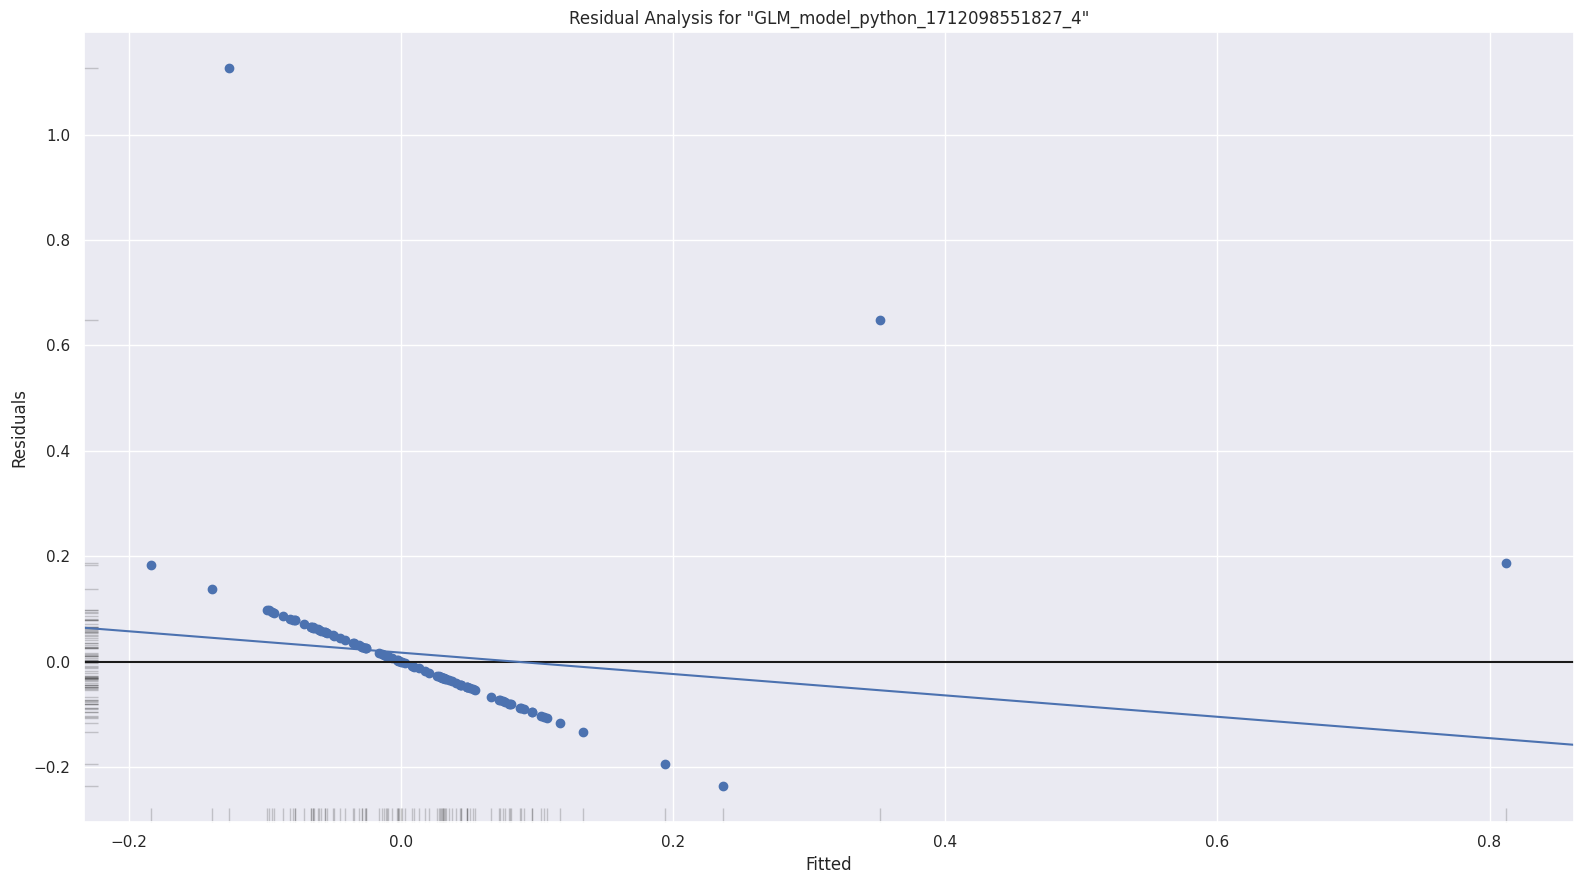

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

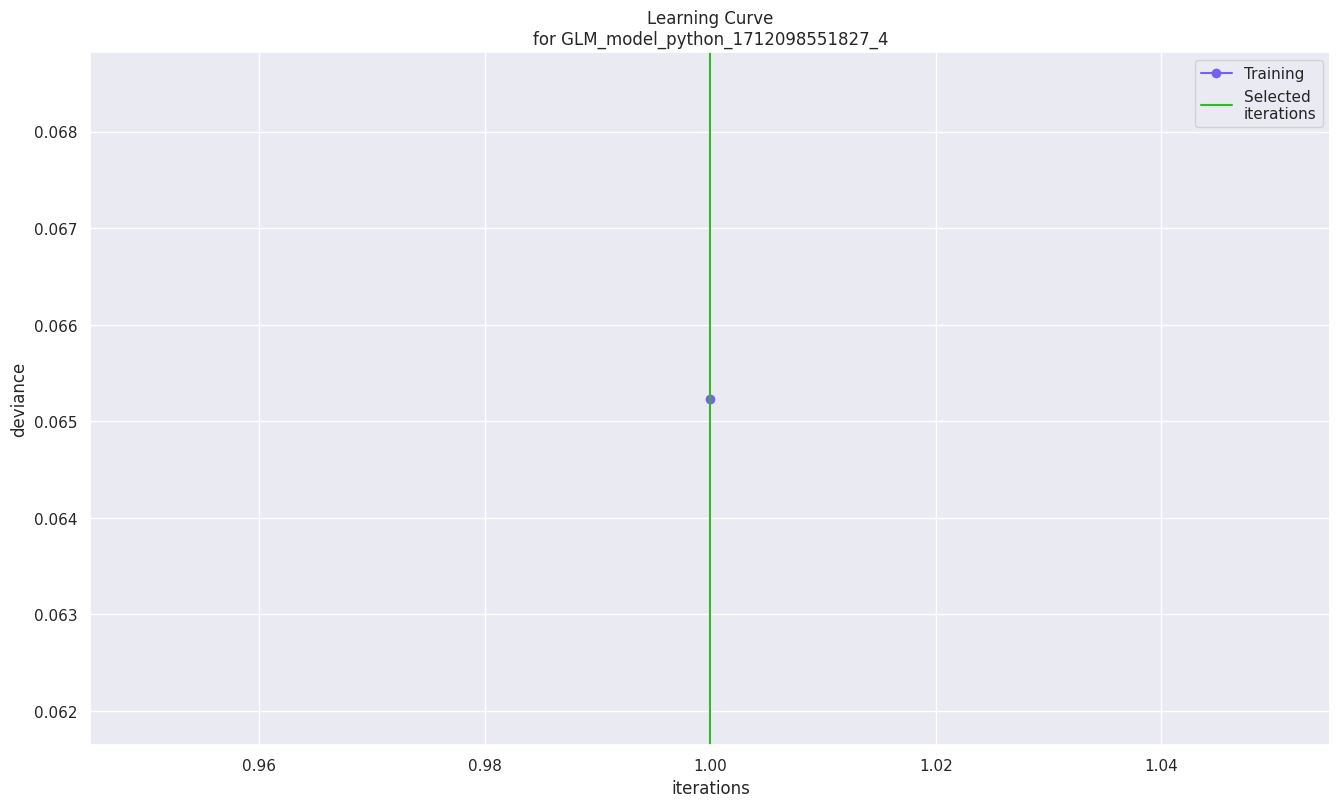

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

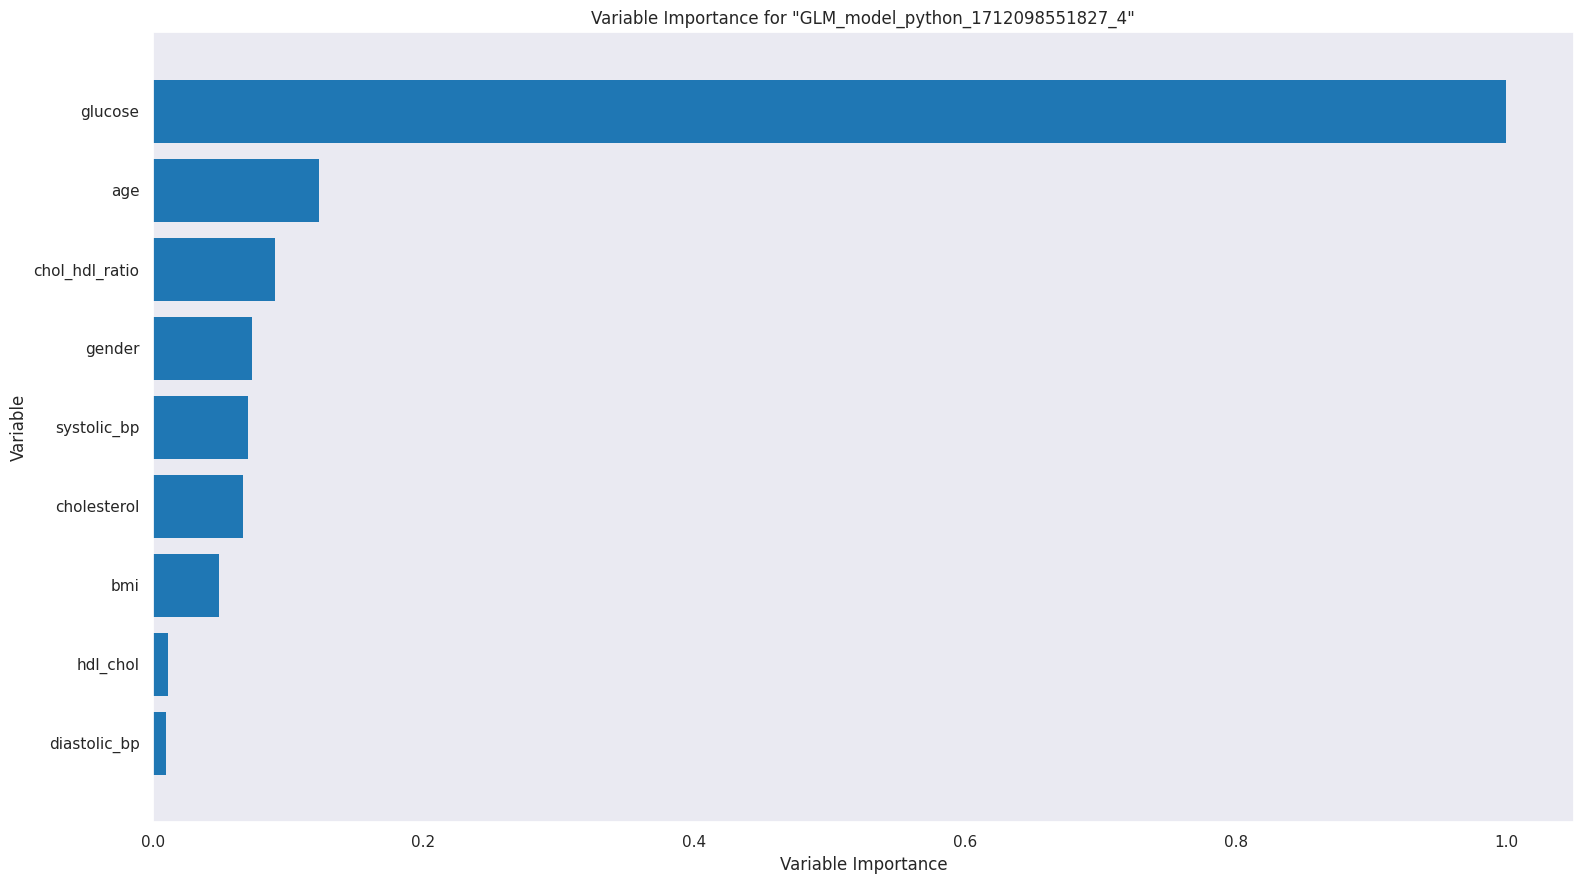

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

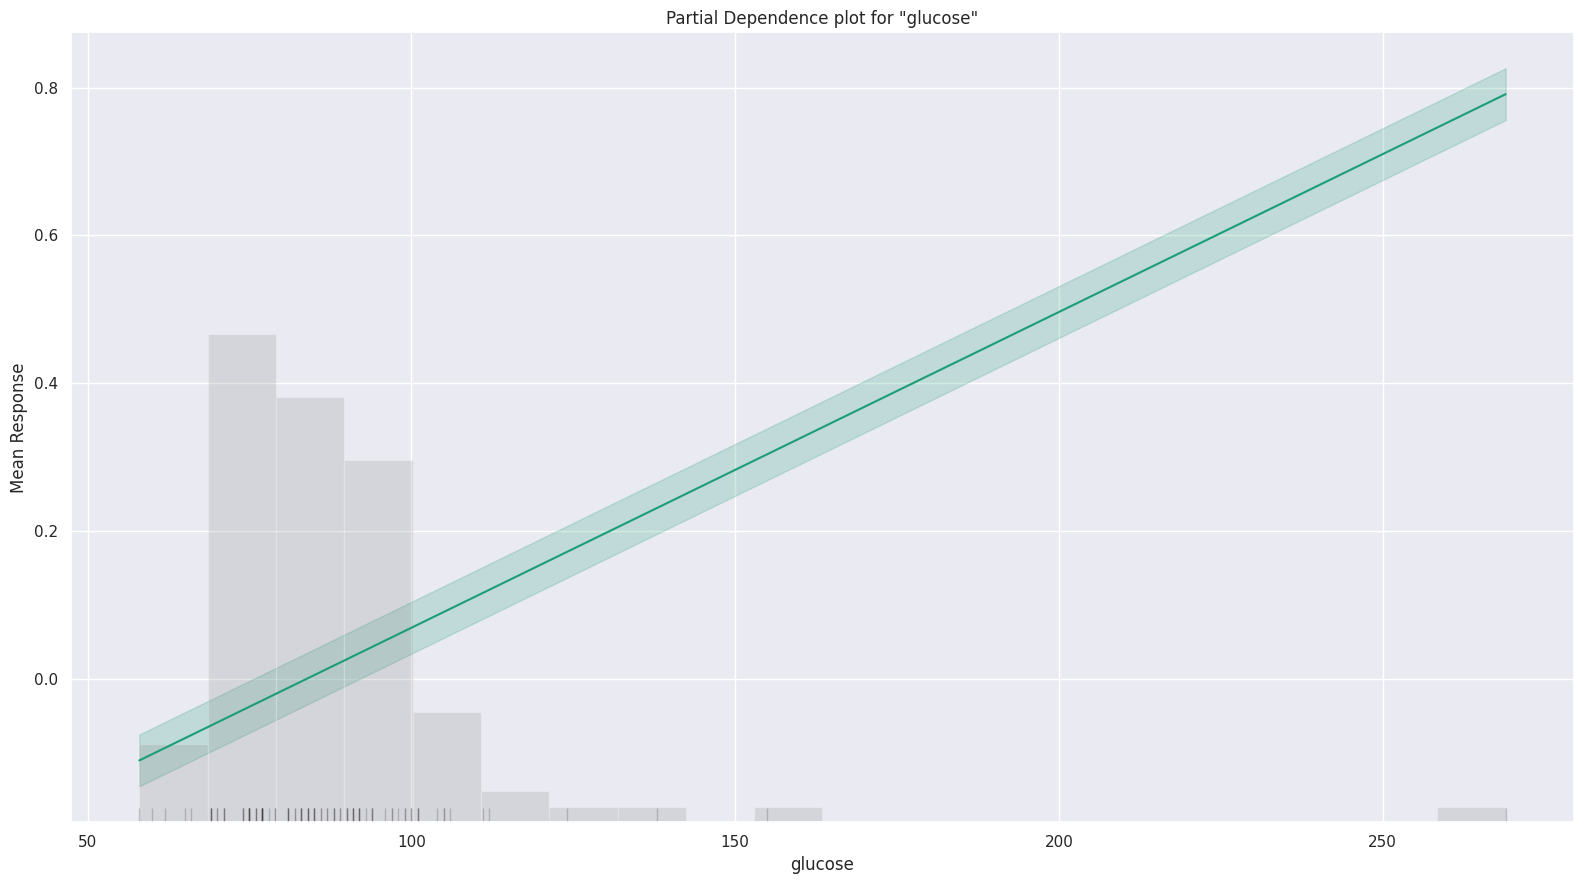

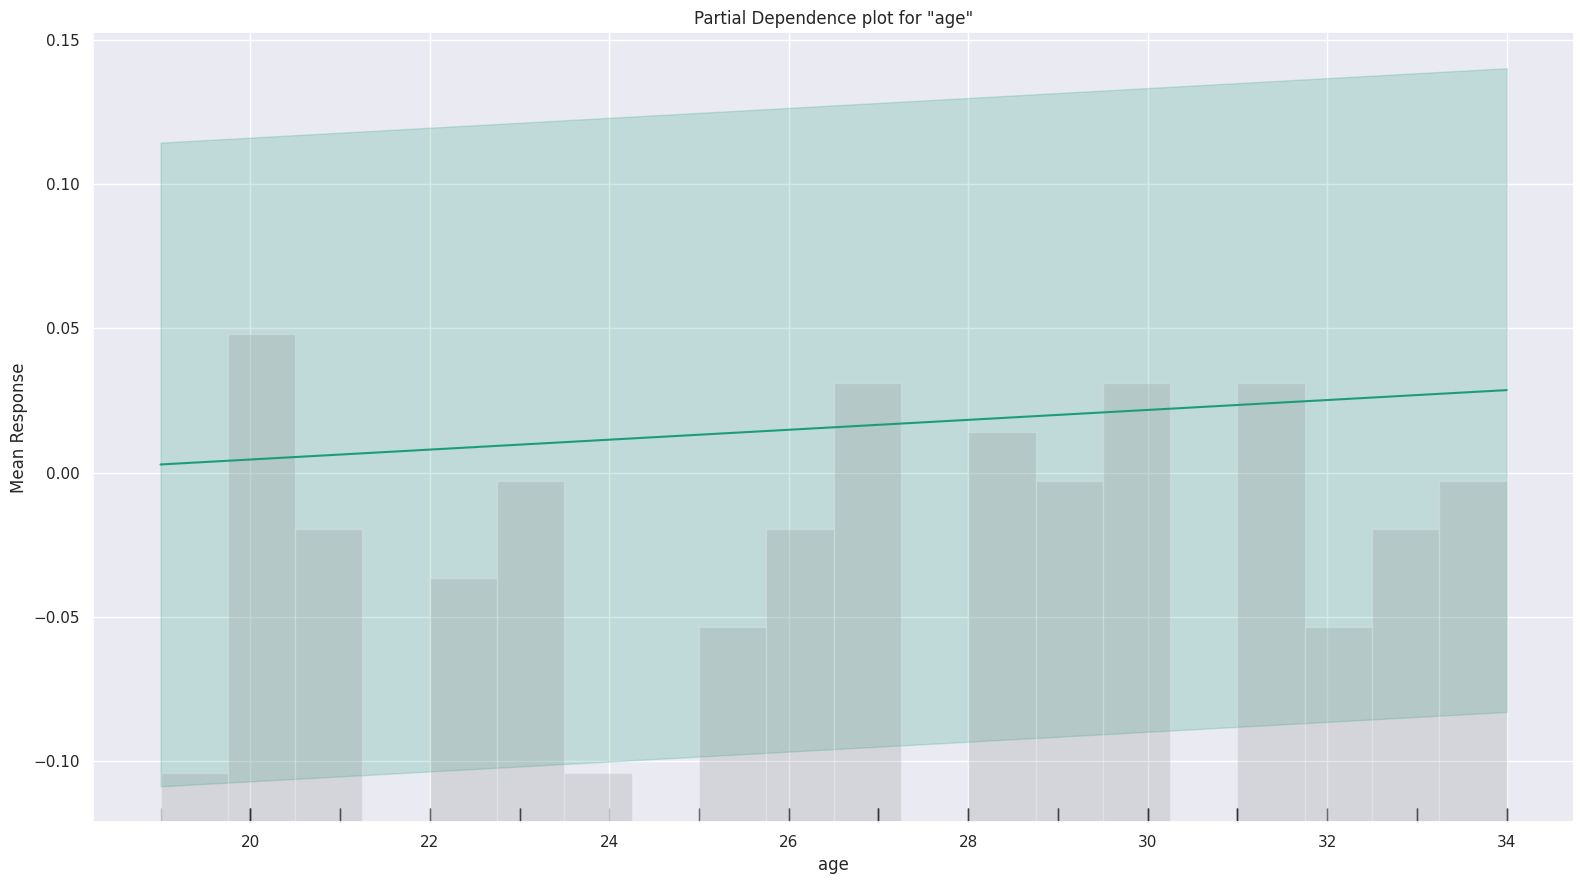

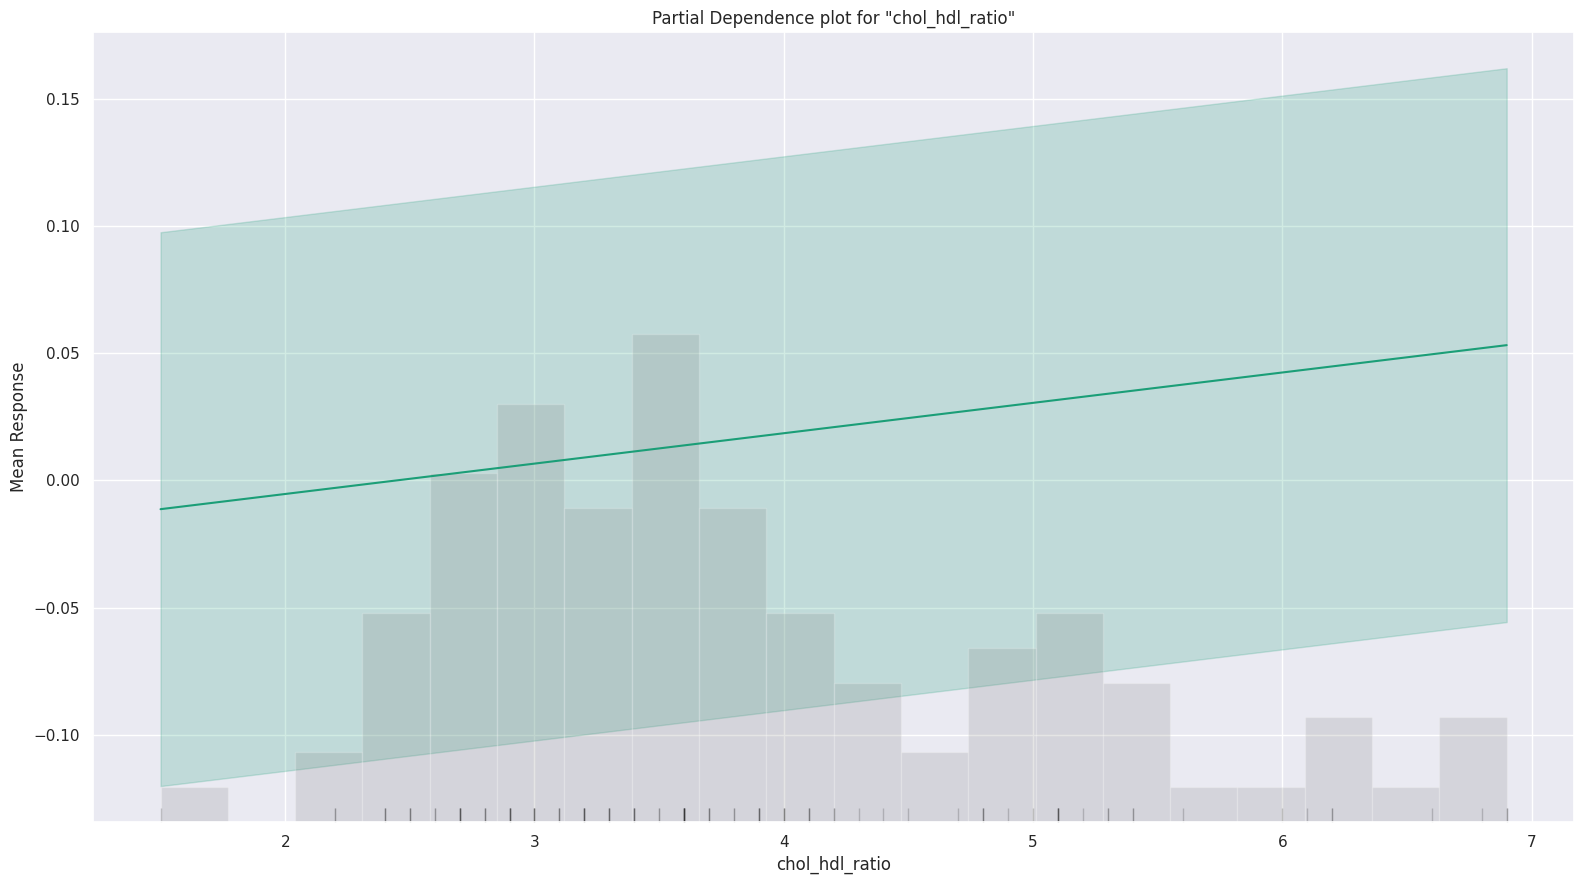

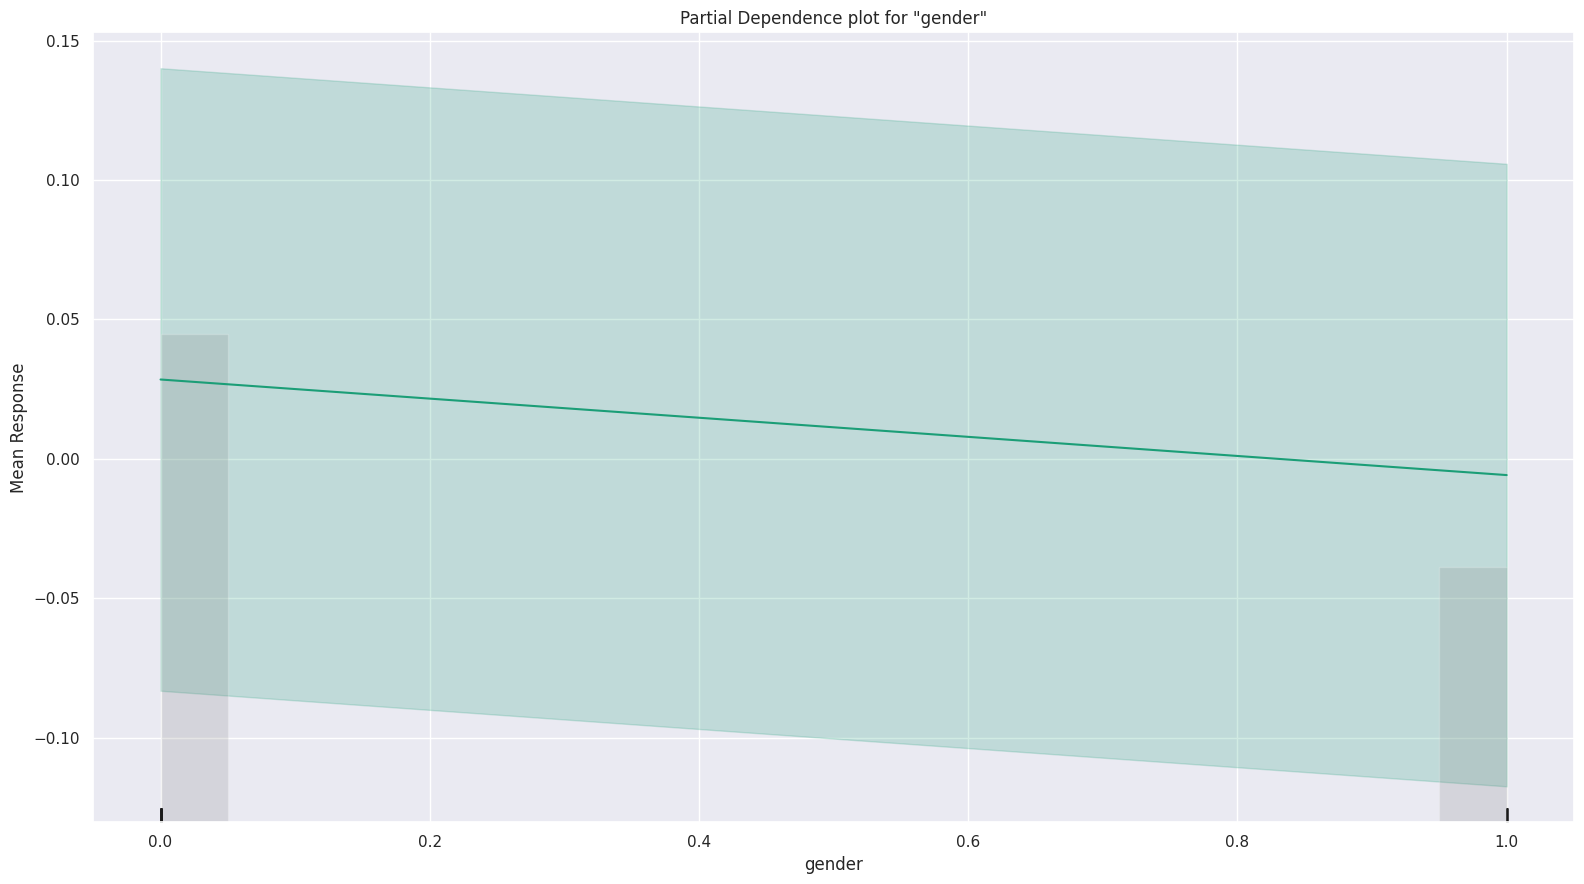

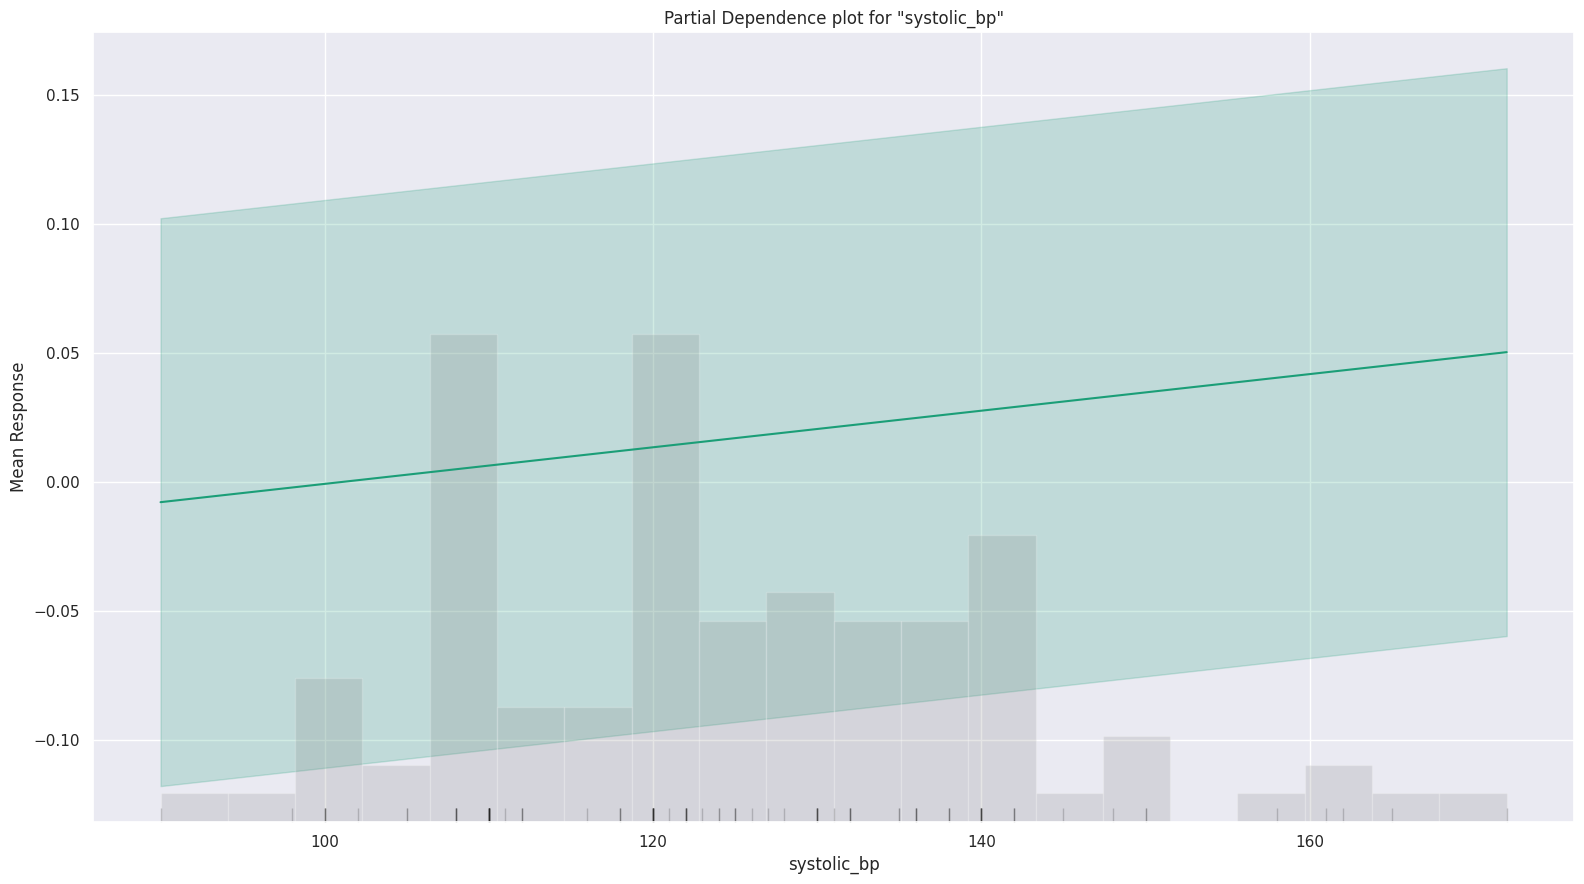

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

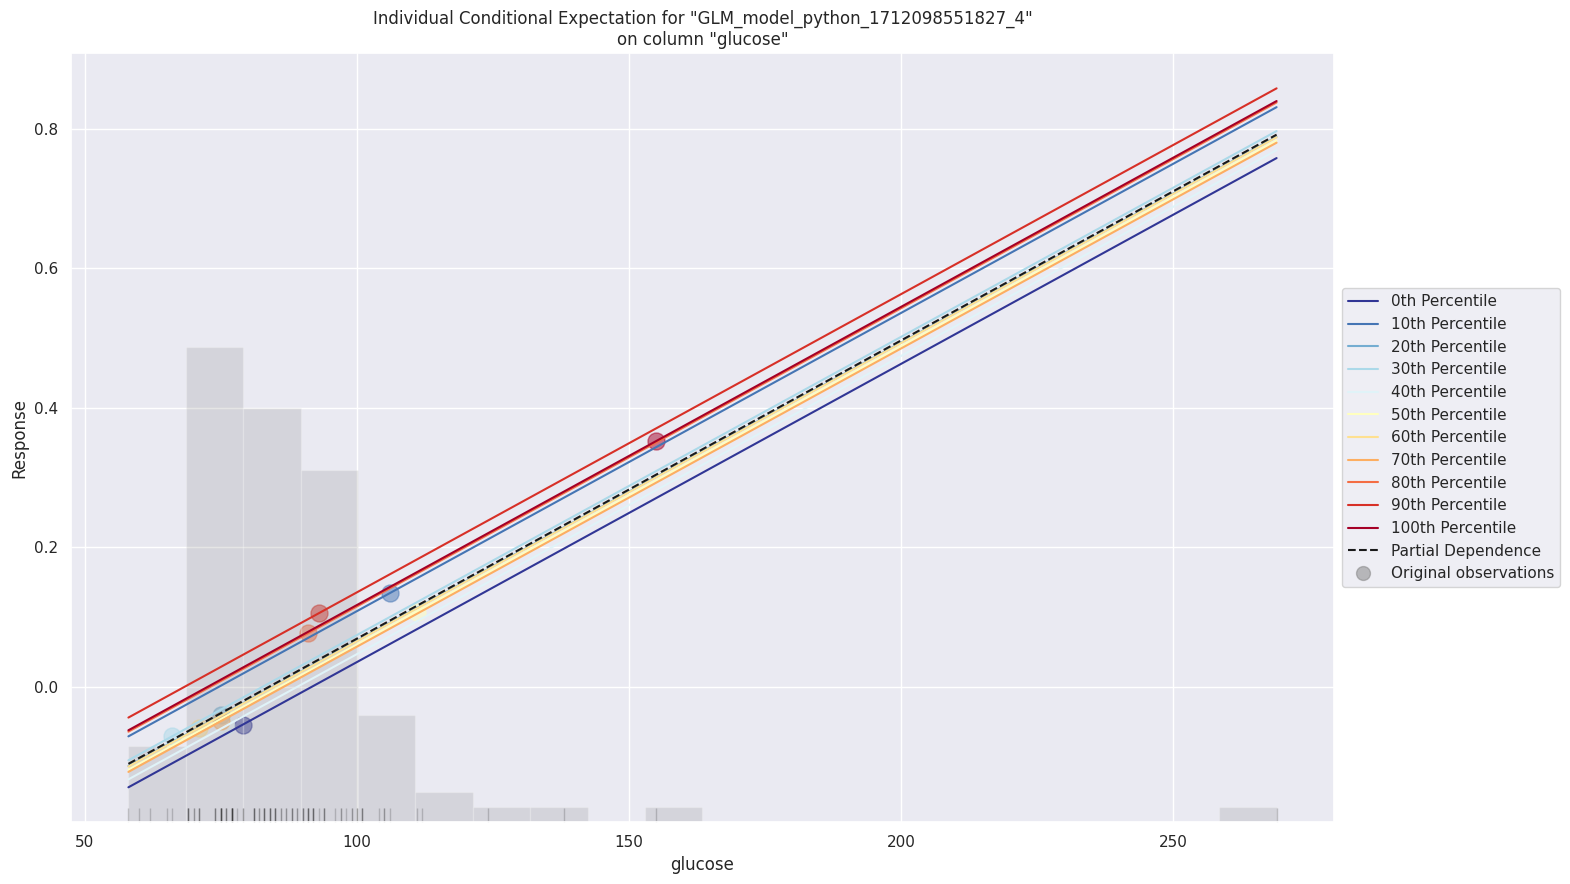

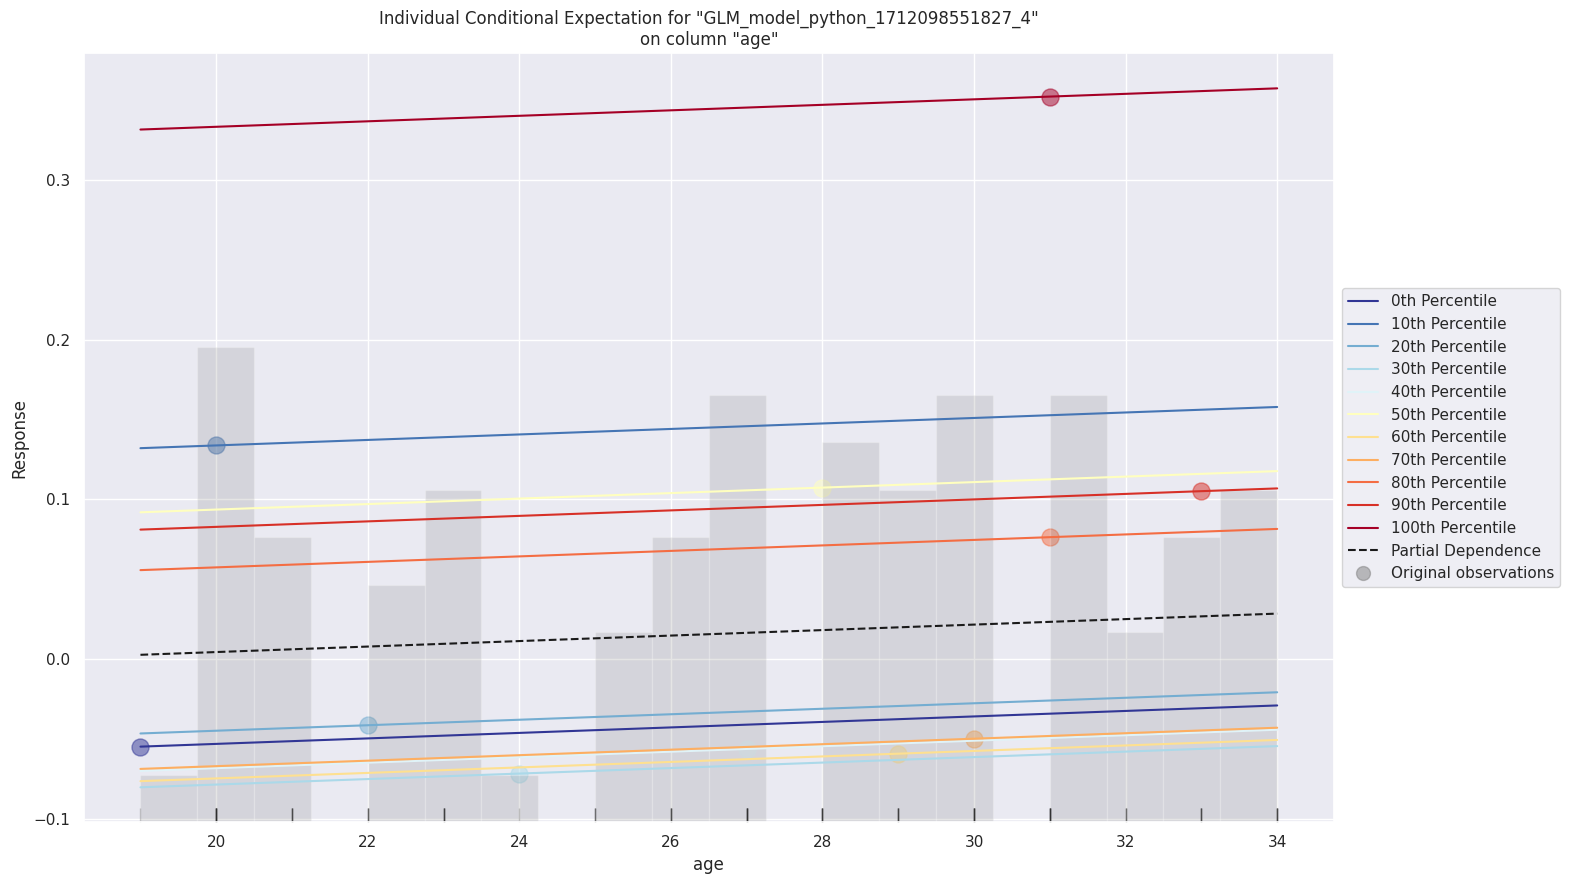

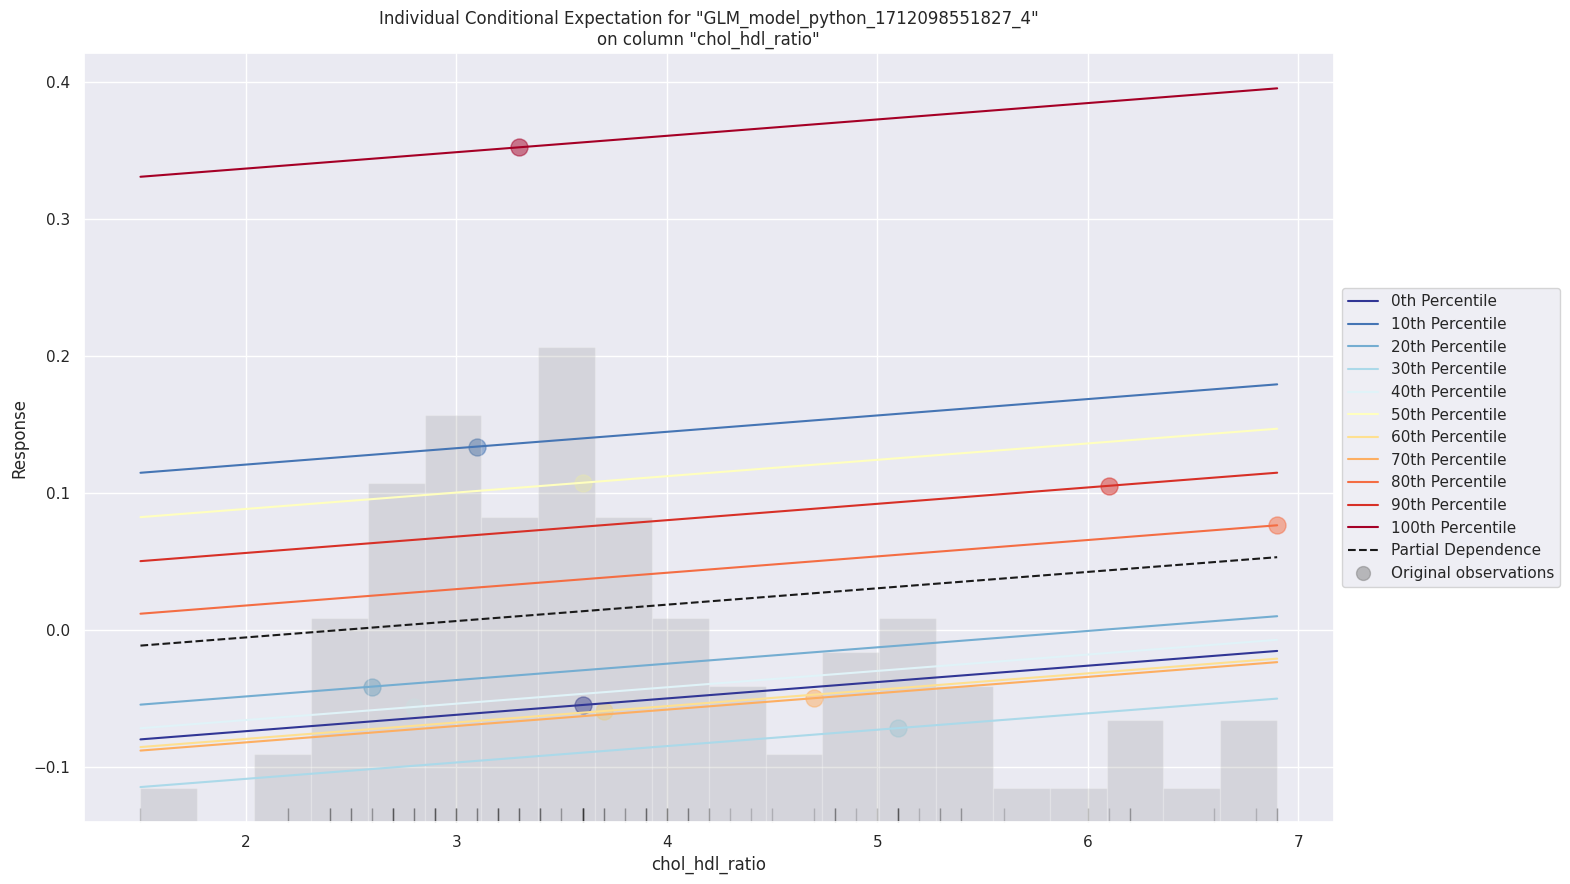

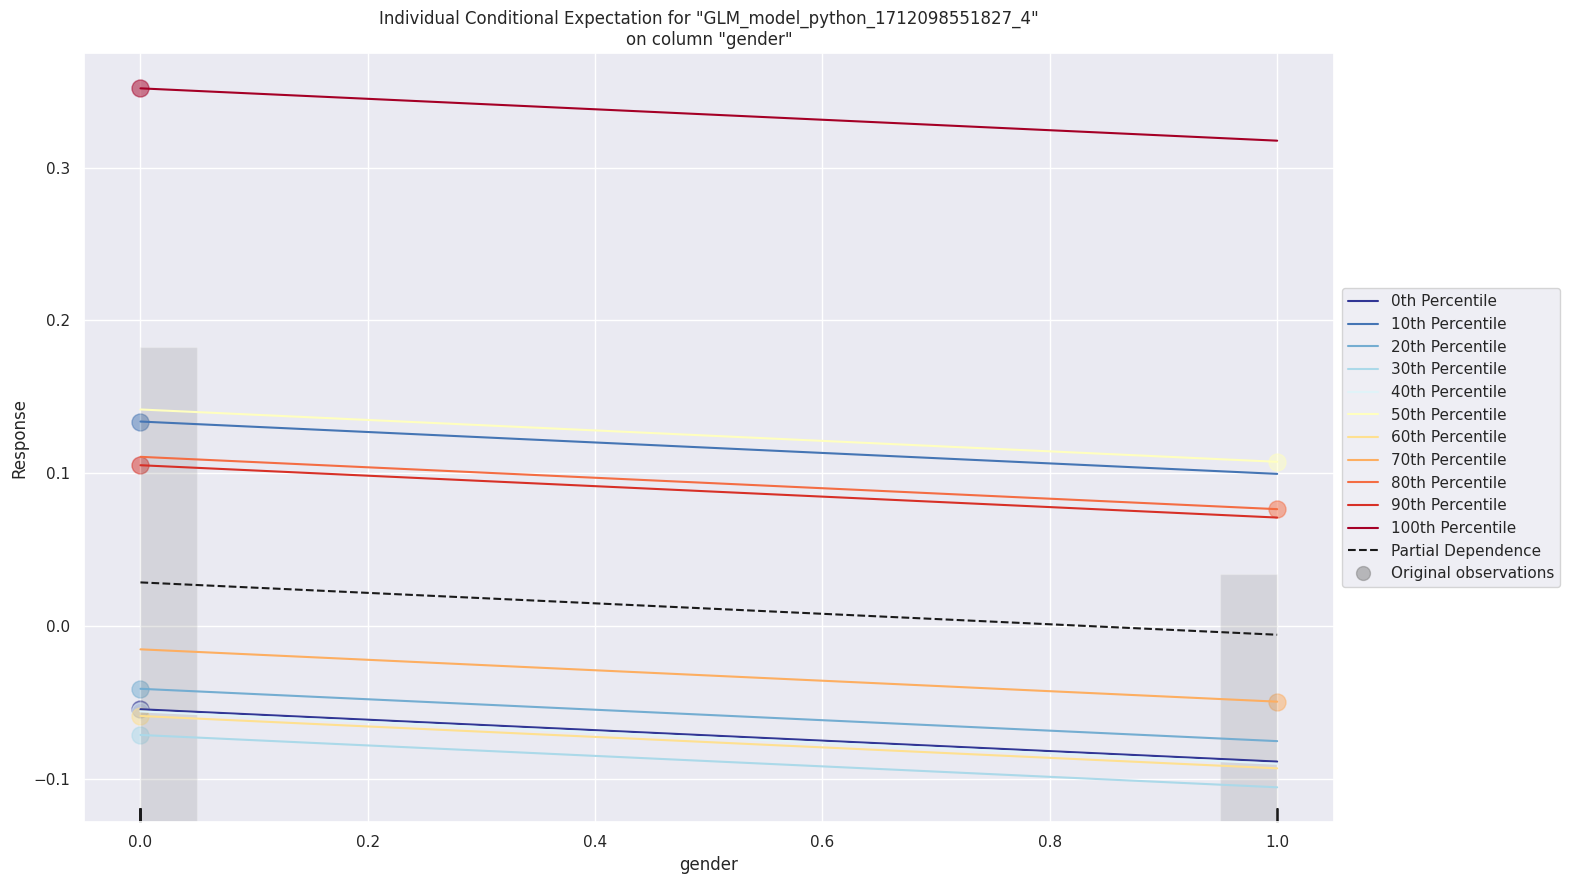

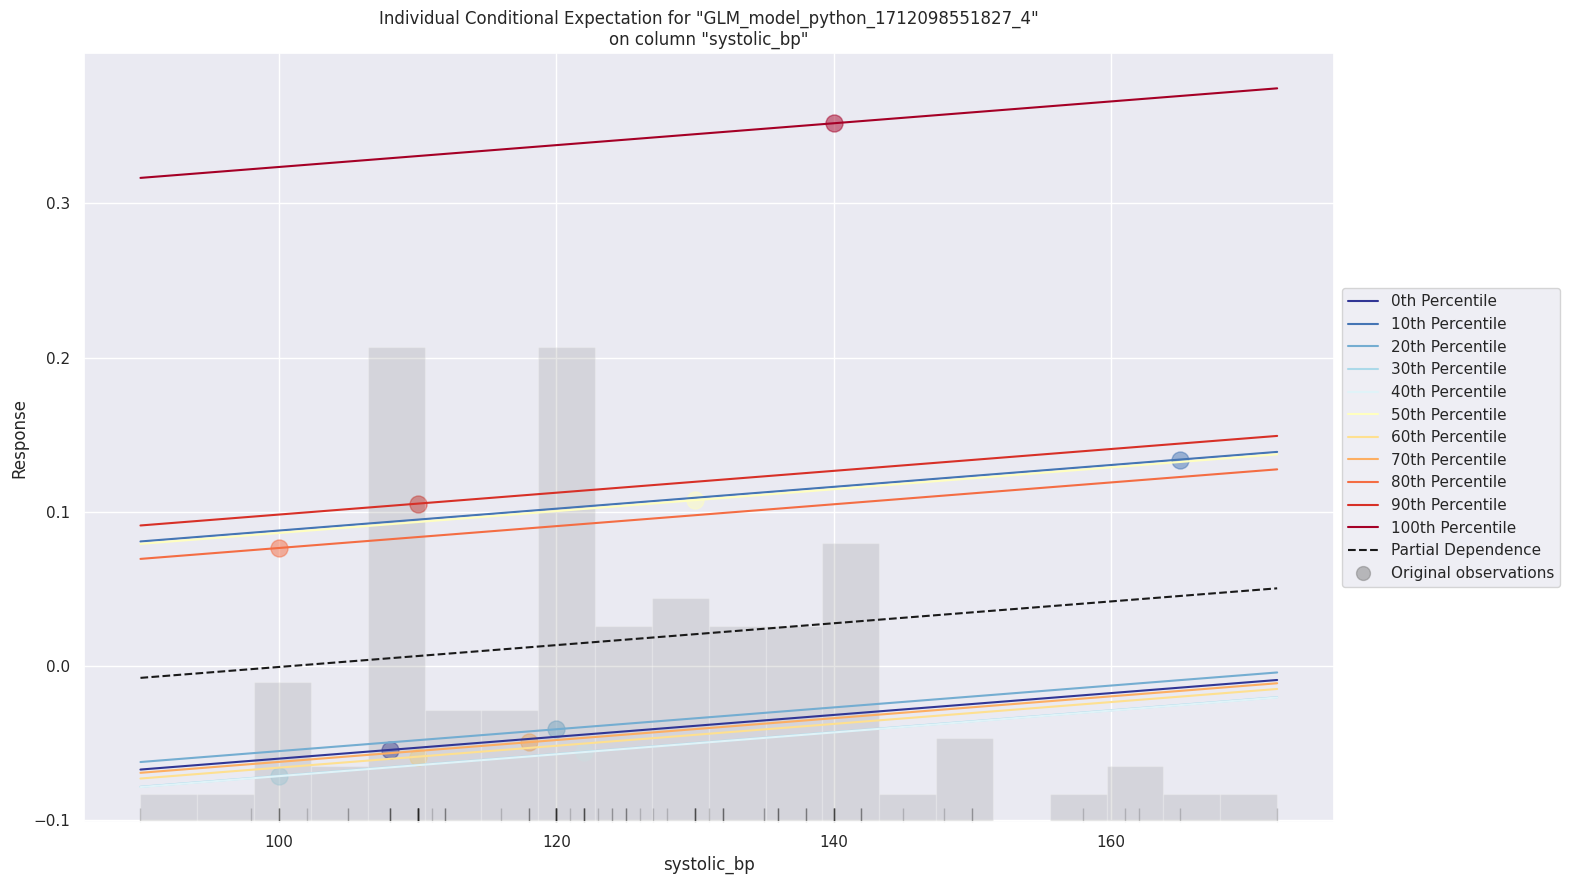

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

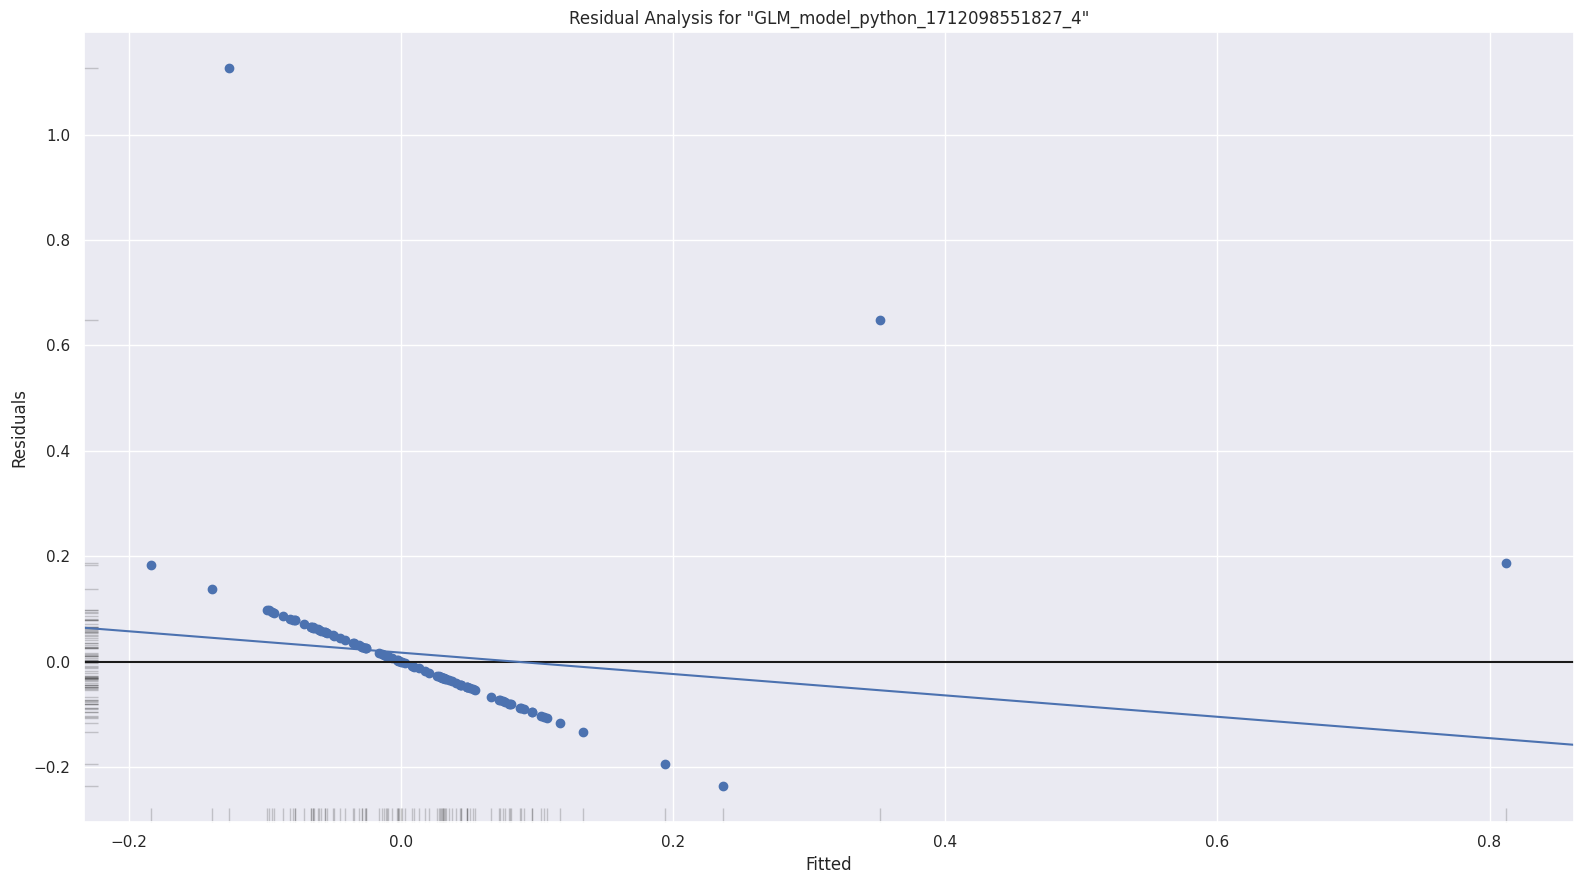

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

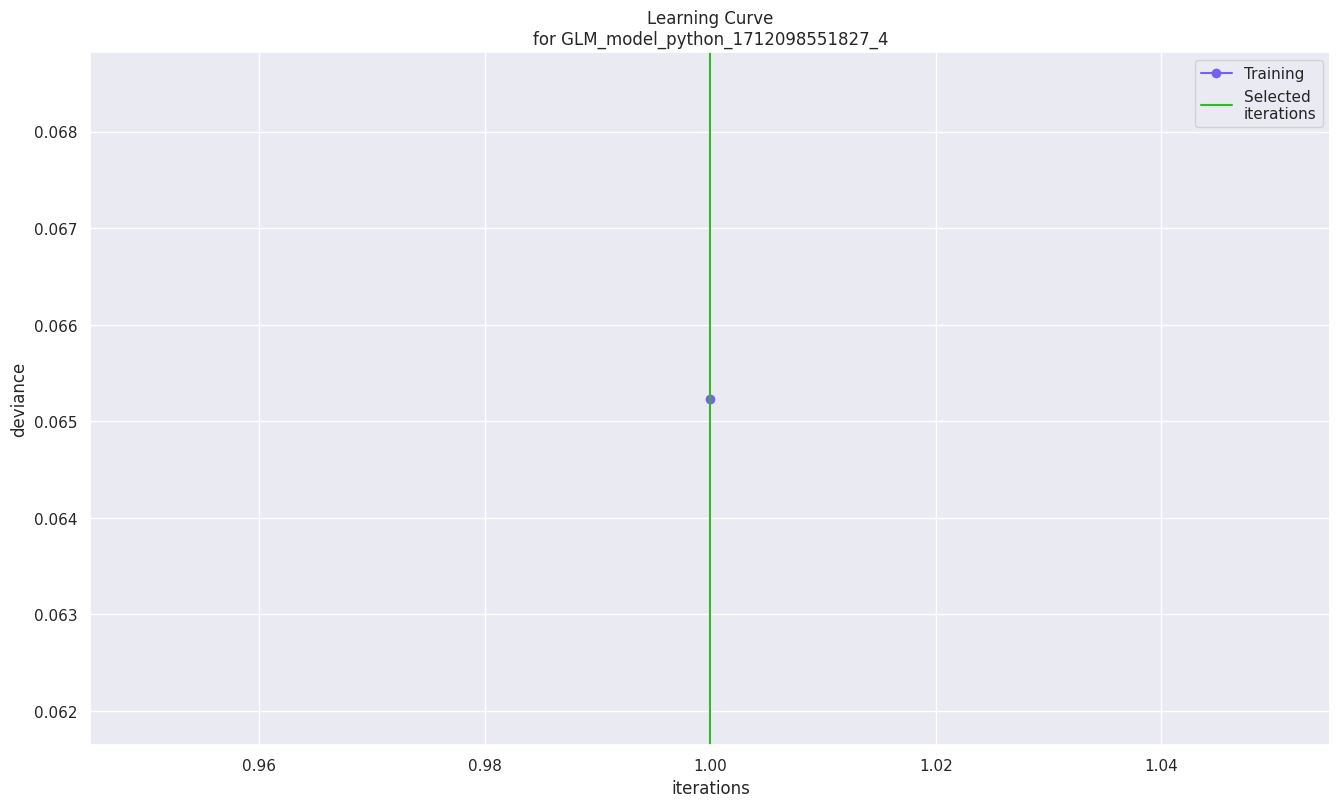

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

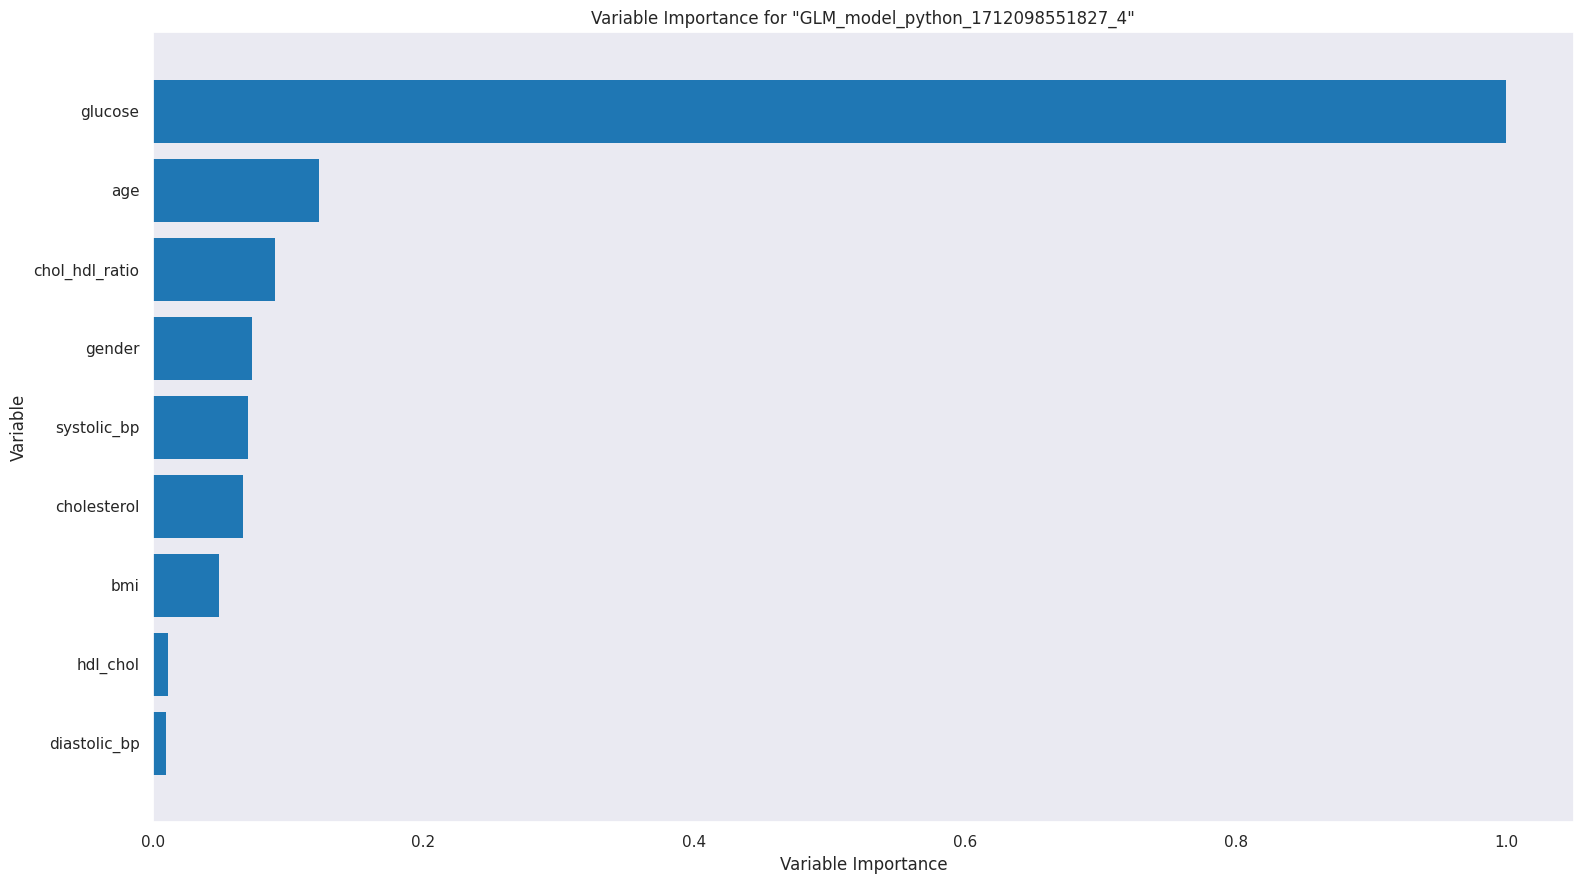

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

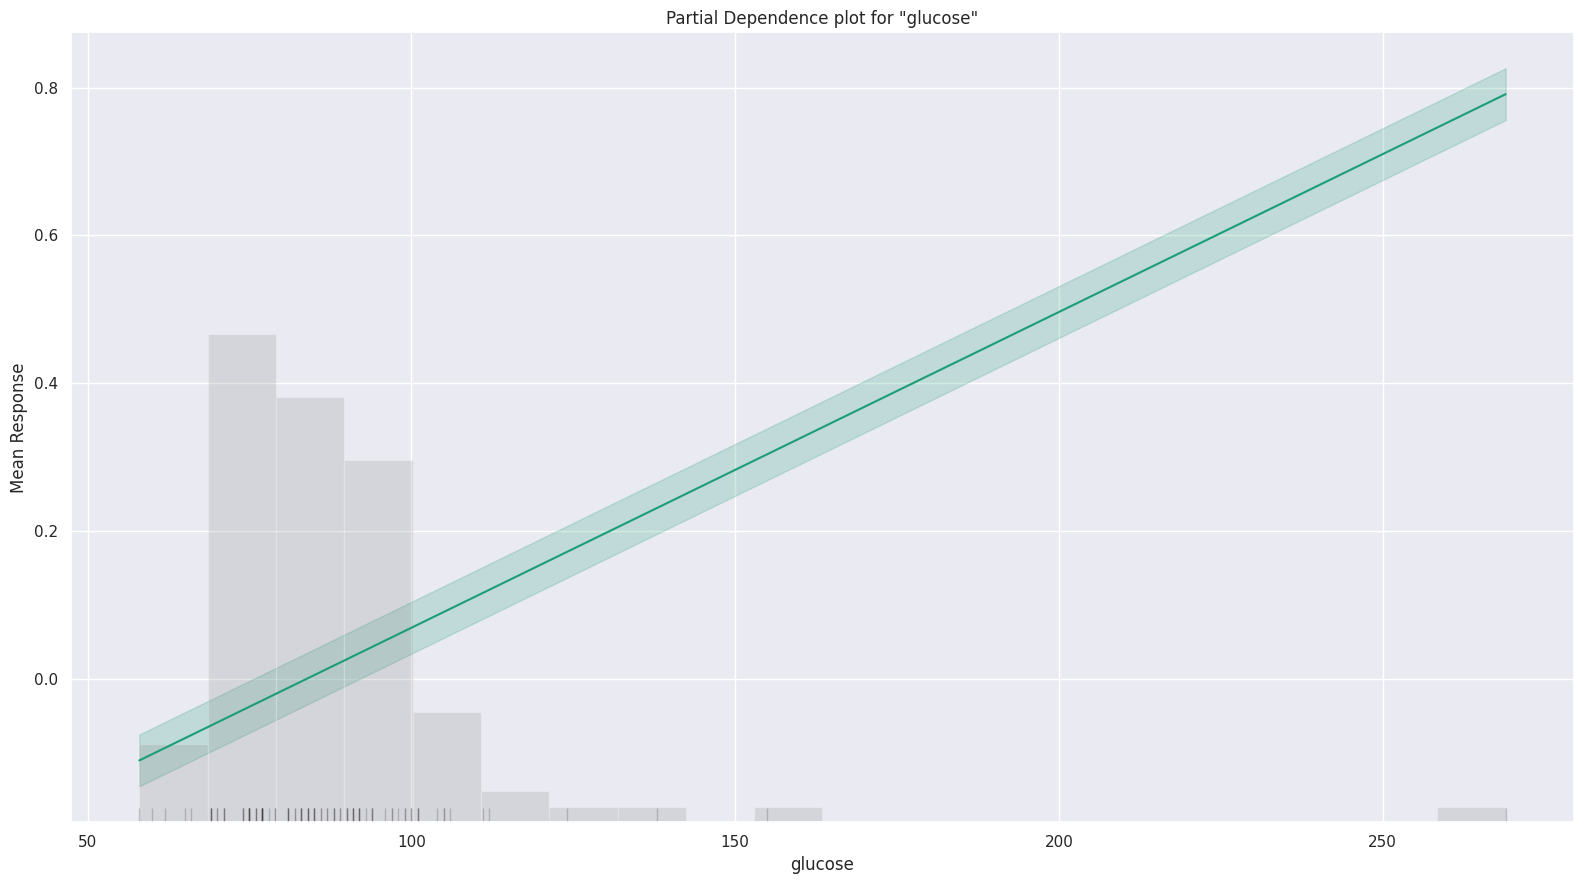

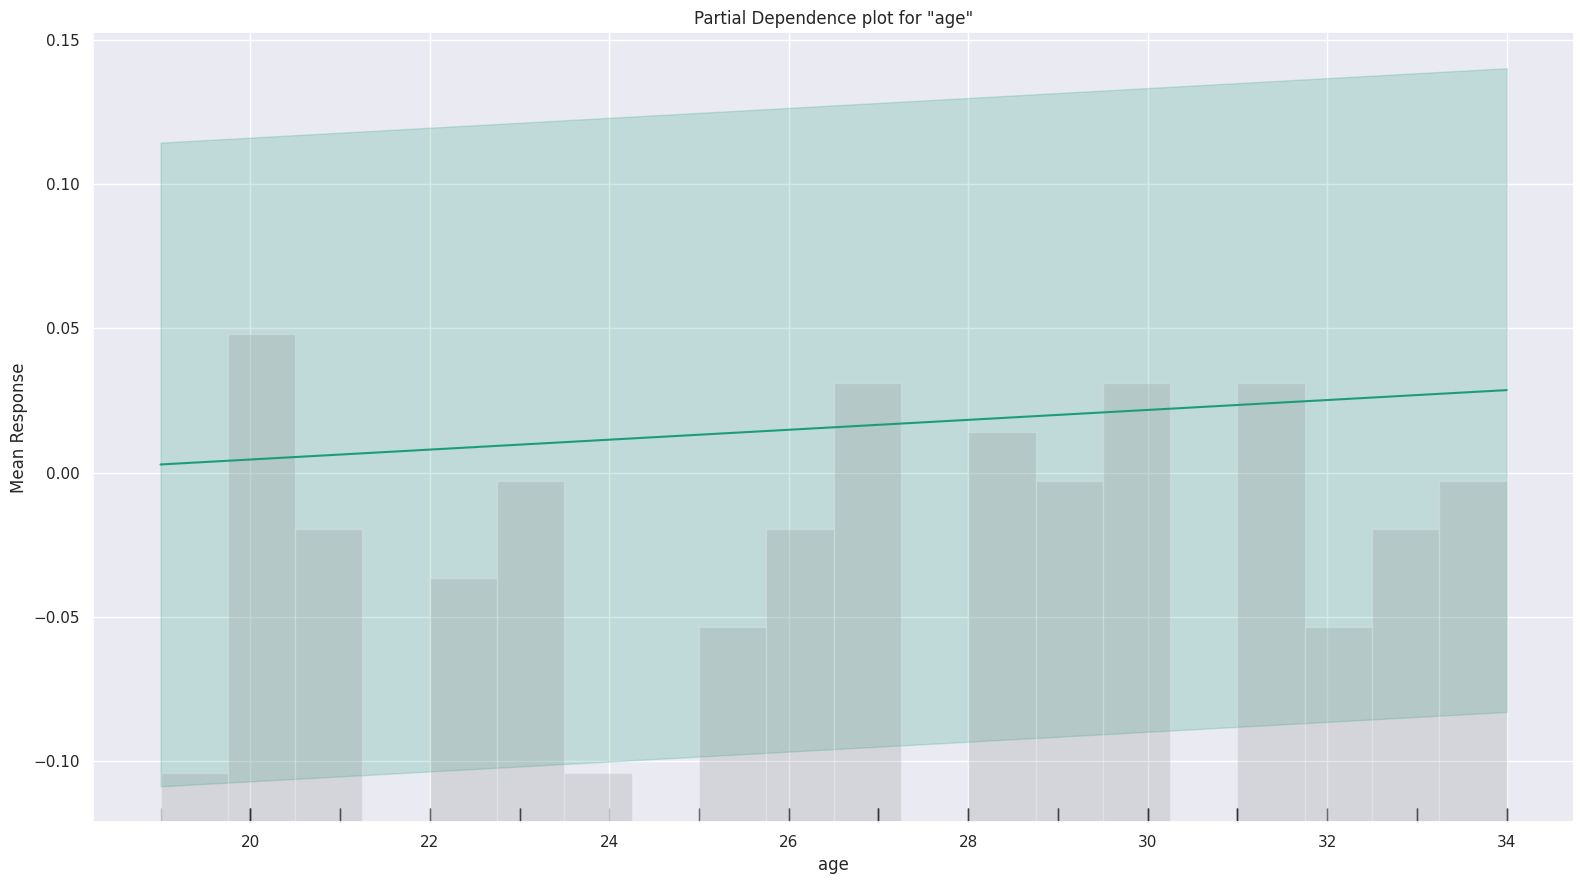

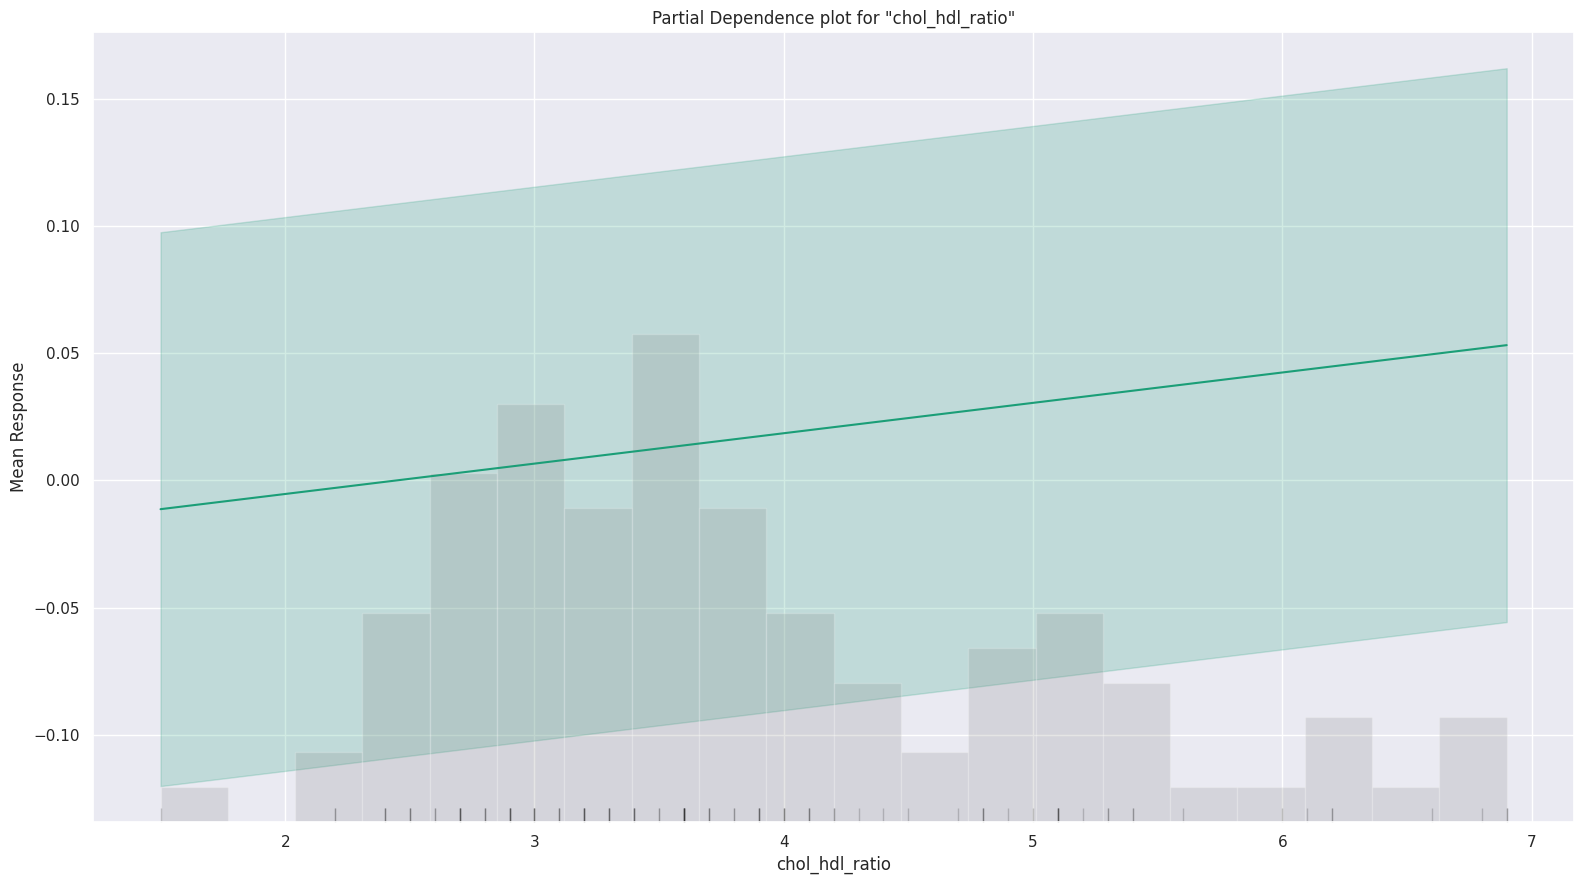

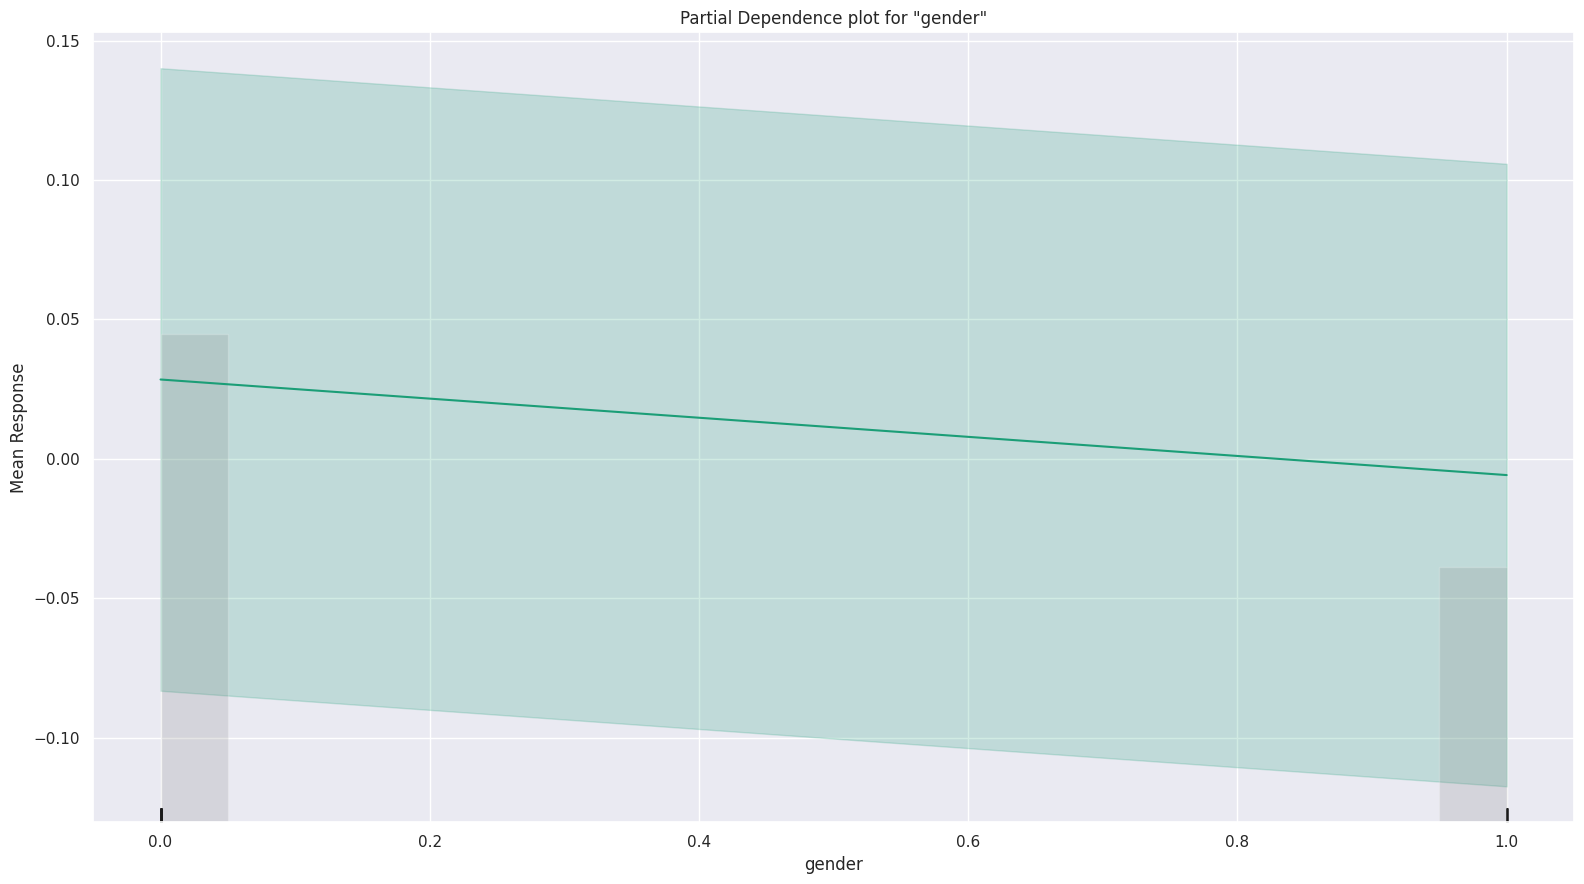

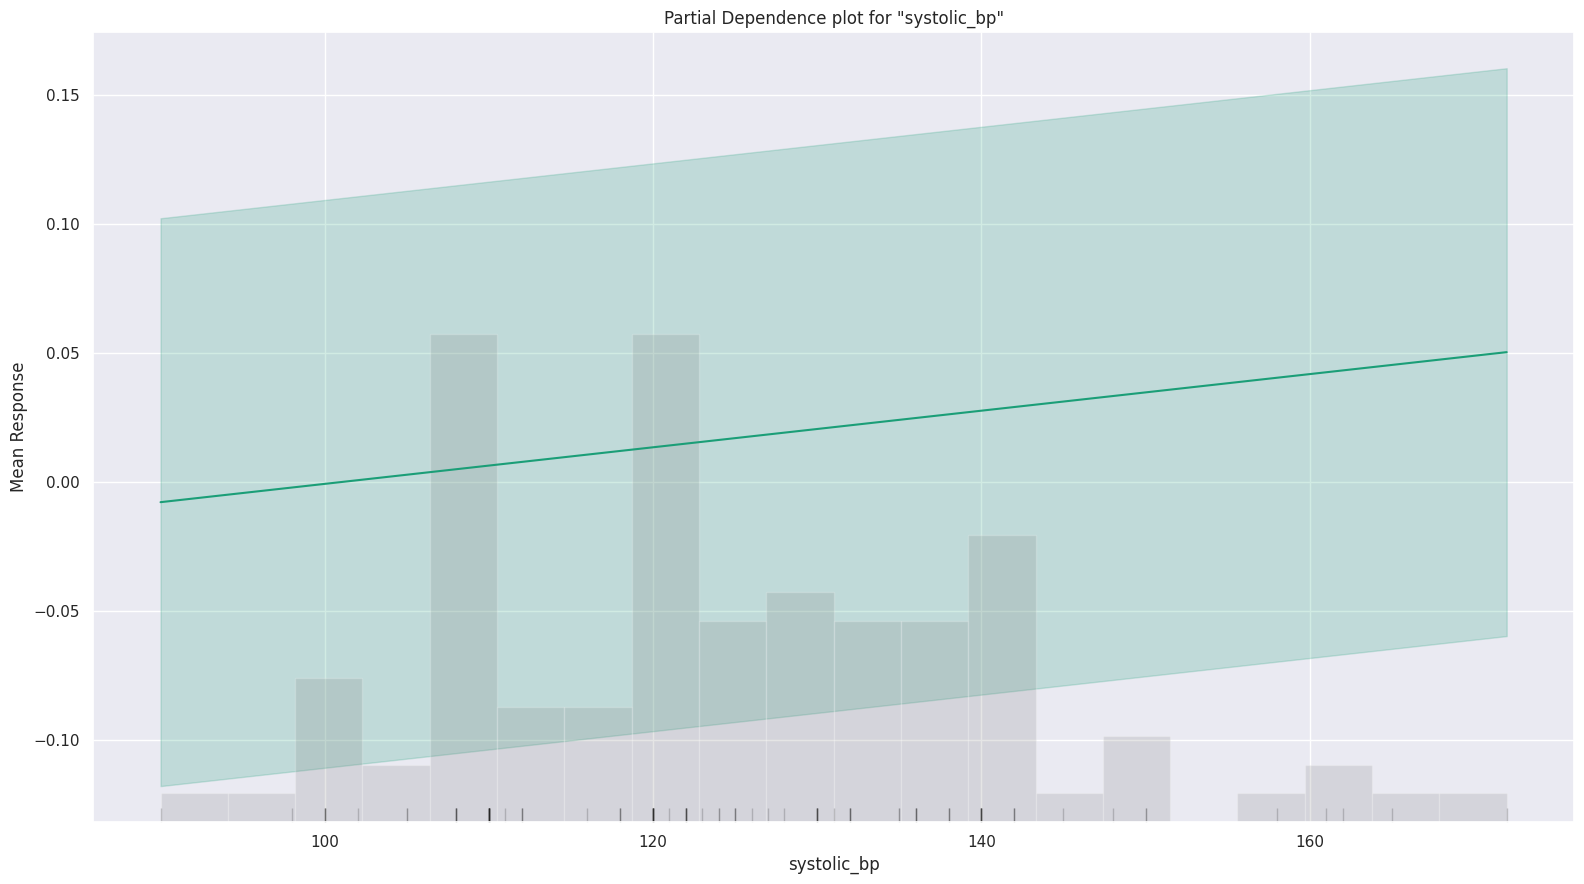

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

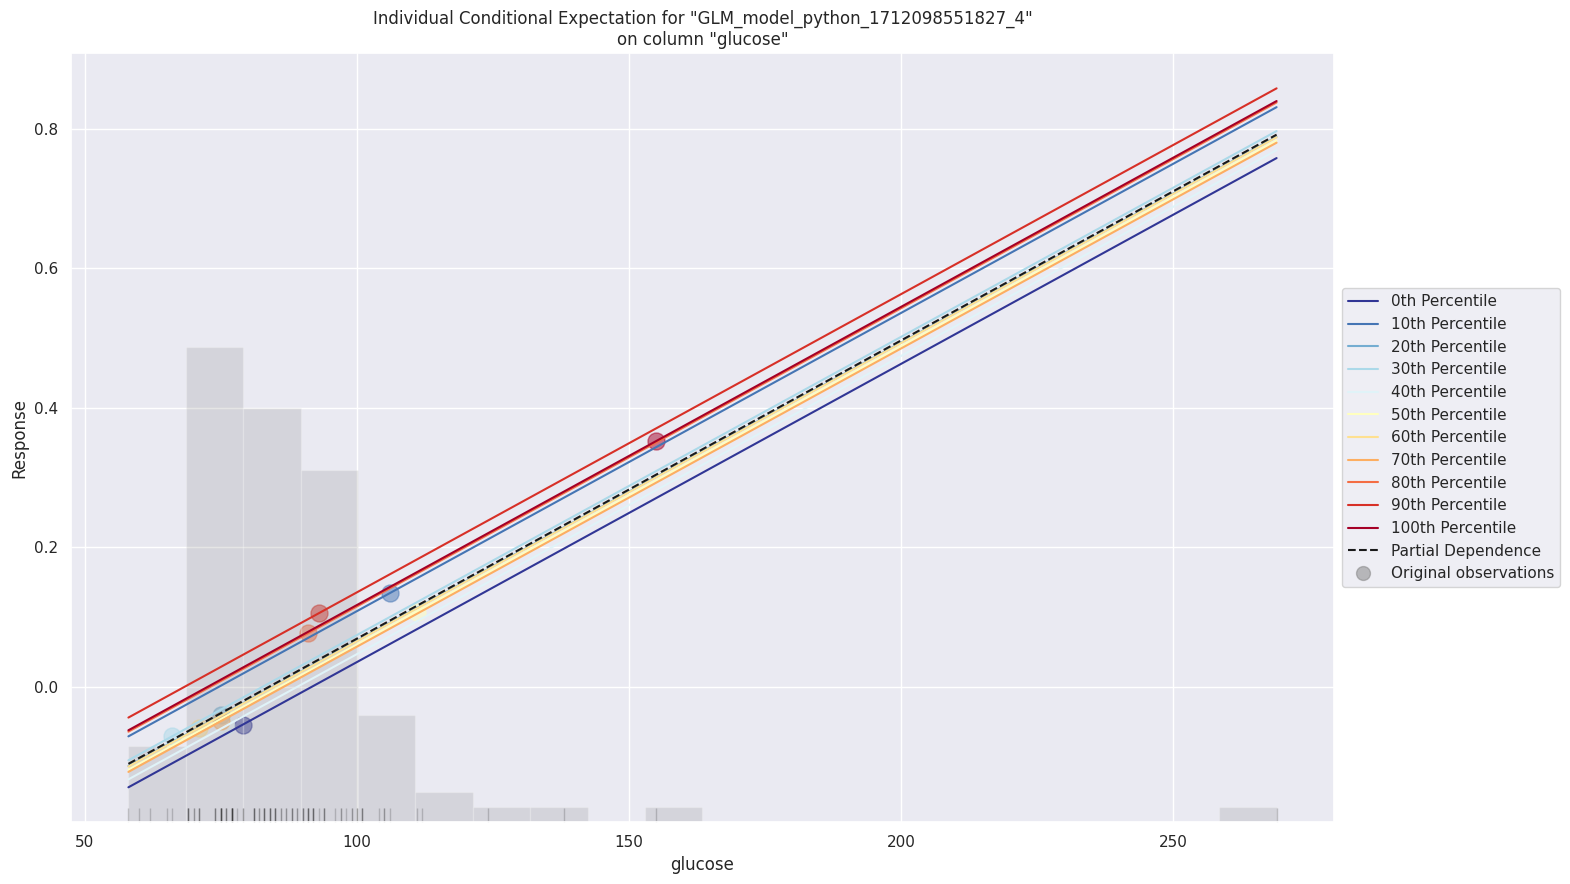

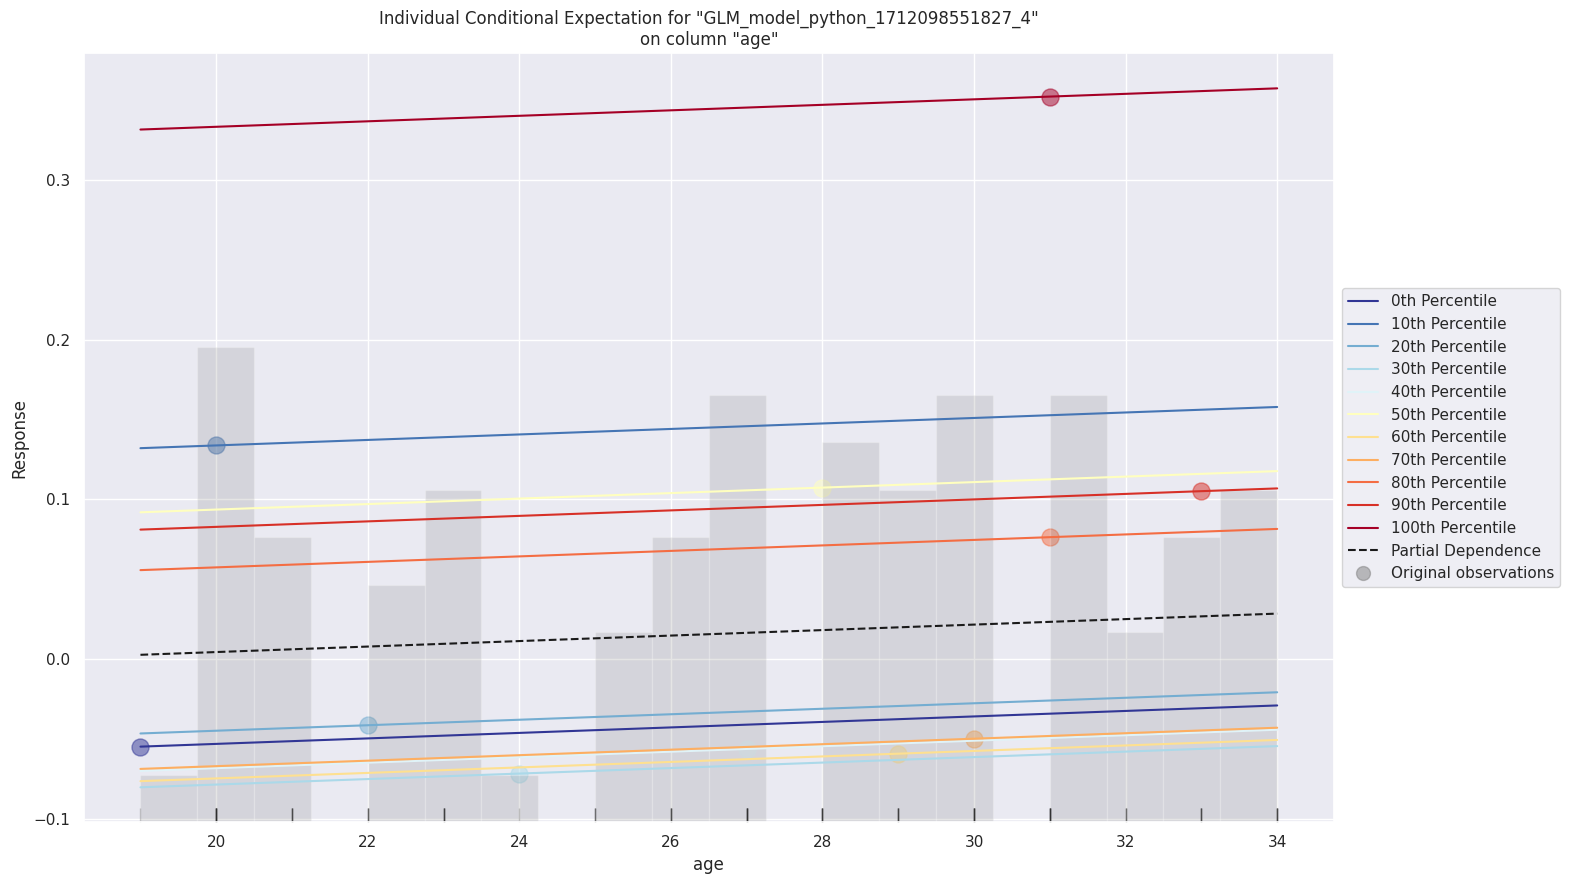

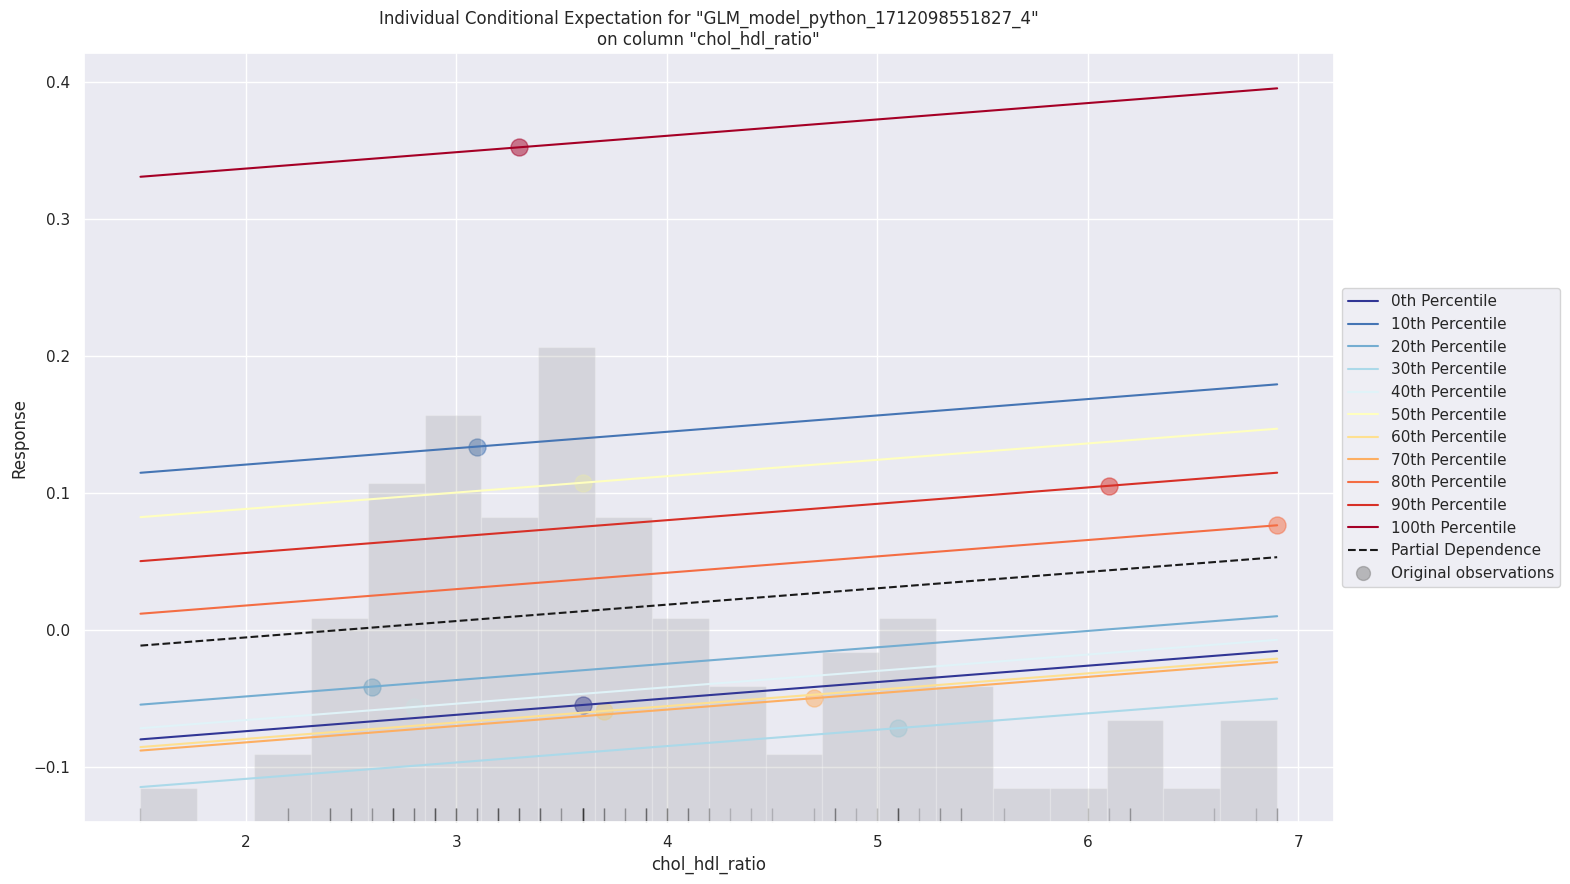

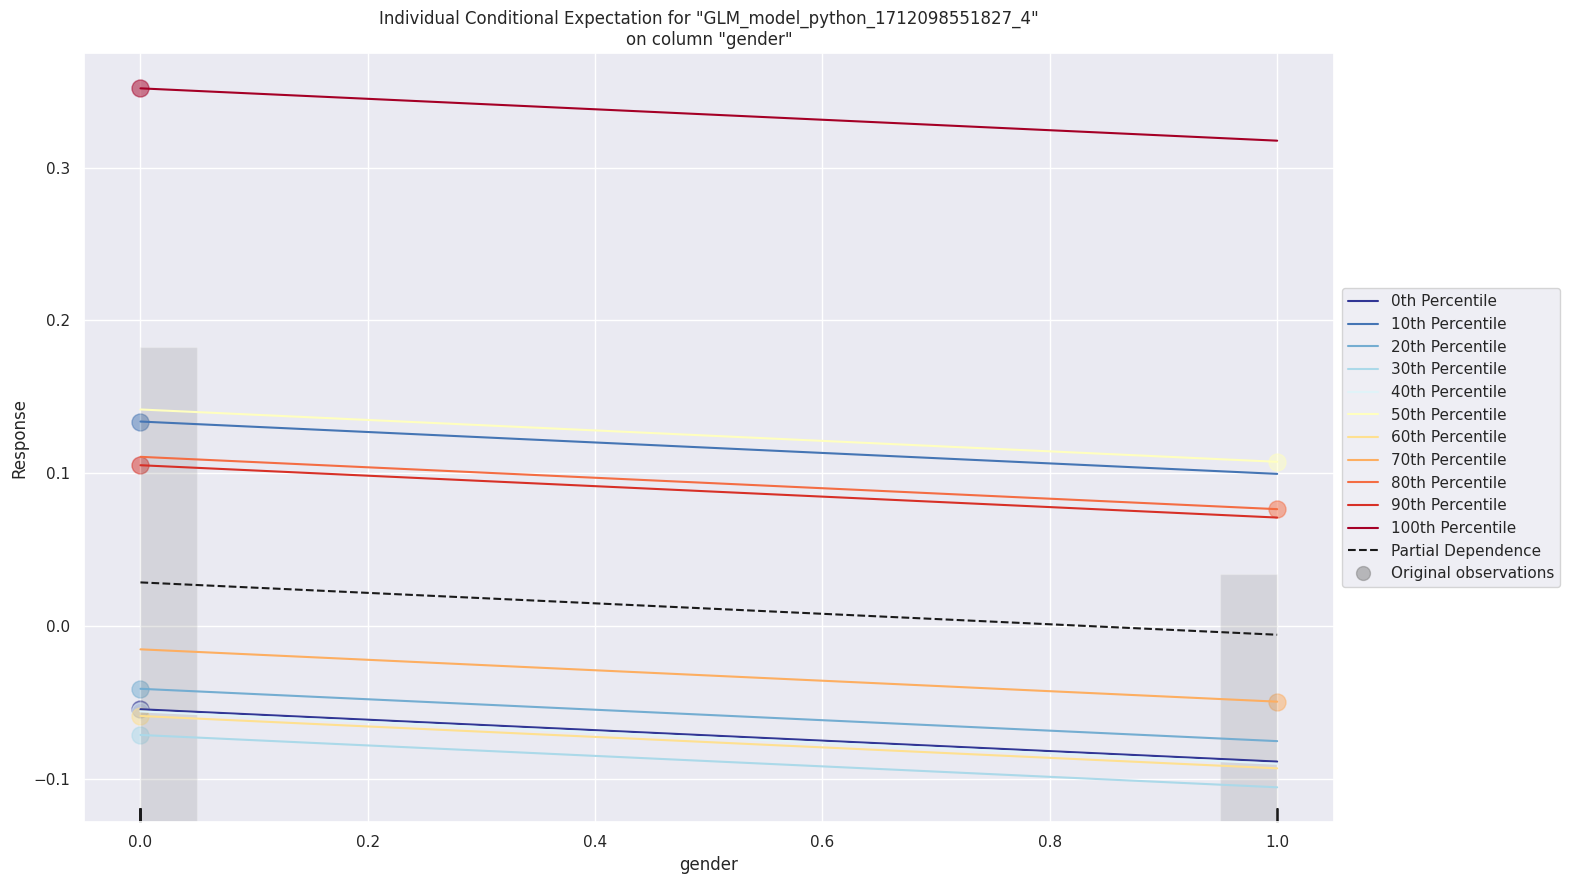

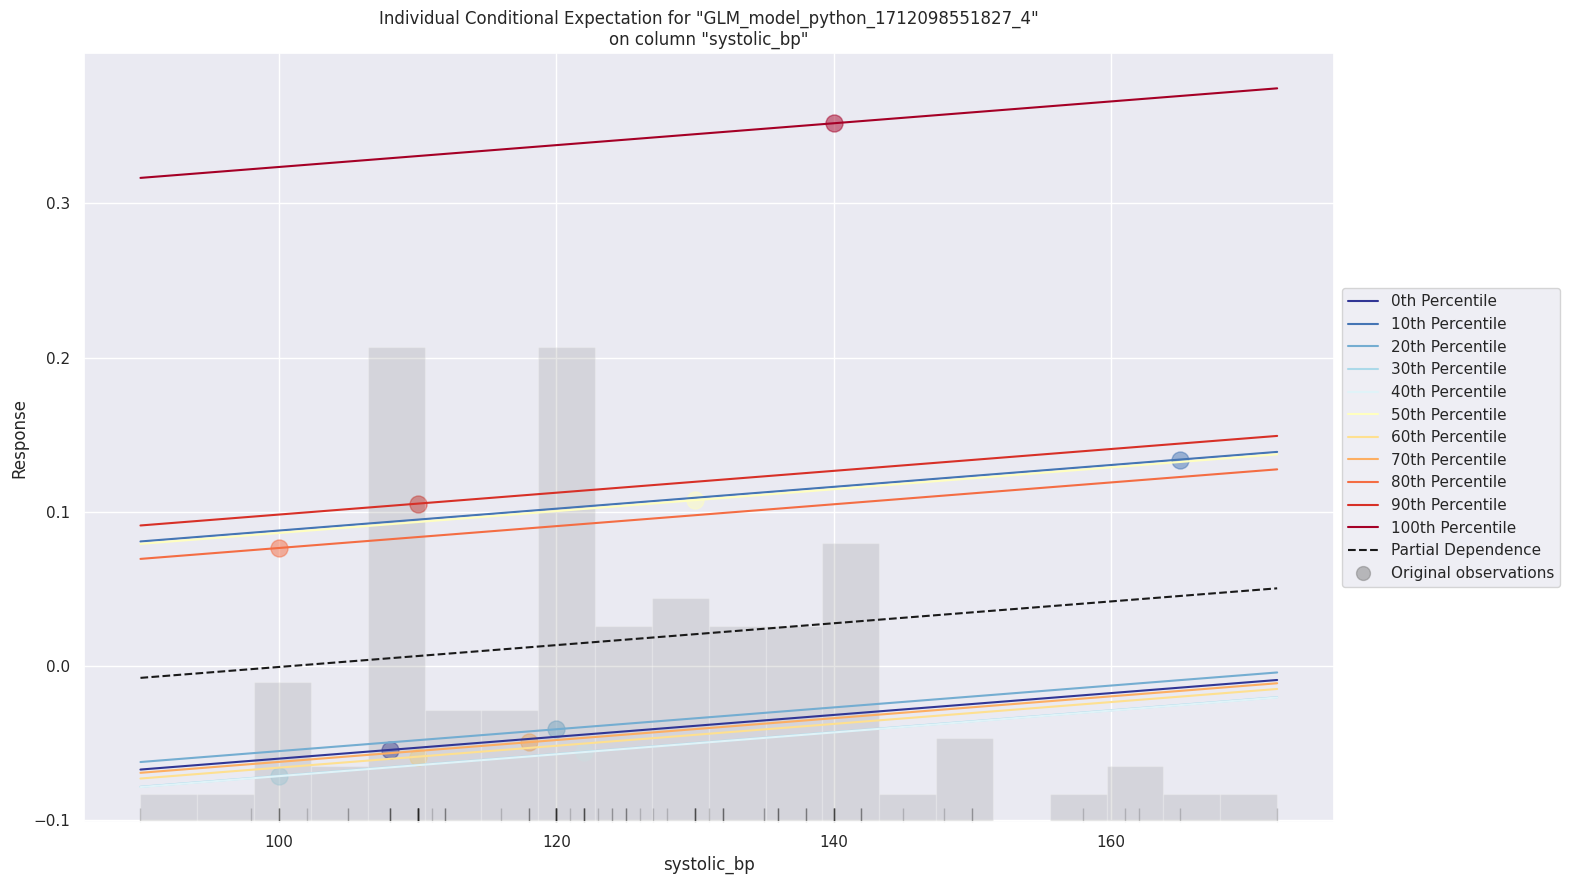

In [63]:
import h2o

# Initialize a H2O cluster
h2o.init()

# Explain the model
data_glm.explain(df_train[1:100,:])

**OBSERVATION**

I employed the H2O.ai AutoML library to develop predictive models to predict diabetes occurrence in patients using data from the National Institute of Diabetes and Digestive and Kidney Diseases. My focus was on identifying significant relationships within the data and building robust multivariate models for analysis. While assuming the data's quality for this phase.
Throughout the process, I examined key aspects such as the significance of relationships, adherence to model assumptions, the presence of multicollinearity, and the independence of predictor variables. Furthermore, I evaluated the influence of regularization and the significance of independent variables and hyperparameters in the models.

The primary goal was to establish an effective  model for predicting  diabetes, with a focus on identifying the most influential factors driving the occurrence of diabetes. Moving forward, I aim to prioritize comprehensive data cleaning and feature engineering to ensure the models accurately reflect the underlying data patterns, providing reliable insights for predicting diabetes

##**Hyperparameter tuning**

In [64]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OXGBoostEstimator

# Start the H2O cluster (or connect to it if it is already running)
h2o.init()

# Import the dataset into H2O
df_h2o = h2o.import_file("https://raw.githubusercontent.com/ronakmishra619/Data_Science_Assignment/main/diabetes.csv")

# Assuming the target variable is named 'Outcome' based on common practice with diabetes datasets
# All other columns will be used as predictors
predictors = df_h2o.columns[:-1]  # All columns except the last one as predictors
response = df_h2o.columns[-1]  # The last column as the response variable

# Split the H2O DataFrame into a train and test set
train, test = df_h2o.split_frame(ratios=[.8], seed=1234)

# Define the hyperparameter grid
hyperparameters = {
    'ntrees': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learn_rate': [0.01, 0.1, 0.2]
}

# Define the model
xgb_model = H2OXGBoostEstimator()

# Create and train the grid search model
grid = H2OGridSearch(model=xgb_model, hyper_params=hyperparameters)
grid.train(x=predictors, y=response, training_frame=train)

# Get the best model based on a specified metric (e.g., AUC)
best_model = grid.get_grid(sort_by='auc', decreasing=True).models[0]

# Make predictions with the best model on the test set
predictions = best_model.predict(test)

# Evaluate the model's performance
performance = best_model.model_performance(test)
print("Best Model Performance on Test Set:")
print(performance)




Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 25 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_yvap6i
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.167 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Best Model Performance on Test Set:
ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.09923441764359428
RMSE: 0.3150149482859413
LogLoss: 0.36410918885283766
Mean Per-Class Error: 0.13448275862068965
AUC: 0.9172413793103449
AUCPR: 0.9756024635194215
Gini: 0.8344827586206898

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8996090888977051
             Diabetes    No diabetes    Error    Rate
-----------  ----------  -------------  -------  ----------
Diabetes     12          3              0.2      (3.0/15.0)
No diabetes  4           54             0.069    (4.0/58.0)
Total        16          57             0.0959   (7.0/73.0)

Maximum Metrics: Maximum metrics at their respective th

#Model Interpretability

###**Installing Dependencies**

In [65]:
#h2o install

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [66]:
#Importing all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble
import statsmodels.api as sd
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import random

import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

# importing shap
!pip install shap
import shap

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.7 MB/s eta 0:00:00


**Loading the Dataset**

In [67]:
# Reading the CSV file into a Pandas DataFrame, replacing commas with periods for decimal points
df_train = pd.read_csv("https://raw.githubusercontent.com/ronakmishra619/Data_Science_Assignment/main/diabetes.csv", decimal=",")



In [68]:
# Dropping specified columns
df_train = df_train.drop(['patient_number', 'height', 'weight', 'waist', 'hip'], axis=1)

# Display the first few rows of the modified DataFrame to verify the changes
print(df_train.head())

   cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender   bmi  \
0          193       77        49             3.9   19  female  22.5   
1          146       79        41             3.6   19  female  26.4   
2          217       75        54             4.0   20  female  29.3   
3          226       97        70             3.2   20  female  19.6   
4          164       91        67             2.4   20  female  20.2   

   systolic_bp  diastolic_bp  waist_hip_ratio     diabetes  
0          118            70             0.84  No diabetes  
1          108            58             0.83  No diabetes  
2          110            72             0.89  No diabetes  
3          122            64             0.79  No diabetes  
4          122            86             0.82  No diabetes  


**Observation**

Here I observed that the DataFrame df_train has been modified to remove the columns patient_number, height, weight, waist, and hip. The displayed output showcases the first few rows of the updated DataFrame, which now includes columns such as cholesterol, glucose, hdl_chol, chol_hdl_ratio, age, gender, bmi, systolic_bp, diastolic_bp, waist_hip_ratio, and diabetes. The modification aims to focus the analysis on these remaining features, potentially for a study related to health metrics and their association with diabetes.

**Data Preprocessing: Encoding Categorical Variables**

In [69]:
df_train.gender = pandas_df.gender.replace({"female": 0, "male": 1})  # female = 0, male = 1
df_train.diabetes = pandas_df.diabetes.replace({"No diabetes": 0, "Diabetes": 1})  # no diabetes = 0, diabetes = 1
df_train.head()

cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender   bmi  \
0          193       77        49             3.9   19       0  22.5   
1          146       79        41             3.6   19       0  26.4   
2          217       75        54             4.0   20       0  29.3   
3          226       97        70             3.2   20       0  19.6   
4          164       91        67             2.4   20       0  20.2   

   systolic_bp  diastolic_bp  waist_hip_ratio  diabetes  
0          118            70             0.84         0  
1          108            58             0.83         0  
2          110            72             0.89         0  
3          122            64             0.79         0  
4          122            86             0.82         0

**Observation**

Here, the code is converting categorical columns 'gender' and 'diabetes' in the DataFrame df_train into numeric formats for model interpretability or preparation. Specifically, it changes 'female' to 0 and 'male' to 1 in the 'gender' column, and 'No diabetes' to 0 and 'Diabetes' to 1 in the 'diabetes' column. This process is essential for machine learning models that require numerical input.

In [70]:

y_total=df_train['diabetes']
df_train=df_train.drop(['diabetes'],axis=1)

# response and predictors


num_cols=list(df_train._get_numeric_data().columns)
cat_cols=list(set(df_train.columns)-set(num_cols))
df_train.head()

#Storing Numerical and Categorical columns seperately

cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender   bmi  \
0          193       77        49             3.9   19       0  22.5   
1          146       79        41             3.6   19       0  26.4   
2          217       75        54             4.0   20       0  29.3   
3          226       97        70             3.2   20       0  19.6   
4          164       91        67             2.4   20       0  20.2   

   systolic_bp  diastolic_bp  waist_hip_ratio  
0          118            70             0.84  
1          108            58             0.83  
2          110            72             0.89  
3          122            64             0.79  
4          122            86             0.82

**Observation**

Here, I observed that the code is preparing the data for modeling by separating the target variable ('diabetes') from the predictors. It does this by creating y_total, which stores the 'diabetes' column's values, and then removes the 'diabetes' column from df_train. Furthermore, it identifies and separates numerical and categorical columns into num_cols and cat_cols lists, respectively. This separation is crucial for preprocessing steps that may need to treat numerical and categorical data differently, such as normalization or one-hot encoding

In [71]:
#categorical variable encoding using a mapping dictionary as part of preprocessing data
mapping_dict={}
for col in cat_cols:
    mapping_dict[col]={k: i for i, k in enumerate(df_train[col].unique())}
    df_train[col] = df_train[col].map(mapping_dict[col])


**Observation**


Here, I observed that the code is encoding categorical variables in df_train using a mapping dictionary. For each categorical column, it creates a unique mapping of category names to integers, starting from 0. This mapping is stored in mapping_dict, where each key is a column name and its value is a dictionary mapping the original category names to integers. Then, it applies this mapping to the DataFrame, effectively converting categorical text data into numerical format. This step is essential for machine learning algorithms that require numerical input, allowing them to interpret and learn from categorical data.

In [72]:
# Normalizing as part of preprocessing

# normalizing numerical columns
num_cols=['age']

from sklearn import preprocessing
feature_to_scale = num_cols

# normalizing using minmax
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
df_train[feature_to_scale] = min_max_scaler.fit_transform(df_train[feature_to_scale])

df_train.head()




cholesterol  glucose  hdl_chol  chol_hdl_ratio       age  gender   bmi  \
0          193       77        49             3.9  0.000000       0  22.5   
1          146       79        41             3.6  0.000000       0  26.4   
2          217       75        54             4.0  0.013699       0  29.3   
3          226       97        70             3.2  0.013699       0  19.6   
4          164       91        67             2.4  0.013699       0  20.2   

   systolic_bp  diastolic_bp  waist_hip_ratio  
0          118            70             0.84  
1          108            58             0.83  
2          110            72             0.89  
3          122            64             0.79  
4          122            86             0.82

**Observation**

Here, I observed that the code is performing normalization on the numerical columns specified in the num_cols list, which, in this case, only includes 'age'. It utilizes the MinMaxScaler from sklearn.preprocessing to scale the 'age' column to a range between 0 and 1. This is achieved by fitting the scaler to the 'age' data and then transforming it, effectively normalizing these values. Normalization is a crucial preprocessing step in many machine learning workflows, as it ensures that numerical features contribute equally to the model's training process, preventing features with larger scales from dominating the learning algorithm.

###**Fitting a linear model and interpreting the coefficients**

In [73]:
import statsmodels.api as sd
train_X, val_X, train_y, val_y = train_test_split(df_train, y_total, random_state=1)
log_reg = sd.Logit(train_y,train_X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.193865
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  292
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                            9
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.5222
Time:                        22:59:23   Log-Likelihood:                -56.609
converged:                       True   LL-Null:                       -118.47
Covariance Type:            nonrobust   LLR p-value:                 2.314e-22
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
cholesterol         0.0186      0.010      1.836      0.066      -0.001       0.038
glucose       

**Observation**


Here, I observed the output of fitting a logistic regression model using the Logit function from statsmodels.api. The model aims to predict the binary outcome 'diabetes' based on various predictors like cholesterol levels, glucose levels, and age, among others. The summary output provides several key pieces of information:

Model Performance: The log-likelihood of the model is -56.609, and it has a pseudo R-squared of 0.5222, indicating a moderate fit to the data.
Coefficients: Each predictor's coefficient indicates its impact on the likelihood of diabetes. For example, glucose has a positive coefficient of 0.0461 with a p-value less than 0.001, suggesting a significant positive association with diabetes.

Statistical Significance: P>|z| column shows the p-values for testing the null hypothesis that each coefficient is zero. Coefficients for glucose, waist_hip_ratio are statistically significant (p < 0.05), indicating strong evidence against the null hypothesis for these predictors.

Confidence Intervals: The 95% confidence intervals for the coefficients suggest the range of values within which the true coefficient value is likely to fall. For instance, the interval for glucose ([0.030, 0.062]) does not include 0, further confirming its significance.

The coefficient for waist_hip_ratio is notably significant and negative (-9.1172), indicating that as the waist-hip ratio decreases, the likelihood of diabetes decreases, holding all other factors constant. However, variables like gender and diastolic blood pressure have high p-values, suggesting they are not statistically significant predictors of diabetes in this model.

In [74]:
#Linear Regression model for dataset
def linear_reg(X_train,y_train,val_X,val_y):
    linear_reg = LinearRegression()
    linear_reg_model = linear_reg.fit(train_X,train_y)
    print('Train set')
    pred=linear_reg_model.predict(train_X)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(train_y,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(train_y,pred)))
    print('Test set')
    pred=linear_reg_model.predict(val_X)
    model_lr=linear_reg_model.predict(val_X)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(val_y,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(val_y,pred)))

Here, the code fits a linear regression model to the training data, evaluates it on both the training and test datasets, and calculates the Mean Squared Error (MSE) and R² score for each. The MSE assesses the model's accuracy by measuring the average squared difference between the predicted and actual values, while the R² score evaluates the model's explanatory power, indicating how well the independent variables predict the dependent variable. This process is crucial for understanding the model's performance and effectiveness in making predictions.








In [75]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(train_X, train_y)

LinearRegression()


Here, the code imports the LinearRegression class from sklearn.linear_model and then creates and fits a linear regression model to the training data (train_X and train_y). This process involves determining the best-fit line that minimizes the sum of the squared differences between the observed actual outcomes in the dataset and the outcomes predicted by the linear model. The fitting process calculates the model coefficients (including the intercept and slope) that best predict the dependent variable (train_y) from the independent variables (train_X). This model can then be used to make predictions on new data.

In [76]:
cols1 = ['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist_hip_ratio']


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#Computing R2 for testing and training data
linear_reg(train_X[cols1],train_y,val_X[cols1],val_y)

Train set
Linear Regression Mean Squared error :0.0575117030787114
Linear Regression r2_score :0.5234984111064764
Test set
Linear Regression Mean Squared error :0.0928911218697767
Linear Regression r2_score :0.4056453468105693


**Observation**

Here, the code invokes a predefined function linear_reg, presumably designed to train a linear regression model and evaluate its performance, using specified columns (cols1) from the training and validation datasets. It also prints the Mean Squared Error (MSE) and R² score for both training and test sets.

The output indicates that the model has an MSE of approximately 0.0575 and an R² score of around 0.5235 on the training set. This suggests the model explains over 52% of the variance in the training dataset. On the test set, the MSE increases to about 0.0929, and the R² score decreases to approximately 0.4056, indicating the model explains about 40% of the variance. The higher MSE and lower R² on the test set suggest the model may not generalize as well to unseen data, indicating a potential overfitting to the training data or the model's limitations in capturing the complexity of the data.

###**SHAP values for Logistic regression::**

In [78]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = train_X.sample(frac=0.01,random_state=200)
clf_model = LogisticRegression(random_state=0).fit(train_X, train_y)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(clf_model, train_X, feature_perturbation="interventional")
shap_values = explainer.shap_values(val_X) #Saving SHAP values

**Observation**


Here, the code snippet is focused on calculating SHAP (SHapley Additive exPlanations) values for a logistic regression model to interpret its predictions. SHAP values provide insights into how each feature contributes to each prediction, offering a way to understand the model's decision-making process on a per-prediction basis.

A subset of the training data (train_X) is sampled at 1% to serve as an input for the SHAP explainer. This step is necessary because computing SHAP values can be computationally expensive for large datasets.
A logistic regression model (clf_model) is fitted to the entire training dataset (train_X, train_y).
A LinearExplainer from the SHAP library is used, suitable for linear models like logistic regression. The explainer is initialized with the logistic regression model and the training data. The feature_perturbation="interventional" parameter indicates that the SHAP values should be computed based on the assumption that features can be intervened upon independently.
SHAP values for the validation dataset (val_X) are computed using the explainer. These values can then be analyzed to understand the impact of each feature on the model's predictions.
The SHAP values reveal the direction and magnitude of each feature's effect on the model output, providing a powerful tool for interpreting complex model behaviors in a more intuitive and human-understandable form.

###**SHAP Analysis for a single point**

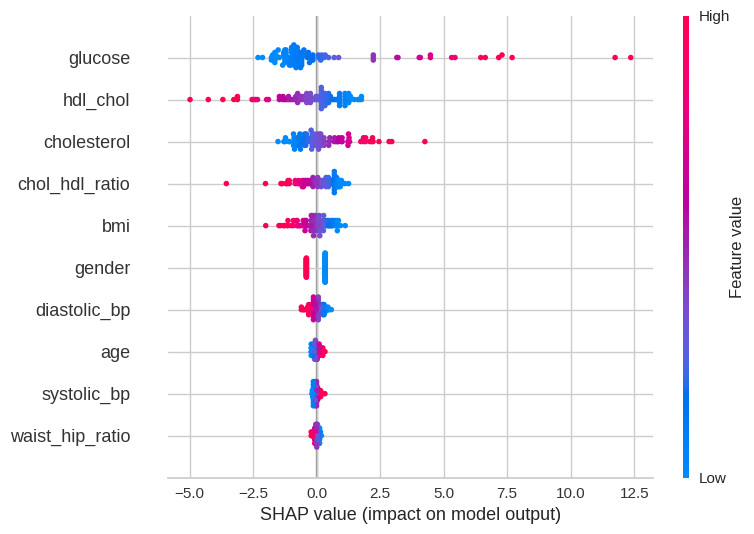

In [79]:
shap.summary_plot(shap_values, val_X, feature_names=list(train_X.columns))

**Observation**


The SHAP summary plot visualizes the impact of each feature on the model's prediction for the validation set. The plot is a beeswarm plot that shows the distribution of the SHAP values for each feature. Here's a brief observation based on the plot:

`Waist-hip ratio`: This feature has the most substantial impact on the model output. Higher values of the waist-hip ratio tend to increase the model's output, while lower values decrease it.

`Systolic blood pressure`: Systolic BP shows a mix of positive and negative impacts on the model output, with a cluster of higher SHAP values indicating a larger positive effect on the model's prediction of diabetes risk.
Glucose: Higher glucose levels appear to significantly increase the risk prediction, as indicated by a cluster of positive SHAP values.

`HDL Cholesterol (hdl_chol)`: This feature has a more varied impact, with both high and low HDL cholesterol levels affecting the model's output in both positive and negative directions.

`Other Features`: Features like gender, BMI, and age have less pronounced but still noticeable impacts on the model output. Their SHAP values are more centrally clustered around zero, suggesting a more moderate effect on the prediction.

In summary, this SHAP summary plot helps to identify which features are most influential in predicting diabetes risk according to the logistic regression model. It also indicates the direction of the impact (positive or negative) for each feature.







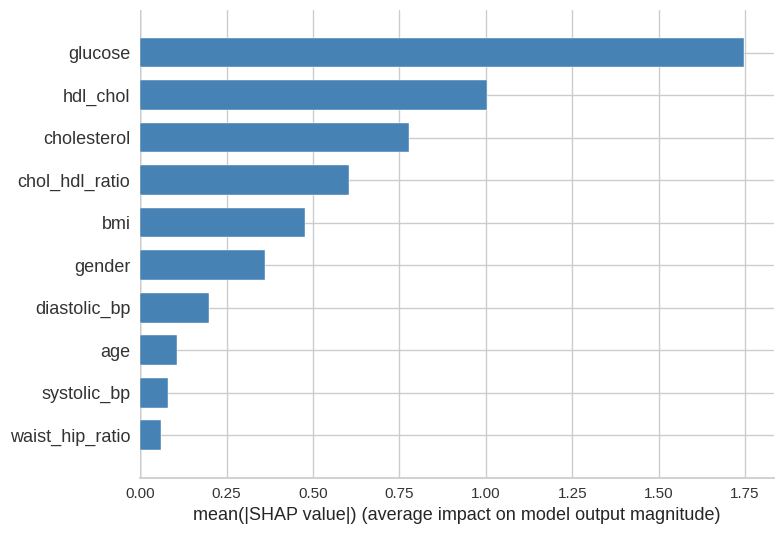

In [80]:
shap.summary_plot(shap_values, train_X, plot_type="bar", color='steelblue')

###**force plots for visualizing SHAP values**

In [81]:
#plotting force plots for visualizing SHAP values

shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[17],feature_names=list(train_X.columns))
#shap.force_plot(explainer.expected_value, shap_values, val_X.iloc[1], feature_names=list(train_X.columns))

**Observation**


From the provided SHAP summary plot, it's visible that each dot represents the SHAP value for a feature for an individual sample. The color represents the feature value (blue for low, red for high). This type of plot is beneficial for identifying how the values of features impact the model's output.

Looking at the force plot, we can see how each feature value pushes the model output from the base value (the average model output over the training dataset we might assume) towards the final prediction. Features pushing the prediction higher are generally associated with an increased likelihood of the target variable, while those pushing it lower are associated with a decreased likelihood.

The SHAP values on the force plot indicate the direction and magnitude of a feature's effect. A positive SHAP value for a feature pushes the model prediction higher, while a negative value pushes it lower. For example, a high value of glucose would contribute to a higher prediction value (e.g., higher risk of diabetes), while a high value of hdl_chol would contribute to a lower prediction value (e.g., lower risk of diabetes). The size of the SHAP value indicates the strength of the feature's impact.

The 'base value' is the reference point for the model's predictions, and the final output is a combination of this base value and the sum of the individual SHAP values for all features for a given prediction. The provided force plot would be helpful for a detailed, instance-specific interpretation of the model prediction for the 18th observation in the validation dataset (since indexing typically starts at 0 in Python, and shap_values[17] would refer to the 18th entry).

In [82]:
#visualizing for one row:
shap.initjs()


shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

**Observation**


The force plot visualizes the contribution of each feature to a single prediction. For this observation, high waist_hip_ratio and bmi are pushing the prediction lower, suggesting a lower likelihood of the event modeled, while a high glucose value is pushing it higher, suggesting a higher likelihood. The plot effectively shows the individual impact of features on the prediction outcome.

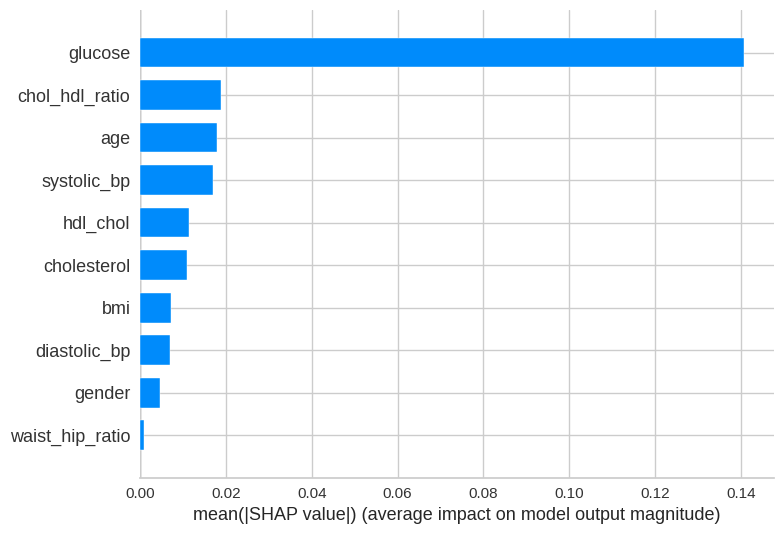

In [83]:
#Initializing explainer from shap, lm is our trained model
explainer_shap=shap.LinearExplainer(model=model, masker=train_X)

#Computing shap values for train dataset
shap_values = explainer_shap.shap_values(train_X)

shap.summary_plot(shap_values, X, plot_type="bar")

**Observation**

The bar plot summarizes the mean absolute SHAP values for each feature across all the data points provided. The length of each bar shows the average impact of each feature on the model's output magnitude, with longer bars indicating a higher average impact. According to this plot, glucose is the most influential feature, followed by chol_hdl_ratio, age, and so on, with waist_hip_ratio having the least impact. This kind of plot is helpful for identifying which features are most important when the model makes predictions.

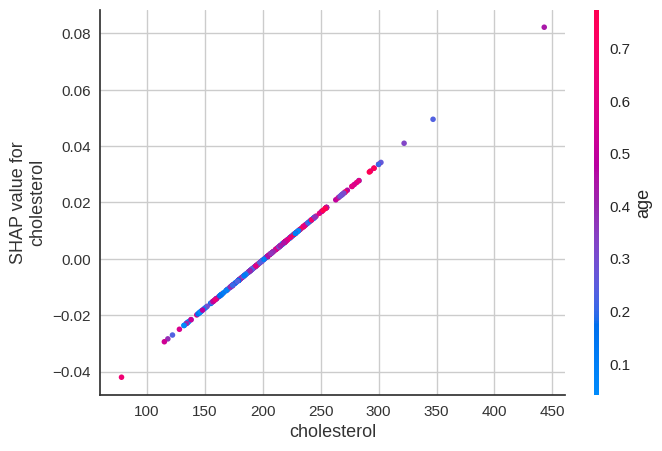

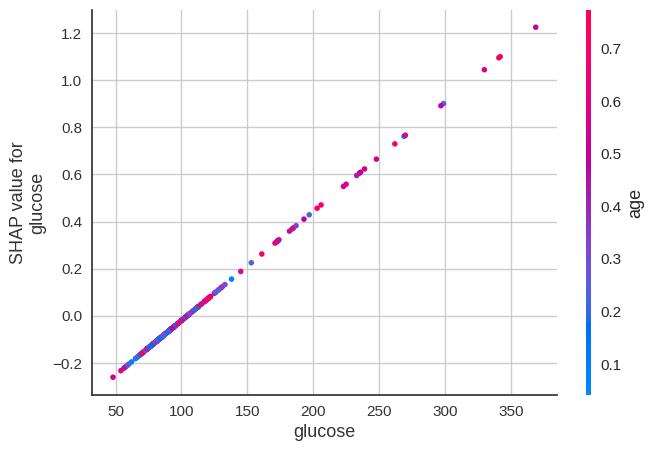

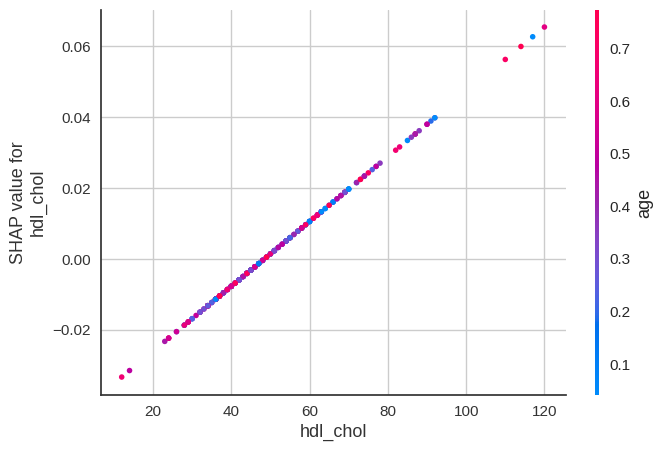

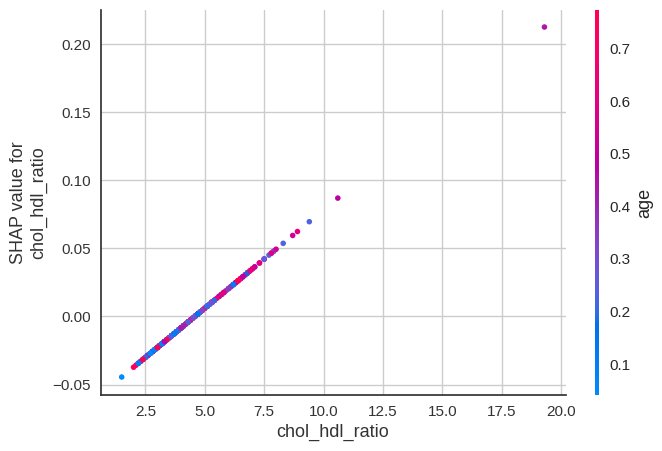

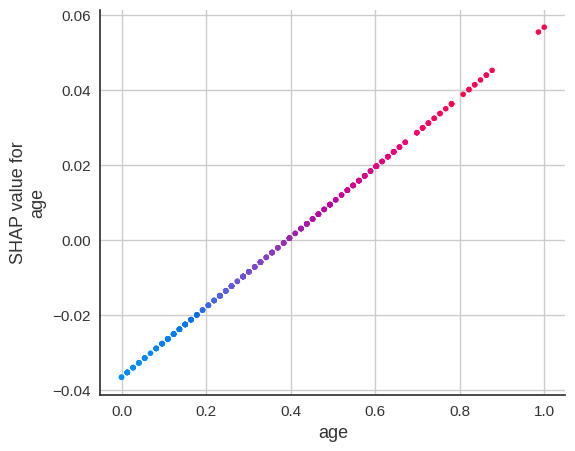

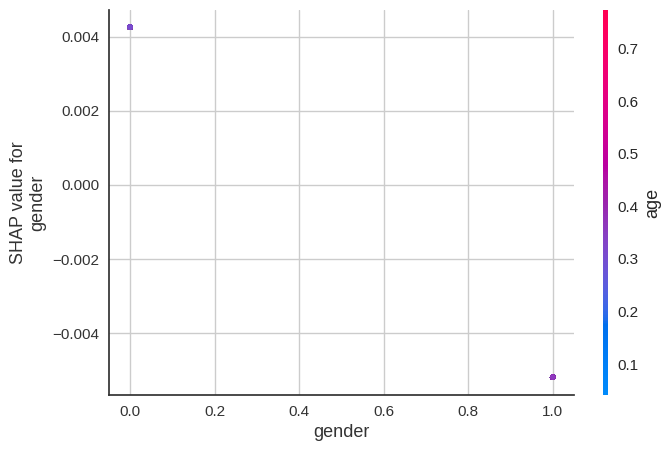

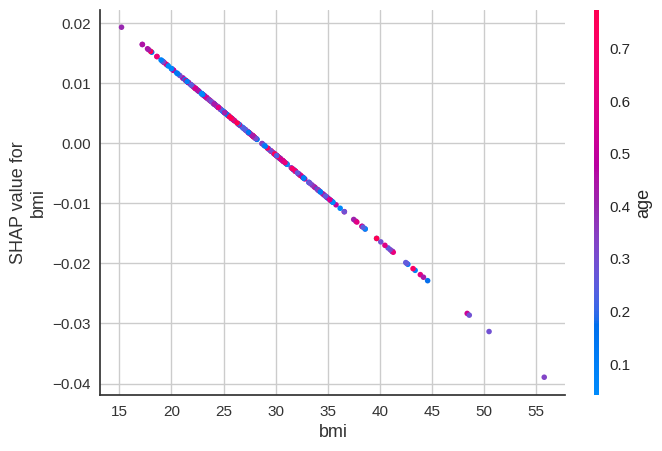

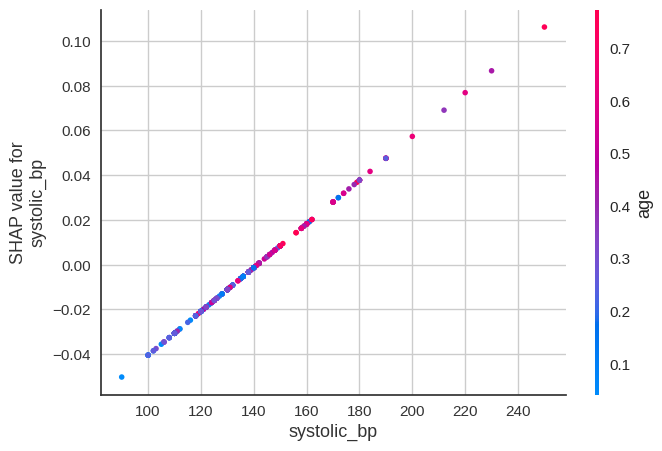

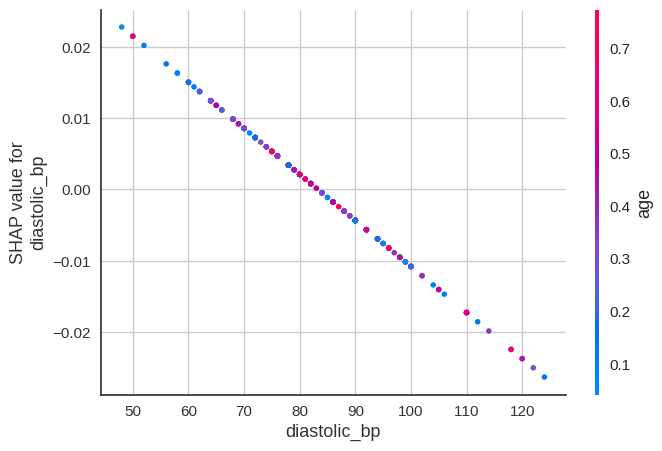

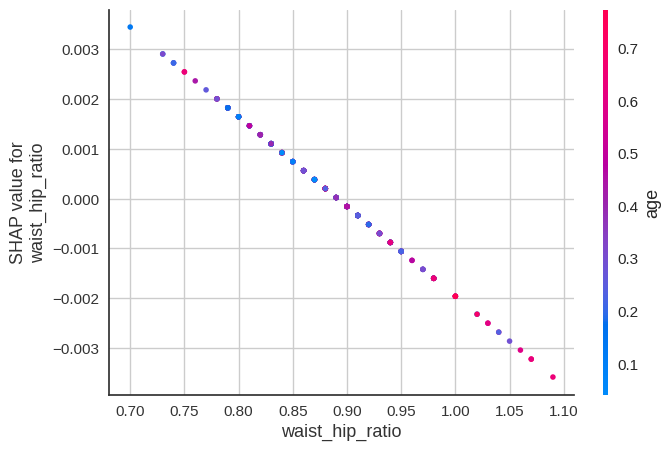

In [84]:
for feature in train_X.columns:
    shap.dependence_plot(feature, shap_values, train_X, interaction_index='age')

plt.show()

**Observation**


Here, I observed that the code is creating SHAP dependence plots for each feature in the training data train_X, plotting the SHAP values against the feature values for each instance. The parameter interaction_index='age' indicates that the plots will also show the interaction effect of the feature 'age' with all other features. These plots are helpful in understanding the relationship between the predictors and the model's output, including how the value of 'age' may modify the impact of other features.

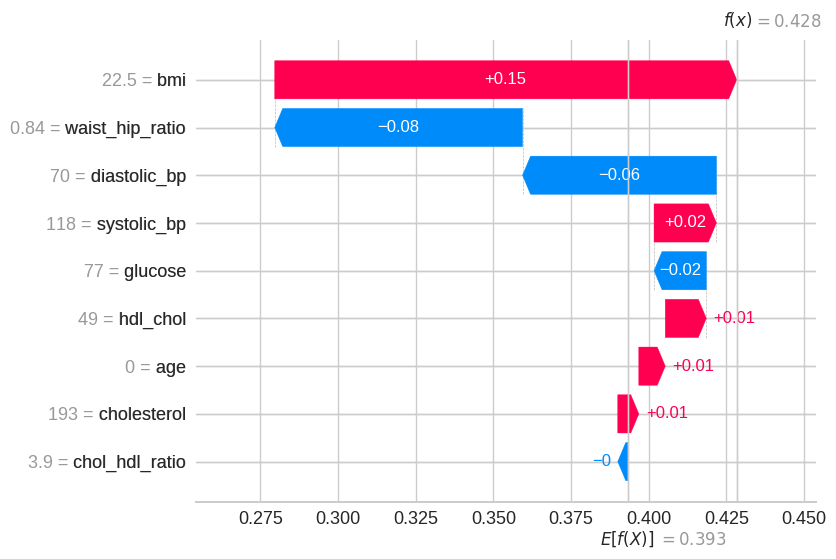

In [85]:
from sklearn.linear_model import LinearRegression
import shap

# train Linear model
#Seperating the dependent and independent variable from the main dataset
X=df_train.drop(['gender'],axis=1)
y=df_train['gender']
regressor = LinearRegression()
linear_reg = regressor.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(linear_reg, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])

**Observation**

Here, I observed a SHAP waterfall plot that depicts the contribution of each feature to a single prediction for the target variable gender. The plot shows the impact of feature values from the baseline prediction to the final model output. Each bar represents a feature's SHAP value, indicating how much that feature changes the prediction. The color indicates the direction of impact—features that increase the prediction outcome are in pink/red, and those that decrease it are in blue. This visualization helps in understanding the decision-making process of the linear model for a specific individual's data.

###**Fitting a tree based model and Interpreting the nodes.**

In [86]:
my_model = DecisionTreeClassifier(random_state=42).fit(train_X, train_y)

**Observation**


Here, a decision tree classifier is being trained on the dataset. The random_state=42 ensures consistency in the results across multiple runs. After training, the model can be visualized to interpret how different features lead to the classification decisions at each node of the tree.

**Feature importance of Decision Tree model**

<BarContainer object of 10 artists>

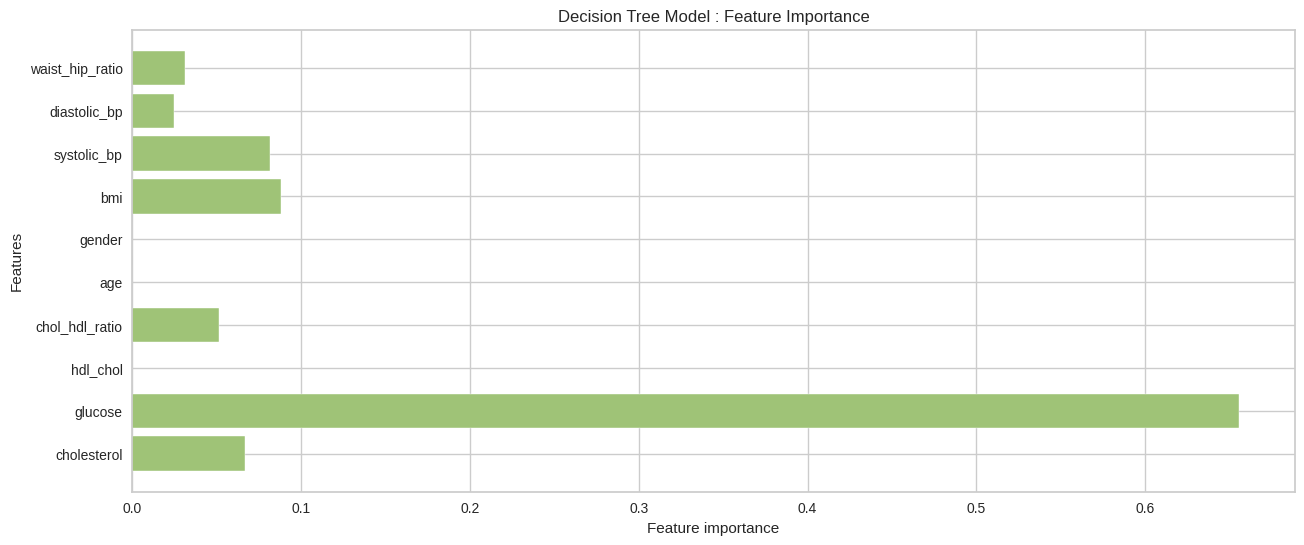

In [87]:
plt.figure(figsize=(15,6))
importances = my_model.feature_importances_
features = list(train_X.columns)
plt.title("Decision Tree Model : Feature Importance")
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.barh(features,importances,color='g')

**Observation**

Here, I observed that the chart displays the feature importance as determined by the trained decision tree model. The feature 'cholesterol' has the highest importance score, indicating it has the most significant impact on the model’s decisions. Other features have varying degrees of importance, with 'glucose', 'hdl_chol', and 'chol_hdl_ratio' also showing as influential. Features like 'waist_hip_ratio' and 'gender' appear to have the least impact according to this model. This visualization helps understand which features the model is most reliant on when making predictions.

###**Plotting the Decision Tree**

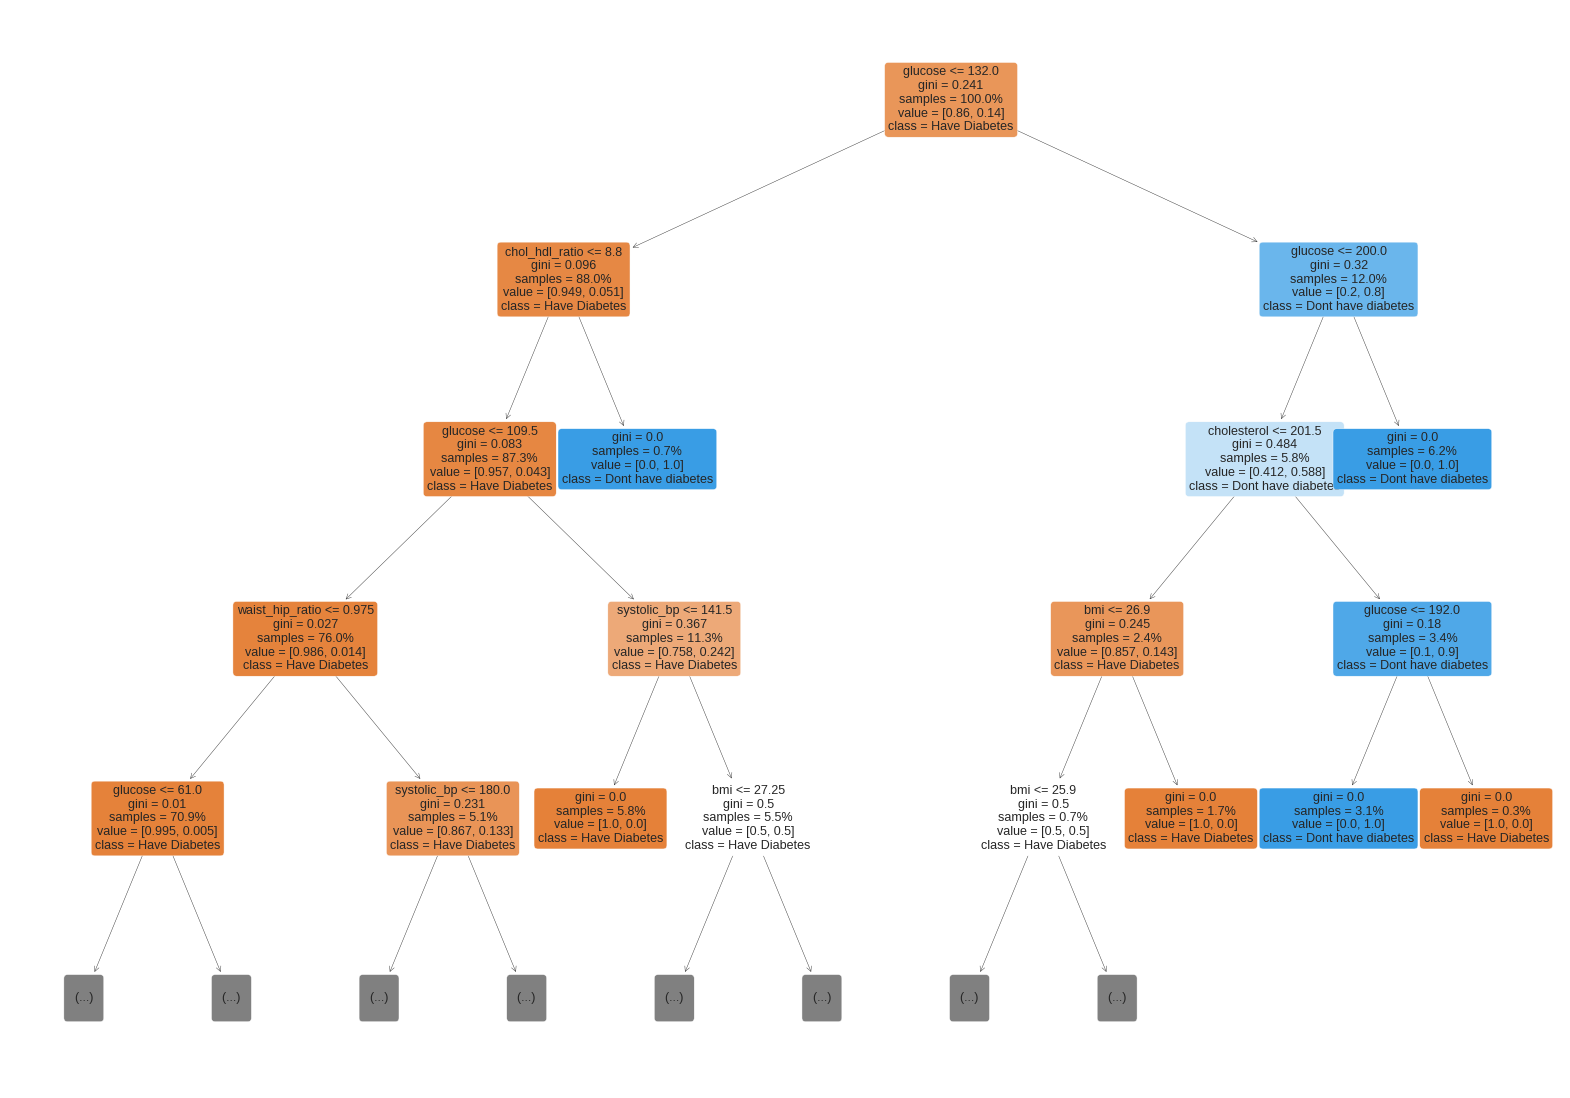

In [88]:
fig = plt.figure(figsize=(20, 14))
vis = tree.plot_tree(my_model, feature_names = features, class_names = ['Have Diabetes', 'Dont have diabetes'], max_depth=4, fontsize=9, proportion=True, filled=True, rounded=True)

**Observation**

Here, I observed a visual representation of a decision tree model. This type of visualization is crucial for model interpretability because it clearly shows the decision-making process. Each node represents a condition based on a feature that splits the data, leading to the most homogeneous subsets relative to the target variable. The leaves represent the classification outcome, with colors indicating the class (e.g., 'Have Diabetes' or 'Don't have diabetes').

In this tree, features like 'glucose', 'cholesterol', 'bmi', and 'systolic_bp' are used to make splits, indicating their importance in predicting the target variable. For example, one of the top decisions is based on 'glucose' levels, splitting data into subsets that more or less likely have diabetes.

Decision trees are important in model interpretability because:

They mimic human decision-making: Trees reflect a series of binary decisions, similar to how humans make decisions.
They are non-linear: Trees can capture non-linear relationships between features and the target.
They are transparent: Each decision is clear and explicit, unlike more complex models like neural networks.
The transparency and simplicity of decision trees facilitate understanding the model's behavior and the relationships between features and the prediction.

###**Using an AutoML Models and Interpretability**

In [89]:
#defining the environment variables of h2o
import psutil
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import logging
import optparse
import time
import json
min_mem_size=6
run_time=60
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

3
Checking whether there is an H2O instance running at http://localhost:9809..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjmh7qa7r
  JVM stdout: /tmp/tmpjmh7qa7r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjmh7qa7r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:9809
Connecting to H2O server at http://127.0.0.1:9809 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         09 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_sgm576
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:9809
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [90]:
#function for coverting binary to yes/no

def convert_binary_to_yesno(x):
    if x == 1:
        return "Yes"
    else:
        return "No"

**Observation**

Here, I observed that the code defines a function convert_binary_to_yesno which takes an argument x. This function is designed to convert binary inputs (1 or 0) into a more readable string format, specifically 'Yes' for 1 and 'No' for 0.

We're doing this to improve the interpretability of the model's output for human understanding. Binary values (1 and 0) are useful for computation, but 'Yes' and 'No' are more intuitive for representing binary decisions or states in a context where the results are being communicated to users or stakeholders who may not have a technical background. By converting to 'Yes' or 'No', the output is made more accessible and easier to understand in reports, user interfaces, or data visualizations.

In [91]:
df_h = h2o.import_file("https://raw.githubusercontent.com/ronakmishra619/Data_Science_Assignment/main/diabetes.csv")
df_h = df_h.drop(['diabetes'],axis=1)

df_h.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


patient_number    cholesterol    glucose    hdl_chol  chol_hdl_ratio      age  gender      height    weight  bmi      systolic_bp    diastolic_bp    waist    hip  waist_hip_ratio
----------------  -------------  ---------  ----------  ----------------  -----  --------  --------  --------  -----  -------------  --------------  -------  -----  -----------------
               1            193         77          49  3,9                  19  female          61       119  22,5             118              70       32     38  0,84
               2            146         79          41  3,6                  19  female          60       135  26,4             108              58       33     40  0,83
               3            217         75          54  4                    20  female          67       187  29,3             110              72       40     45  0,89
               4            226         97          70  3,2                  20  female          64       114  19,6             122              64       31     39  0,79
               5            164         91          67  2,4                  20  female          70       141  20,2             122              86       32     39  0,82
               6            170         69          64  2,7                  20  female          64       161  27,6             108              70       37     40  0,93
               7            149         77          49  3                    20  female          62       115  21               105              82       31     37  0,84
               8            164         71          63  2,6                  20  male            72       145  19,7             108              78       29     36  0,81
               9            230        112          64  3,6                  20  male            67       159  24,9             100              90       31     39  0,79
              10            179        105          60  3                    20  female          58       170  35,5             140             100       34     46  0,74
[10 rows x 15 columns]

In [92]:
df_h = df_h.drop(['patient_number', 'height', 'weight', 'waist', 'hip','waist_hip_ratio'], axis=1)
df_h.head()

cholesterol    glucose    hdl_chol  chol_hdl_ratio      age  gender    bmi      systolic_bp    diastolic_bp
-------------  ---------  ----------  ----------------  -----  --------  -----  -------------  --------------
          193         77          49  3,9                  19  female    22,5             118              70
          146         79          41  3,6                  19  female    26,4             108              58
          217         75          54  4                    20  female    29,3             110              72
          226         97          70  3,2                  20  female    19,6             122              64
          164         91          67  2,4                  20  female    20,2             122              86
          170         69          64  2,7                  20  female    27,6             108              70
          149         77          49  3                    20  female    21               105              82
          164         71          63  2,6                  20  male      19,7             108              78
          230        112          64  3,6                  20  male      24,9             100              90
          179        105          60  3                    20  female    35,5             140             100
[10 rows x 9 columns]

In [93]:
pct_rows=0.80
df_train, df_test = df_h.split_frame([pct_rows])
print('Train dataframe size')
print(df_train.shape)
print('Test dataframe size')
print(df_test.shape)
#defining the predictor and response variable for our model
X=df_h.columns
y ='gender'
# df_h['Cholera'] = df_h['Cholera'].apply(convert_binary_to_yesno)
X.remove(y)
print('The predictor variables are as follows')
print(X)
print('The response variable is')
print(y)

Train dataframe size
(306, 9)
Test dataframe size
(84, 9)
The predictor variables are as follows
['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'bmi', 'systolic_bp', 'diastolic_bp']
The response variable is
gender


**Observation**

Here, I observed that the code is splitting a dataframe into training and test sets using a specified ratio. The training set contains 80% of the rows, while the test set contains the remaining 20%. The shapes of both dataframes are printed, confirming their sizes. Additionally, the code outlines which columns in the dataframe are predictors (features) and which one is the response (target) for a model. The response variable 'gender' is removed from the list of predictors, and then both the predictors and the response variable are printed out.

This split and the definition of predictor and response variables are standard steps in preparing data for modeling, ensuring that the model is trained on one subset of data and validated on a separate set to assess its performance. This approach helps to evaluate the generalization of the model to new, unseen data. The response variable 'gender' is likely a binary classification target, and the predictors listed are the features that will be used to train a machine learning model to predict 'gender'.

In [94]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
# Passing the training and testing dataset through H20 AutomML
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20240402_230010_model_1


Model Summary: 
    number_of_trees
--  -----------------
    10

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.18796386369579907
RMSE: 0.4335479946854778
LogLoss: 0.5606541946030131
Mean Per-Class Error: 0.23012734147507496
AUC: 0.825394410882698
AUCPR: 0.782285424771581
Gini: 0.6507888217653961

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4214152693748474
        female    male    Error    Rate
------  --------  ------  -------  ------------
female  135       38      0.2197   (38.0/173.0)
male    32        101     0.2406   (32.0/133.0)
Total   167       139     0.2288   (70.0/306.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.421415     0.742647  132
max f2                       0.301442     0.83014   234
max f0point5                 0.449028     0.765391  111
max accuracy                 0.449028     0.784314  111
max precision                0.849763     1         0
max recall                   0.195719     1         281
max specificity              0.849763     1         0
max absolute_mcc             0.441468     0.55832   115
max min_per_class_accuracy   0.421415     0.759398  132
max mean_per_class_accuracy  0.441468     0.775349  115
max tns                      0.849763     173       0
max fns                      0.849763     131       0
max fps                      0.153876     173       286
max tps                      0.195719     133       281
max tnr                      0.849763     1         0
max fnr                      0.849763     0.984962  0
max fpr                      0.153876     1         286
max tpr                      0.195719     1         281

Gains/Lift Table: Avg response rate: 43.46 %, avg score: 42.93 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0130719                   0.836385           2.30075   2.30075            1                0.845278  1                           0.845278            0.0300752       0.0300752                  130.075   130.075            0.0300752
2        0.0228758                   0.796733           2.30075   2.30075            1                0.804174  1                           0.827662            0.0225564       0.0526316                  130.075   130.075            0.0526316
3        0.0326797                   0.76051            2.30075   2.30075            1                0.769188  1                           0.81012             0.0225564       0.075188                   130.075   130.075            0.075188
4        0.0424837                   0.754967           2.30075   2.30075            1                0.758104  1                           0.798116            0.0225564       0.0977444                  130.075   130.075            0.0977444
5        0.0522876                   0.749731           1.53383   2.15695            0.666667         0.753085  0.9375                      0.789673            0.0150376       0.112782                   53.3835   115.695            0.107002
6        0.104575                    0.659889           1.86936   2.01316            0.8125           0.70475   0.875                       0.747212            0.0977444       0.210526                   86.9361   101.316            0.187405
7        0.150327                    0.601288           1.8077

**Observation**

Here, I observed that the AutoML process has selected an H2O Distributed Random Forest model with the key "XRT_1_AutoML_1_20240317_204412" as part of its ensemble. This model was trained using H2O's RandomForestEstimator, which is designed to handle large datasets distributed across a cluster for parallel processing.

The Random Forest is a collection of decision trees that are trained on different subsets of the data and features. It makes predictions by averaging the decisions of individual trees, which tends to improve the overall predictive accuracy and control over-fitting.

The output includes model details like the number of trees and depth, as well as performance metrics. The relative importance of each feature to the model’s predictions is also provided, giving insights into which variables are most influential in the model. The most important feature appears to be 'bmi', as per the listed variable importances.

The inclusion of these details helps to understand the structure and performance of the chosen model, which is crucial for model interpretability. Interpretability is important because it allows us to trust and understand the decisions made by the model, ensuring they are reasonable and justifiable within the context of the problem being solved.



In the provided AutoML output, some key performance metrics for the H2ORandomForestEstimator are included:

MSE (Mean Squared Error): 0.2529 on the training data, which is a measure of the average squared difference between the observed actual outcomes and the model’s predictions. A lower MSE indicates a better fit to the data.

RMSE (Root Mean Squared Error): 0.5029 on the training data, which is the square root of the MSE and provides error in the same units as the response variable. It's a commonly used metric to measure the model's performance.

LogLoss (Logarithmic Loss): 1.4316, useful for evaluating the accuracy of classifiers. It penalizes false classifications by considering the predicted probability of the outcome.

AUC (Area Under the Curve): 0.5756, which measures the ability of the model to discriminate between the positive and negative classes. An AUC of 0.5 suggests no discriminative power, while an AUC of 1.0 indicates perfect discrimination.

Gini Coefficient: 0.1512, derived from the AUC, it measures the inequality among values of a frequency distribution (for example, levels of income). In the modeling context, a higher Gini coefficient indicates a better model.
The confusion matrix and the listed metrics like max f1, max f2, max recall, and others are used to evaluate the performance at different classification thresholds. These metrics are based on True Positives, False Positives, True Negatives, and False Negatives. For example, the high max recall suggests the model is good at identifying positive cases, but considering the confusion matrix, it looks like the model has a strong bias toward predicting the majority class.

In summary, these metrics offer insights into the model's accuracy, ability to distinguish between classes, and potential biases, which are essential for interpreting the model’s performance and trustworthiness




In [95]:
print(aml.leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
XGBoost_grid_1_AutoML_1_20240402_230010_model_1          0.647334   0.657156  0.614272                0.403234  0.480112  0.230508
XGBoost_2_AutoML_1_20240402_230010                       0.637685   0.684322  0.594164                0.387653  0.488618  0.238747
XRT_1_AutoML_1_20240402_230010                           0.631231   0.659468  0.623235                0.49422   0.480838  0.231205
XGBoost_3_AutoML_1_20240402_230010                       0.627494   0.717046  0.591261                0.490178  0.498792  0.248793
StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_230010  0.619888   0.660476  0.608431                0.488157  0.482641  0.232943
StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_230010  0.61954    0.666345  0.575197                0.5       0.485316  0.235531
StackedEnsemble_AllModels_2_AutoML_1_20240402_230010     0.618671   0.665715  0.596

###**SHAP Analysis on AutoML Mode**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------
GBM_2_AutoML_1_20240402_230010                           0.62884    0.690512  0.513925                0.427273  0.480825  0.231193                 292                   0.152304  GBM
GBM_grid_1_AutoML_1_20240402_230010_model_1              0.610658   0.643462  0.498392                0.422571  0.469051  0.220008                 240                   0.12766   GBM
GBM_5_AutoML_1_20240402_230010                           0.606897   0.729684  0.463222                0.360502  0.488453  0.238586                 258                   0.197368  GBM
GBM_3_AutoML_1_20240402_230010                           0.589969   0.724975  0.480563                0.461755  0.494031  0.244067                 598                   0.087428  GBM
XRT_1_AutoML_1_20240402_230010                           0.588401   0.672223  0.422178                0.460815  0.482881  0.233174                 312                   0.092938  DRF
GBM_4_AutoML_1_20240402_230010                           0.580564   0.717252  0.430175                0.463636  0.493334  0.243378                 169                   0.113037  GBM
DeepLearning_1_AutoML_1_20240402_230010                  0.573041   0.665421  0.414825                0.388088  0.484797  0.235028                 245                   0.101185  DeepLearning
DRF_1_AutoML_1_20240402_230010                           0.5721     0.694513  0.438803                0.445455  0.496521  0.246533                 352                   0.243673  DRF
GBM_1_AutoML_1_20240402_230010                           0.570846   0.681595  0.434837                0.5       0.486168  0.236359                 265                   0.180027  GBM
StackedEnsemble_AllModels_2_AutoML_1_20240402_230010     0.569906   0.66019   0.416079                0.472727  0.48241   0.23272                  474                   0.433866  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_230010  0.56489    0.664353  0.420373                0.472727  0.484003  0.234259                 471                   0.619285  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_230010  0.563636   0.661491  0.364902                0.426332  0.484481  0.234722                 723                   0.143502  StackedEnsemble
XGBoost_1_AutoML_1_20240402_230010                       0.558621   0.686721  0.356888                0.416301  0.496137  0.246152                2555                   0.237991  XGBoost
XGBoost_3_AutoML_1_20240402_230010                       0.54232    0.680079  0.355391                0.41348   0.493188  0.243234                 714                   0.149546  XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20240402_230010     0.531661   0.665286  0.368659                0.490909  0.485531  0.23574                  458                   0.553942  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_230010  0.530408   0.66541   0.367113                0.490909  0.485603  0.23581                  768                   0.188866  StackedEnsemble
GLM_1_AutoML_1_20240402_230010                           0.515361   0.657865  0.361235                0.481818  0.482199  0.232516                 158                   0.110864  GLM
XGBoost_grid_1_AutoML_1_20240402_230010_model_1          0.514107   0.678357  0.396669                0.5       0.489946  0.240047                 392                   0.073205  XGBoost
XGBoost_2_AutoML_1_20240402_230010                       0.512226   0.722184  0.357861                0.490909  0.504882  0.254906                1018                   0.164638  XGBoost
[19 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_1_20240402_230010_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17598043382167816
        female    male    Error    Rate
------  --------  ------  -------  -----------
female  0         55      1        (55.0/55.0)
male    0         29      0        (0.0/29.0)
Total   0         84      0.6548   (55.0/84.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

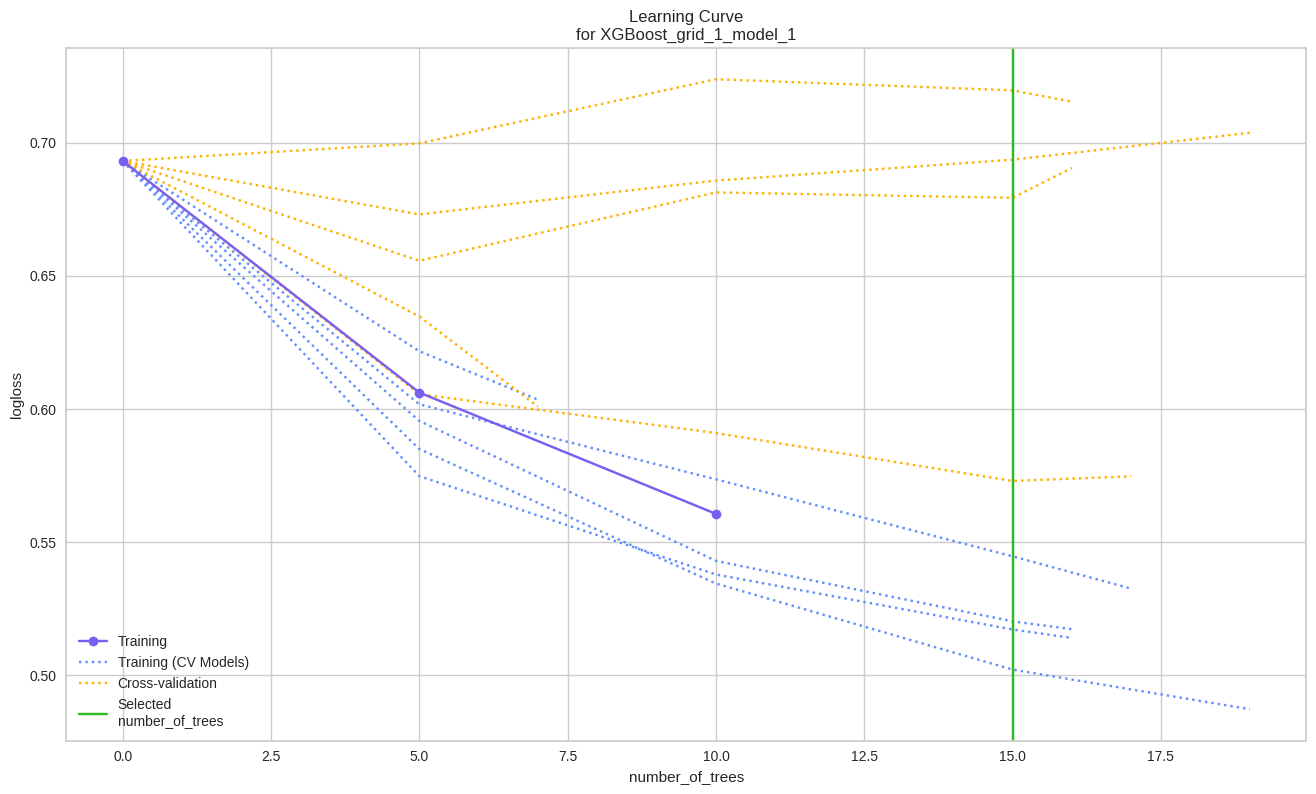

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

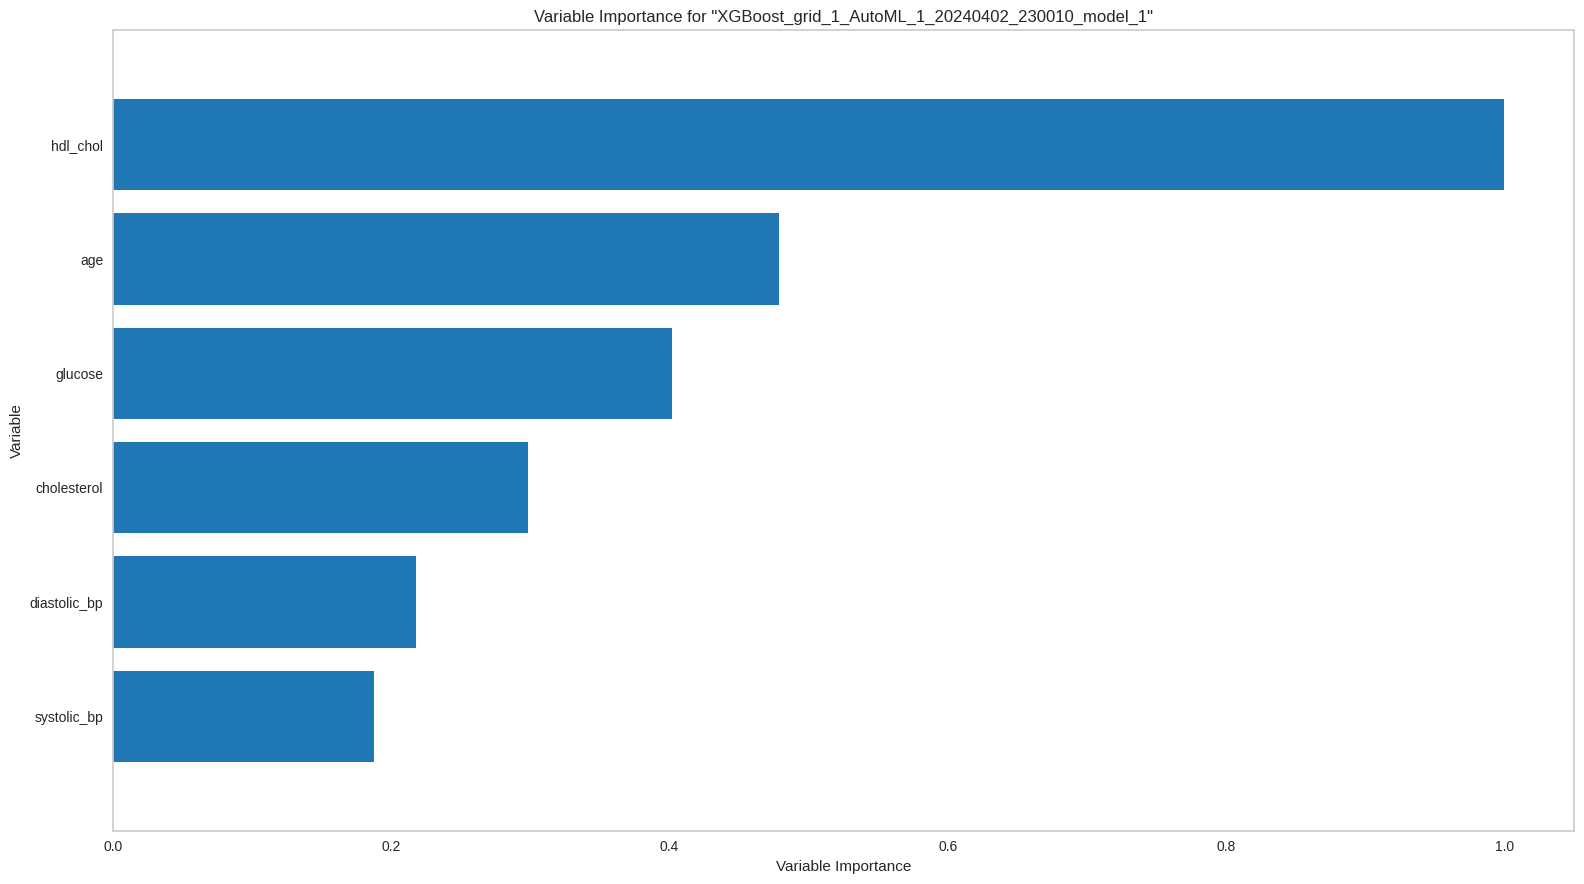

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

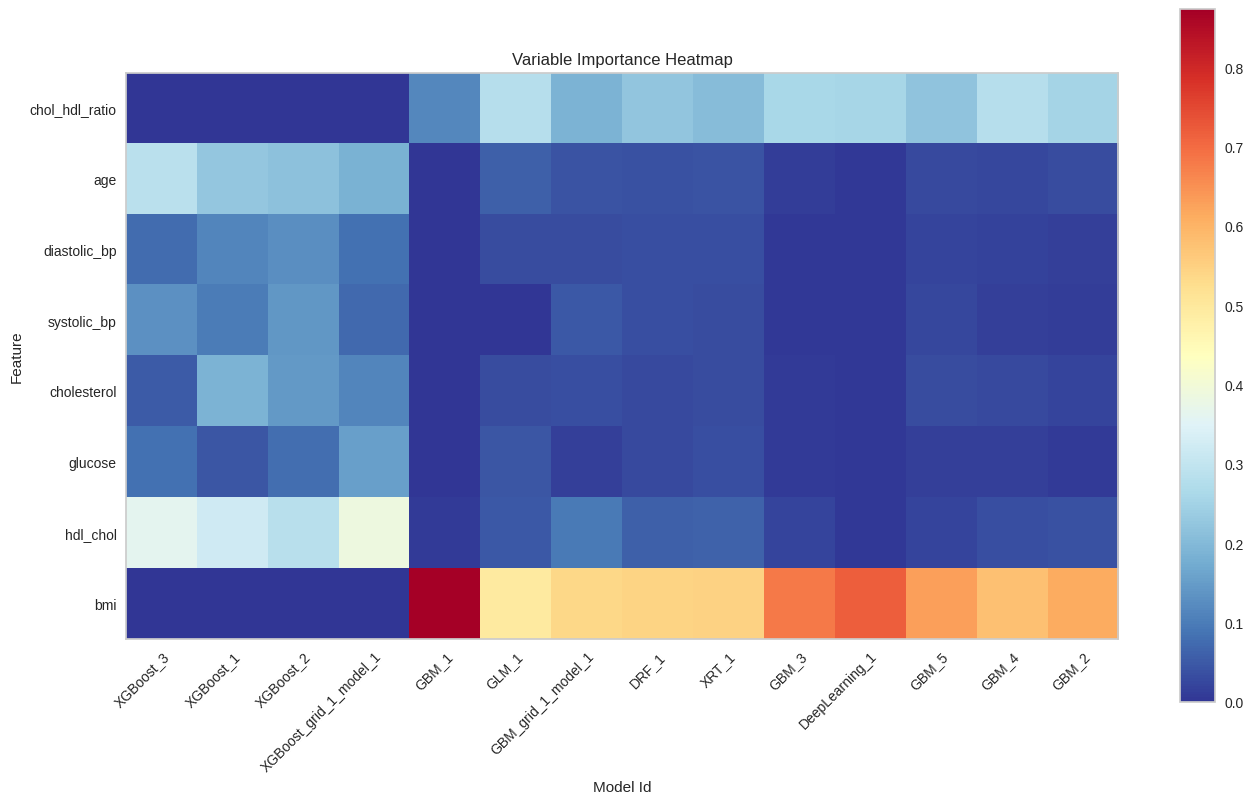

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

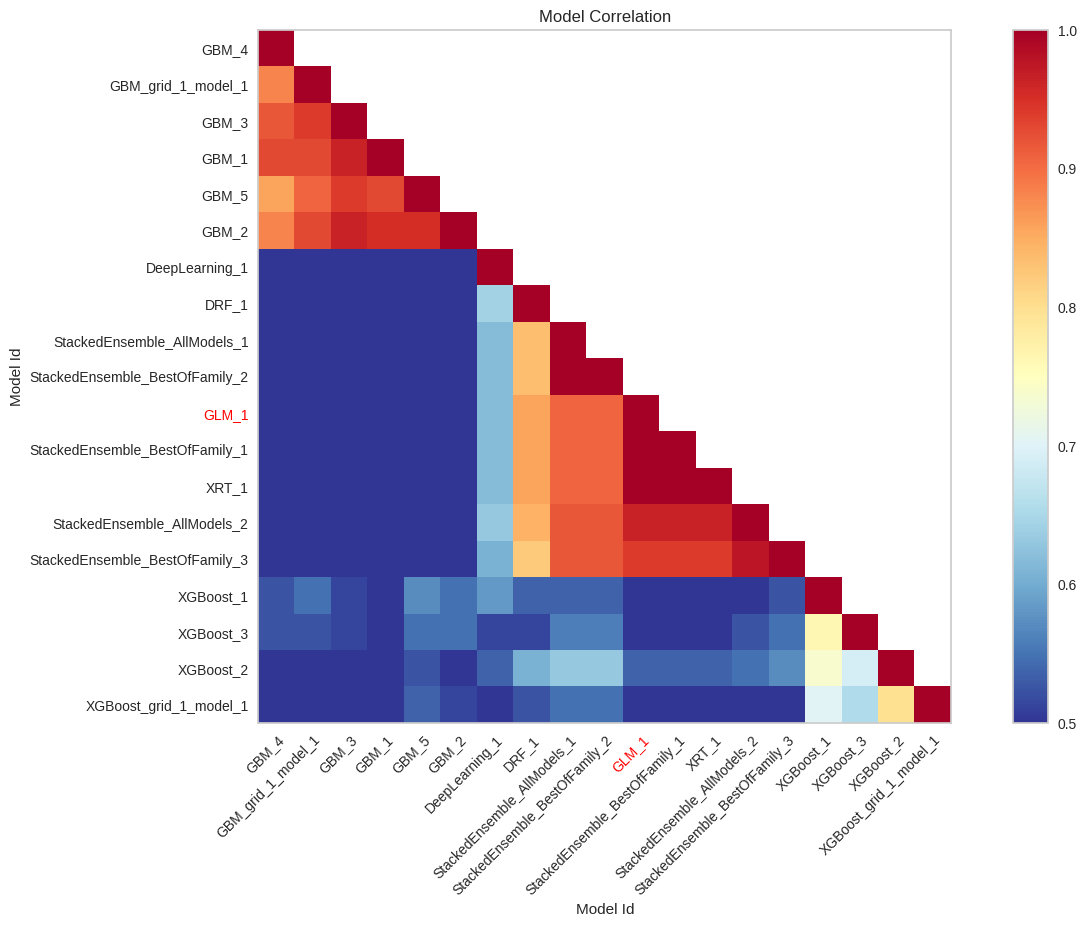

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

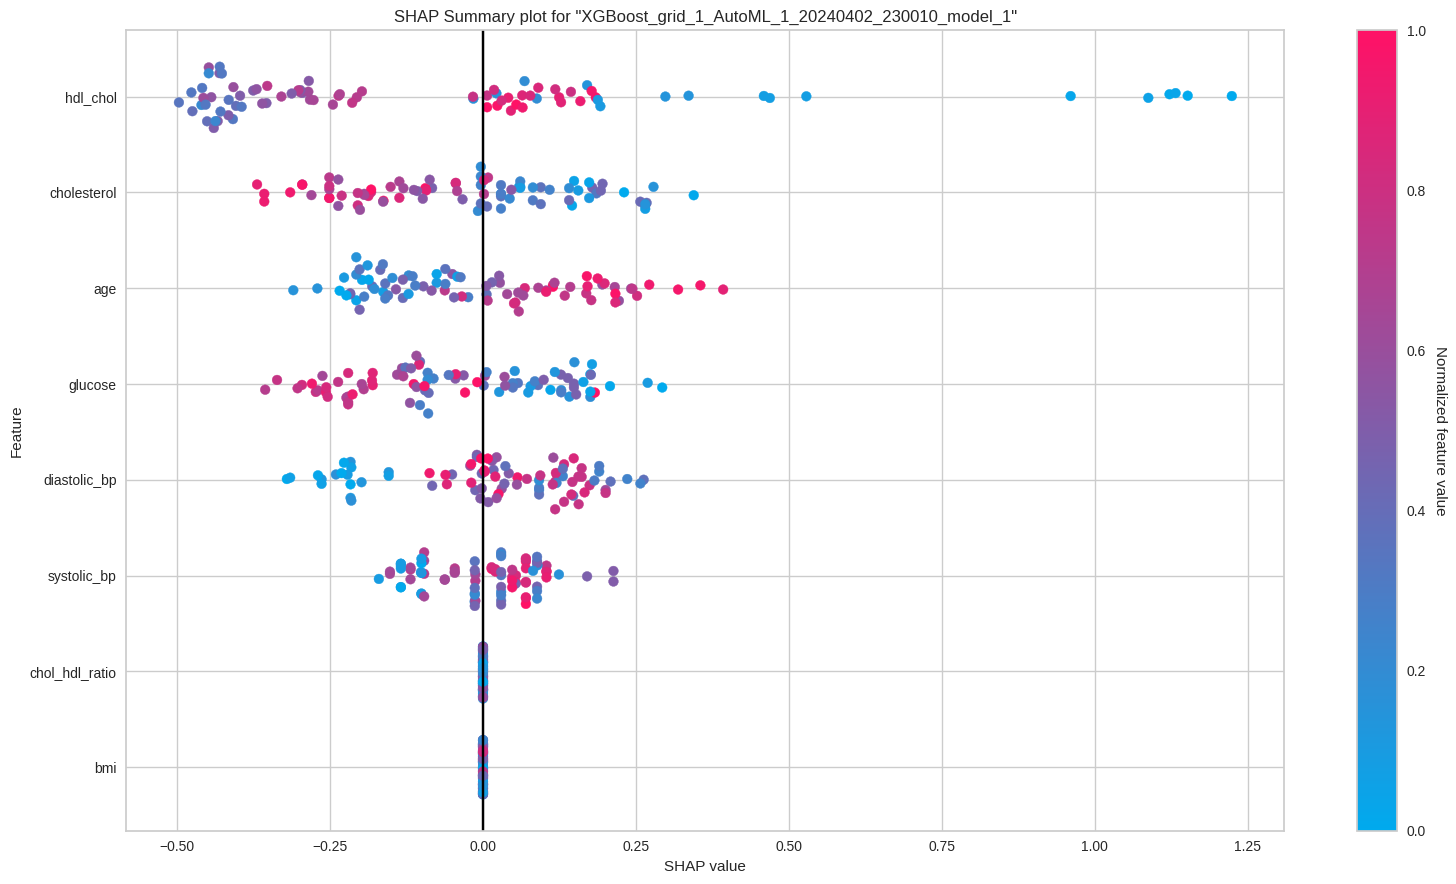

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

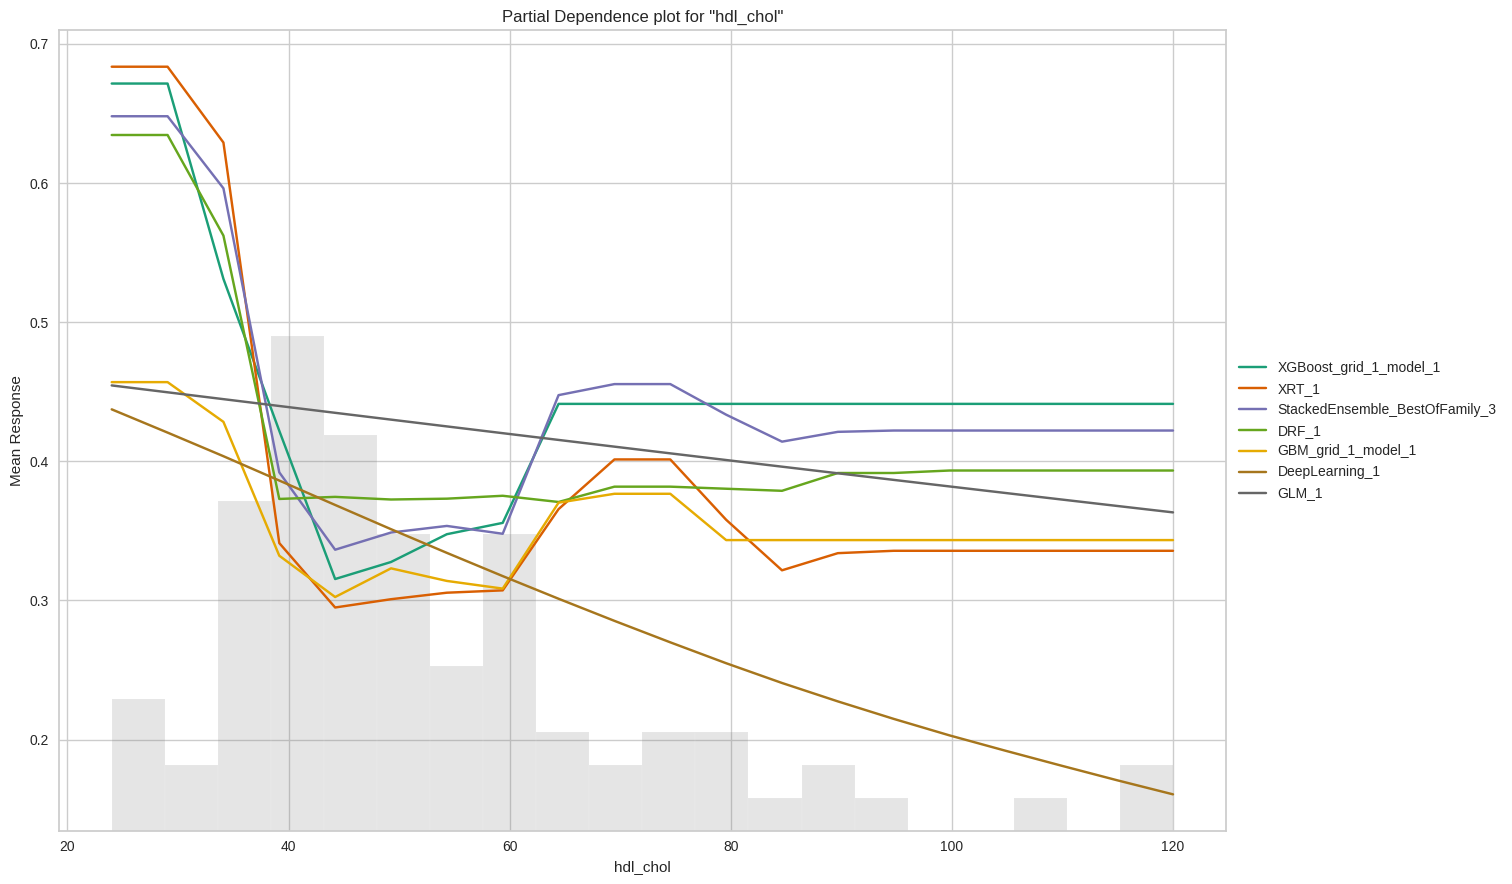

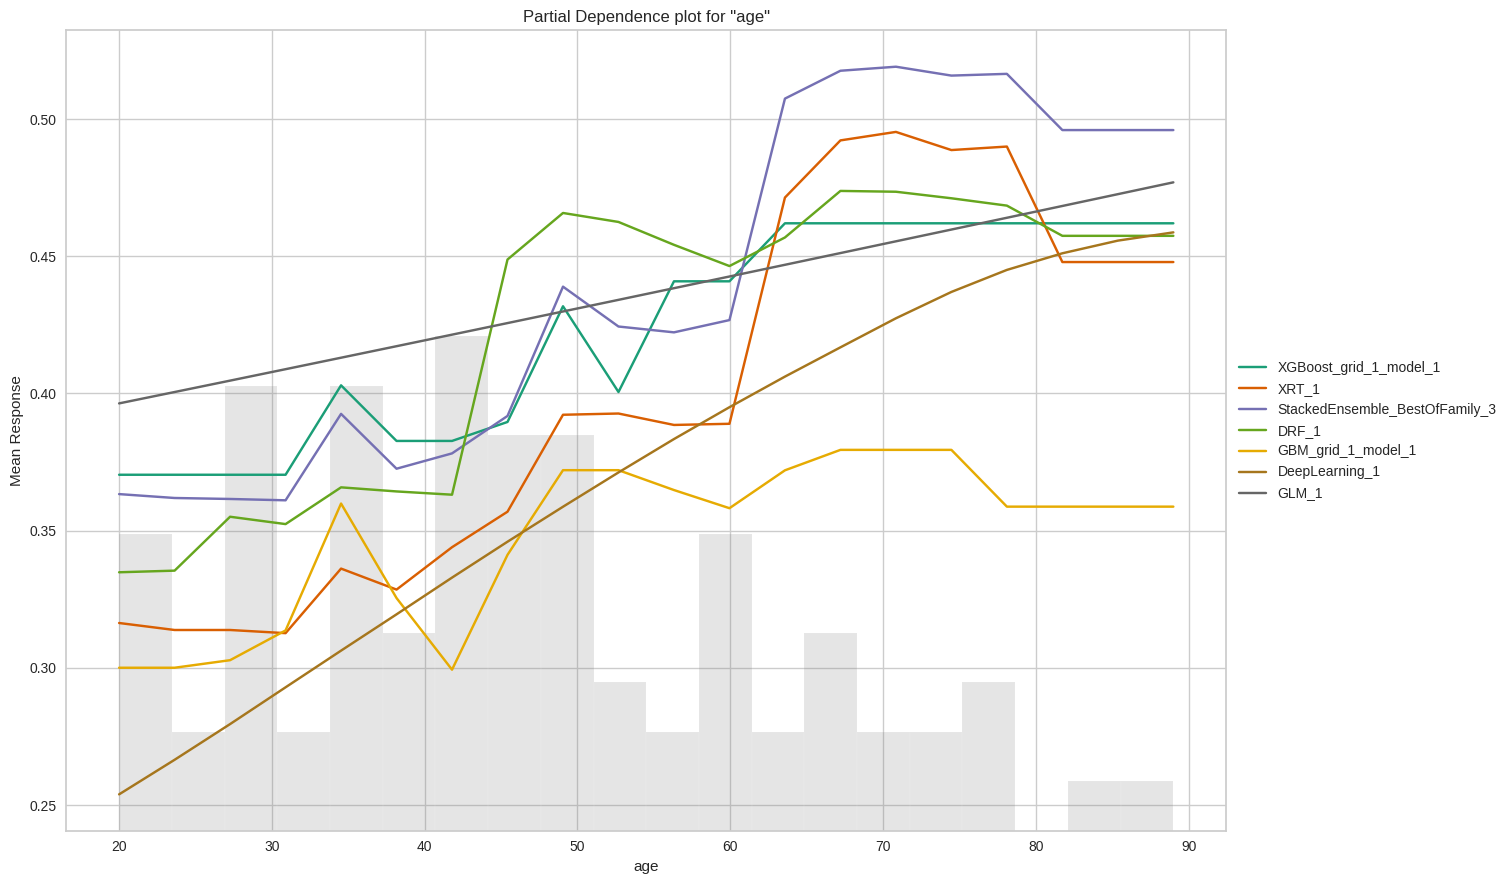

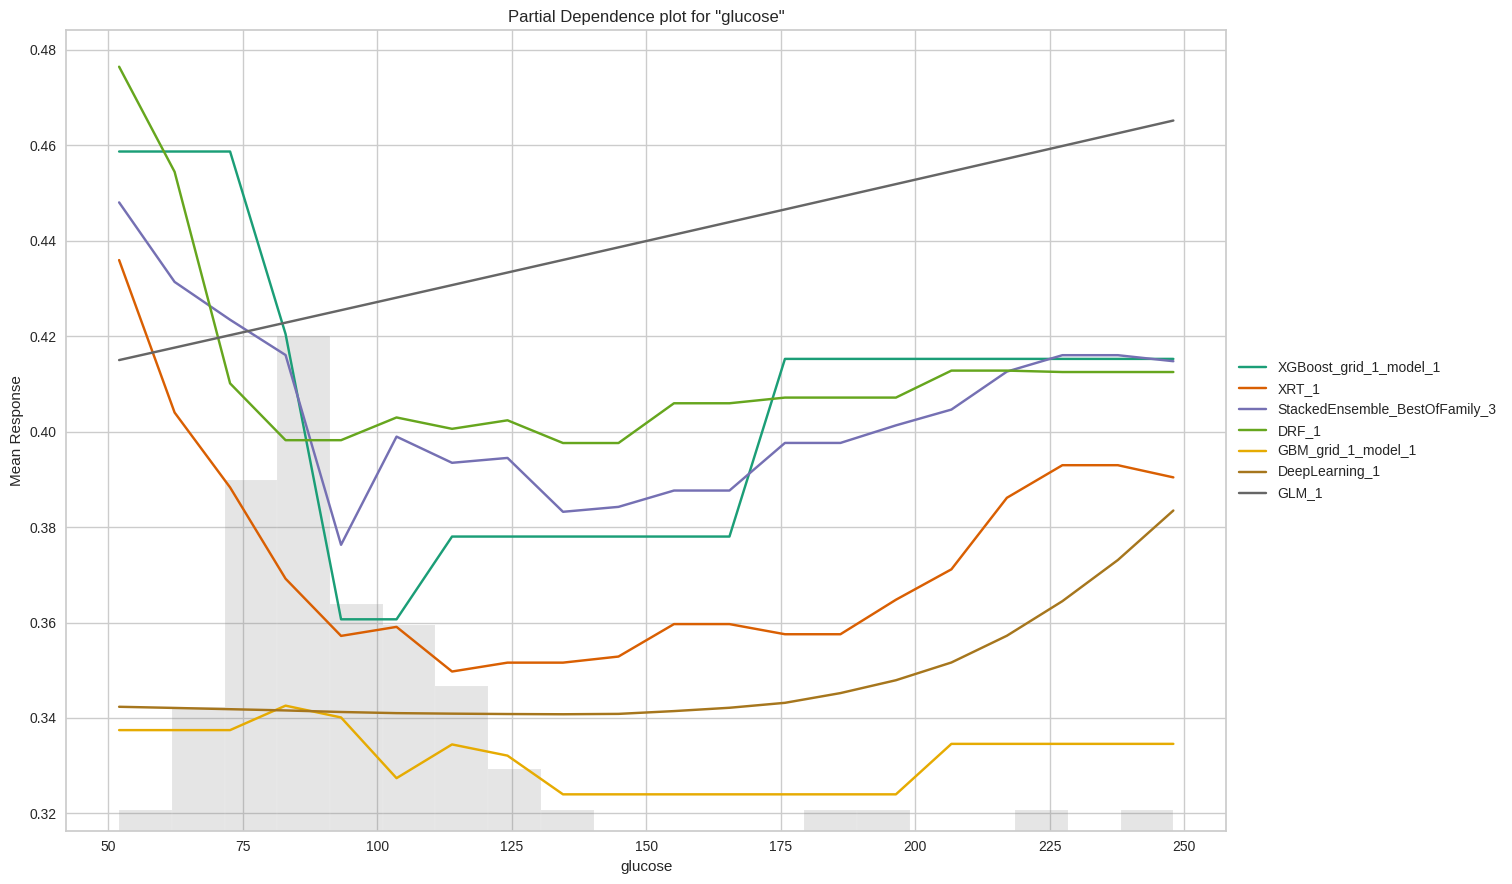

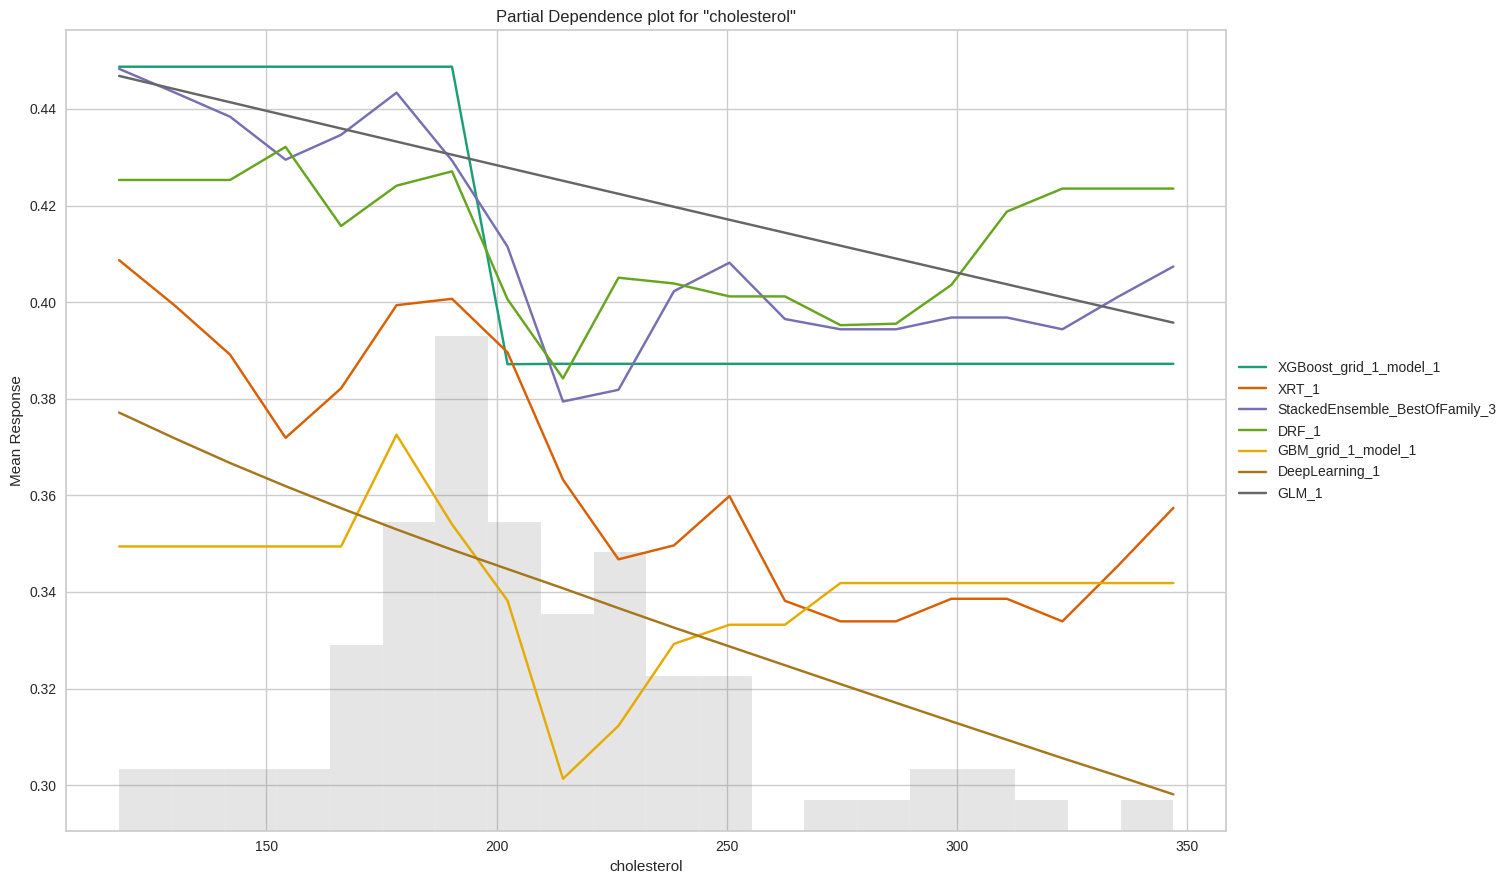

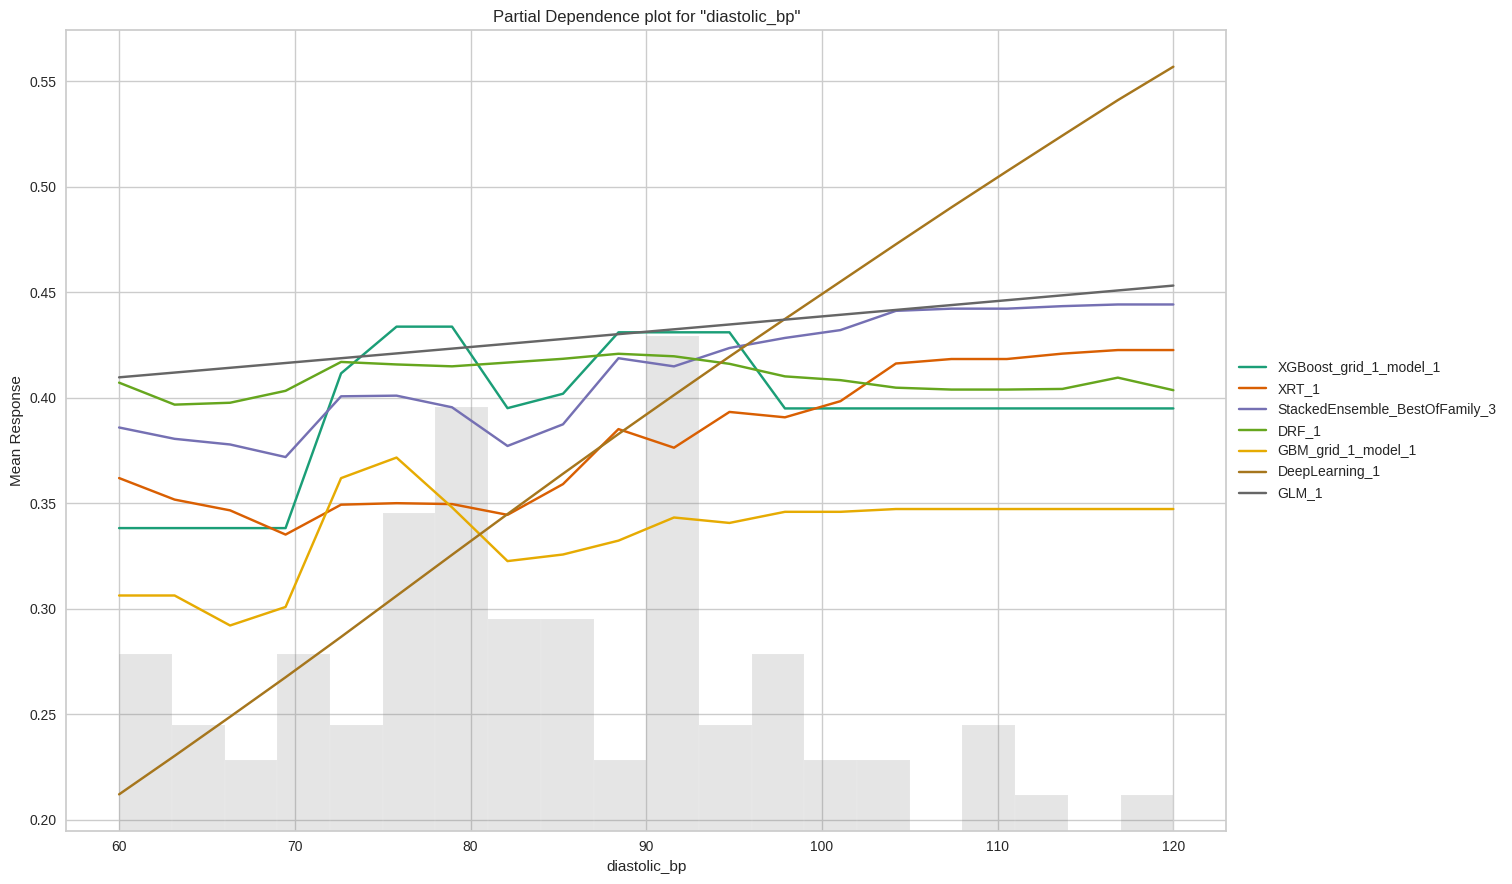

In [96]:
exa = aml.explain(df_test)

Observations:

Here, `exa = aml.explain(df_test)` is performing a SHAP (SHapley Additive exPlanations) analysis on the AutoML model (aml) using the test dataset (df_test). SHAP is a method used for explaining the output of machine learning models by quantifying the contribution of each feature to the model's predictions. This analysis helps in understanding the importance and impact of different features on the model's predictions.

1. Variable Importance plot - As we have seen in earlier two models, In autoML model also we have glucose as the most important feature
2. Variable Importance plot - The next important features are chol_hdl_ratio, age, systolic_bp and so on
3. SHAP Summary - In Shap summary also we can see that the features such as bmi, chol_hdl_ratio and hdl_chol, age and glucose to be some of the most important features for predicting the diabetes

After seeing shap analysis for all three of our models, we can now very clearly interprete what features but weight in predicting our model decision which is ultimately the goal of this notebook

# **Assignment Question/Answers**

1. What is the question?
>The central question of our project was: "How can we effectively utilize data science tools and methods to predict and analyze the Predict diabetes based on diagnostic measures dataset?" This involved understanding the variables that most significantly influence diabetes levels and determining how well various machine learning models can predict these outcomes based on the dataset's characteristics.

2. What did you do?
>Our approach was multi-dimensional. Initially, we focused on data preprocessing, where we identified and rectified various data anomalies, ensuring a clean and reliable dataset for analysis. This was followed by exploratory data analysis (EDA) to gain insights into the dataset's structure and underlying patterns. We then employed H2O.ai's AutoML capabilities to efficiently explore a range of machine learning models. This involved selecting the most promising models for our dataset, particularly through Grid Search, to optimize their performance. Furthermore, we conducted SHAP analysis to gain a deeper understanding of the factors influencing model predictions, thus ensuring model interpretability and transparency.

3. How well did it work?
>The methodology proved to be highly effective. The GBM, identified via AutoML, showcased superior predictive performance compared to other models. This model, being an amalgamation of various base models, leveraged the strengths of each, leading to improved accuracy. The  regularization techniques we employed significantly enhanced the models' abilities to generalize, thus improving their performance. Additionally, the SHAP analysis provided valuable insights into how different features impacted the model predictions, affirming the relevance and applicability of our models to the dataset.

4. What did you learn?
>The project improved our knowledge in applying the Data Science methods in real-life applications. Firstly, we learned about the critical role of data preprocessing in any data science project. Addressing data anomalies upfront was crucial for the accuracy and reliability of subsequent analyses. The use of H2O.ai for AutoML highlighted the power and efficiency of automated approaches in model selection and tuning, saving time and resources while ensuring optimal results. The importance of model interpretability was another key takeaway; understanding the 'why' behind model predictions is essential for trust and applicability in real-world scenarios. Lastly, the project provided practical insights into the challenges and nuances of applying machine learning models to complex datasets like the Predict diabetes based on diagnostic measures dataset, preparing us for similar challenges in the field.








# **Conclusion**

In this project, we tackled the Predict diabetes based on diagnostic measures using a comprehensive data science approach. We started by resolving data anomalies through effective preprocessing techniques, setting a strong foundation for further analysis.Our exploration included the use of H2O.ai for Automated Machine Learning (AutoML), where we analyzed various models and performed hyperparameter tuning, particularly through Grid Search. This process highlighted the importance of regularization in model performance. The GBM emerged as the most effective, though we recognize the potential for further refinement to enhance its accuracy and predictions.
We also focused on model interpretability, using methods like SHAP analysis to understand how different models, including Logistic Regression and Tree-based models, contribute to predictions. This analysis reinforced the importance of transparency and comprehensibility in machine learning models.
In summary, our project demonstrated the effective application of data science methods in analyzing and interpreting the Predict diabetes based on diagnostic measures dataset, combining robust preprocessing, sophisticated modeling, and insightful analysis to derive meaningful conclusions from complex data.








# **REFERENCES**


Help of various resources and references were taken. They are mentioned below:

1.https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

2.https://www.kaggle.com/code/abhi011097/eda-feature-engineering-logistic-regression

3.https://www.kaggle.com/code/tirendazacademy/classification-analysis-with-xgboost

4.https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch

5.sklearn documentation

6.imblearn documentation

7.H20.ai- https://docs.h2o.ai/

8.GitHub Notebook: https://github.com/aiskunks/YouTube/blob/main/9. A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

9.GLM : https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html

10.XGBoost: https://xgboost.readthedocs.io/en/stable/

11.Grid Search: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

12.GitHub Notebook: https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb


13.https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability


14.https://acerta.ai/blog/understanding-machine-learning-with-shap-analysis/

15.https://christophm.github.io/interpretable-ml-book/shap.html



#License:
Copyright (c) 2024 Ronak Mishra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.